In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Data exploration

In [14]:
#leemos el dataset
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify.describe()

Unnamed: 0  acousticness  danceability   duration_ms       energy  \
count  2017.000000   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean   1008.000000      0.187590      0.618422  2.463062e+05     0.681577   
std     582.402066      0.259989      0.161029  8.198181e+04     0.210273   
min       0.000000      0.000003      0.122000  1.604200e+04     0.014800   
25%     504.000000      0.009630      0.514000  2.000150e+05     0.563000   
50%    1008.000000      0.063300      0.631000  2.292610e+05     0.715000   
75%    1512.000000      0.265000      0.738000  2.703330e+05     0.846000   
max    2016.000000      0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.487347   
min            0.000000     0.000000     0.018800   -33.097000     0.000000   
25%            0.000000     2.000000     0.092300    -8.394000     0.000000   
50%            0.000076     6.000000     0.127000    -6.248000     1.000000   
75%            0.054000     9.000000     0.247000    -4.746000     1.000000   
max            0.976000    11.000000     0.969000    -0.307000     1.000000   

       speechiness        tempo  time_signature      valence       target  
count  2017.000000  2017.000000     2017.000000  2017.000000  2017.000000  
mean      0.092664   121.603272        3.968270     0.496815     0.505702  
std       0.089931    26.685604        0.255853     0.247195     0.500091  
min       0.023100    47.859000        1.000000     0.034800     0.000000  
25%       0.037500   100.189000        4.000000     0.295000     0.000000  
50%       0.054900   121.427000        4.000000     0.492000     1.000000  
75%       0.108000   137.849000        4.000000     0.691000     1.000000  
max       0.816000   219.331000        5.000000     0.992000     1.000000

In [15]:
attributes_spotify = attributes_spotify.drop(columns='Unnamed: 0')

In [16]:
attributes_spotify.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0102         0.833       204600   0.434          0.021900    2   
1        0.1990         0.743       326933   0.359          0.006110    1   
2        0.0344         0.838       185707   0.412          0.000234    2   
3        0.6040         0.494       199413   0.338          0.510000    5   
4        0.1800         0.678       392893   0.561          0.512000    5   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1    0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2    0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3    0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4    0.4390   -11.648     0       0.0694  174.004             4.0    0.904   

   target      song_title            artist  
0       1        Mask Off            Future  
1       1         Redbone  Childish Gambino  
2       1    Xanny Family            Future  
3       1  Master Of None       Beach House  
4       1  Parallel Lines       Junior Boys

In [17]:
attributes_spotify.describe()

acousticness  danceability   duration_ms       energy  \
count   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean       0.187590      0.618422  2.463062e+05     0.681577   
std        0.259989      0.161029  8.198181e+04     0.210273   
min        0.000003      0.122000  1.604200e+04     0.014800   
25%        0.009630      0.514000  2.000150e+05     0.563000   
50%        0.063300      0.631000  2.292610e+05     0.715000   
75%        0.265000      0.738000  2.703330e+05     0.846000   
max        0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.487347   
min            0.000000     0.000000     0.018800   -33.097000     0.000000   
25%            0.000000     2.000000     0.092300    -8.394000     0.000000   
50%            0.000076     6.000000     0.127000    -6.248000     1.000000   
75%            0.054000     9.000000     0.247000    -4.746000     1.000000   
max            0.976000    11.000000     0.969000    -0.307000     1.000000   

       speechiness        tempo  time_signature      valence       target  
count  2017.000000  2017.000000     2017.000000  2017.000000  2017.000000  
mean      0.092664   121.603272        3.968270     0.496815     0.505702  
std       0.089931    26.685604        0.255853     0.247195     0.500091  
min       0.023100    47.859000        1.000000     0.034800     0.000000  
25%       0.037500   100.189000        4.000000     0.295000     0.000000  
50%       0.054900   121.427000        4.000000     0.492000     1.000000  
75%       0.108000   137.849000        4.000000     0.691000     1.000000  
max       0.816000   219.331000        5.000000     0.992000     1.000000

Audio features for one track

**acousticness**
**number** <float>
    
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

 (>= 0  < = 1)
   
**analysis_url** string
A URL to access the full audio analysis of this track. An access token is required to access this data.

**danceability**
**number** <float>

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**duration_ms**
integer
The duration of the track in milliseconds.

**energy**
**number** <float>
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

In [18]:
attributes_spotify['time_signature'].unique()

array([4., 3., 5., 1.])

In [19]:
attributes_spotify['target'].unique()

array([1, 0], dtype=int64)

In [20]:
attributes_spotify.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0102         0.833       204600   0.434          0.021900    2   
1        0.1990         0.743       326933   0.359          0.006110    1   
2        0.0344         0.838       185707   0.412          0.000234    2   
3        0.6040         0.494       199413   0.338          0.510000    5   
4        0.1800         0.678       392893   0.561          0.512000    5   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1    0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2    0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3    0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4    0.4390   -11.648     0       0.0694  174.004             4.0    0.904   

   target      song_title            artist  
0       1        Mask Off            Future  
1       1         Redbone  Childish Gambino  
2       1    Xanny Family            Future  
3       1  Master Of None       Beach House  
4       1  Parallel Lines       Junior Boys

In [21]:
# sns.histplot(attributes_spotify)

Two paths appear here, since the nature of the data is different for each **FEATURE** or column, for this reason it should be explored to determine if we should normalize or standardize.

**Standardization**:
Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem. Typical data standardization procedures equalize the range and/or data variability.

**Normalization**:
Similarly, the goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

For example, consider a data set containing two features, age, and income(x2). Where age ranges from 0–100, while income ranges from 0–100,000 and higher. Income is about 1,000 times larger than age. So, these two features are in very different ranges. 


**Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve)**.


**Standardization assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian**.


We could then use the **Kolmogorov-Smirnoff test** for each Feature to determine whether the trend of the data is Gaussian or not.

In [22]:
cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 
        'instrumentalness', 'key', 'liveness', 'loudness', 
        'mode', 'speechiness', 'tempo', 'time_signature', 'valence']

We choose a **confidence level of 95%**; that is, we will reject the null
hypothesis in favor of the alternative if the **p-value is less than 0.05**.

In [23]:
for col in cols:
    test = kstest([attributes_spotify[col]], 'norm')
    print(test)
    
    if test[1] < 0.05:
        print(f'the {col} are distributed according to the standard normal.\n')
    else:
        print(f'the {col} are *not* distributed according to the standard normal.\n')
    

KstestResult(statistic=0.840131867824506, pvalue=0.319736264350988)
the acousticness are *not* distributed according to the standard normal.

KstestResult(statistic=0.8374422435491757, pvalue=0.32511551290164853)
the danceability are *not* distributed according to the standard normal.

KstestResult(statistic=1.0, pvalue=0.0)
the duration_ms are distributed according to the standard normal.

KstestResult(statistic=0.8408603206783783, pvalue=0.3182793586432433)
the energy are *not* distributed according to the standard normal.

KstestResult(statistic=0.8354677678331517, pvalue=0.3290644643336966)
the instrumentalness are *not* distributed according to the standard normal.

KstestResult(statistic=1.0, pvalue=0.0)
the key are distributed according to the standard normal.

KstestResult(statistic=0.8337274054110515, pvalue=0.332545189177897)
the liveness are *not* distributed according to the standard normal.

KstestResult(statistic=1.0, pvalue=0.0)
the loudness are distributed according to 

Considering that **8 of the 13 Features do not have a normal distribution**, it is understood that the data should be **Normalized**. 

In [24]:
attributes_spotify[cols].std(axis=0)

acousticness            0.259989
danceability            0.161029
duration_ms         81981.814219
energy                  0.210273
instrumentalness        0.273162
key                     3.648240
liveness                0.155453
loudness                3.761684
mode                    0.487347
speechiness             0.089931
tempo                  26.685604
time_signature          0.255853
valence                 0.247195
dtype: float64

In [25]:
attributes_spotify[cols].mean(axis=0)

acousticness             0.187590
danceability             0.618422
duration_ms         246306.197323
energy                   0.681577
instrumentalness         0.133286
key                      5.342588
liveness                 0.190844
loudness                -7.085624
mode                     0.612295
speechiness              0.092664
tempo                  121.603272
time_signature           3.968270
valence                  0.496815
dtype: float64

## 1.1 It is also possible to observe how the data behave if they are standardized.

In [26]:
scaler = StandardScaler() 
data_standarized = scaler.fit_transform(attributes_spotify[cols])

<AxesSubplot:ylabel='Count'>

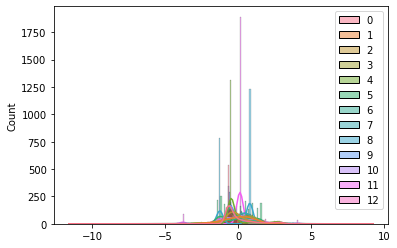

In [27]:
# unique2, counts2 = np.unique(data_standarized , return_counts=True)
# plt.bar(unique2, counts2)

sns.histplot(data_standarized, kde=True)

Now let’s check the **mean** and **standard deviation** values

In [28]:
print(data_standarized.mean(axis=0))
print(data_standarized.std(axis=0))

[ 2.81821611e-17  4.22732416e-16 -7.04554027e-17  1.05683104e-17
 -2.81821611e-17 -2.81821611e-17 -8.45464832e-17  3.10003772e-16
 -1.33865265e-16  5.63643221e-17 -2.39548369e-16  4.96710589e-16
 -1.26819725e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [29]:
print(f'Min values:\n {cols} ', data_standarized.min(axis=0))
print(f'Max values:\n {cols} ', data_standarized.max(axis=0))

Min values:
 ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']  [ -0.72169794  -3.08357575  -2.8094194   -3.17179318  -0.48805652
  -1.46479184  -1.10700023  -6.91653641  -1.25669562  -0.77371702
  -2.76413305 -11.60432587  -1.86949056]
Max values:
 ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']  [3.10632136 2.27082586 9.25215991 1.50519235 3.08579853 1.55110799
 5.0069675  1.80246525 0.79573763 8.04518337 3.66309731 4.03350629
 2.00370896]


However, the **minimum** and **maximum** values vary according to how spread out the variable was, to begin with, and is highly influenced by the presence of outliers.

## 1.2 Normalization (Min-Max Scalar) :

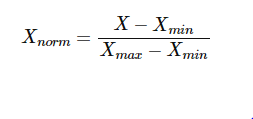

In [30]:
normalizer = MinMaxScaler() 
data_normalized = normalizer.fit_transform(attributes_spotify[cols])

<AxesSubplot:ylabel='Count'>

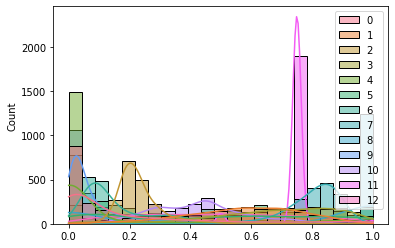

In [31]:
# unique3, counts3 = np.unique(data_normalized , return_counts=True)
# plt.bar(unique3, counts3)
sns.histplot(data_normalized, kde=True)

Now let’s check the **mean** and **standard deviation** values.

In [32]:
print(data_normalized.mean(axis=0))
print(data_normalized.std(axis=0))

[0.18853038 0.57589549 0.23292301 0.67817041 0.13656304 0.48568982
 0.18106086 0.7932716  0.61229549 0.08773396 0.43006597 0.74206743
 0.48267345]
[0.2612317  0.18676223 0.08290788 0.21381293 0.27980989 0.331576
 0.16355991 0.11469203 0.48722656 0.11339282 0.15558801 0.06394748
 0.25818448]


After MinMaxScaling, the **distributions** are not centered at zero and the standard deviation is not 1.

In [33]:
print(f'Min values:\n {cols} ', data_normalized.min(axis=0))
print(f'Max values:\n {cols} ', data_normalized.max(axis=0))

Min values:
 ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max values:
 ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# 2. KNN classifier.

In [34]:
X = data_normalized
y = attributes_spotify['target'].to_numpy()

In [35]:
# We partition our dataset into a training set and a test set (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

<BarContainer object of 2 artists>

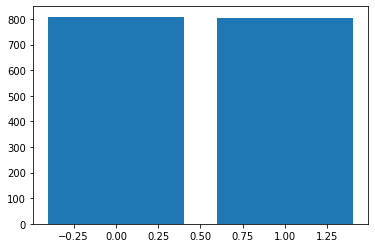

In [36]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)

<BarContainer object of 2 artists>

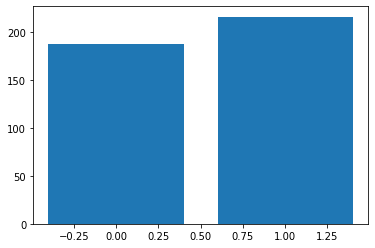

In [37]:
unique1, counts1 = np.unique(y_test, return_counts=True)
plt.bar(unique1, counts1)

In [38]:
# train the classifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
y_pred_ = classifier.predict(X_test)

In [40]:
pred_values = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_})
pred_values.head(100)

Actual value  Predicted value
0              1                1
1              0                0
2              0                0
3              1                0
4              1                1
..           ...              ...
95             0                0
96             1                0
97             1                1
98             1                1
99             0                1

[100 rows x 2 columns]

## Consfusion matrix

In [41]:
cf_mx = confusion_matrix(y_test, y_pred_)
print(cf_mx)

[[131  57]
 [ 81 135]]


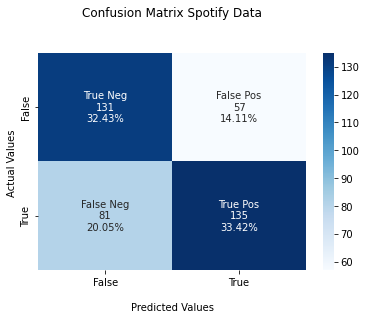

In [42]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_mx.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_mx.flatten()/np.sum(cf_mx)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_mx, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix Spotify Data\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# fig, axs = plt.subplots(1, 3, figsize=(17,4))

## ROC curve - ROC AUC score

We have to get False Positive Rates and True Postive rates for the Classifiers because these will be used to plot the ROC Curve. This can be done by ***roc_curve module*** and ***roc_auc_score*** by passing the test dataset and the predicted data through it. Here we are doing this for both the classifier.

In [45]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_)
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_pred_))

roc_auc_score for KNN:  0.6609042553191489


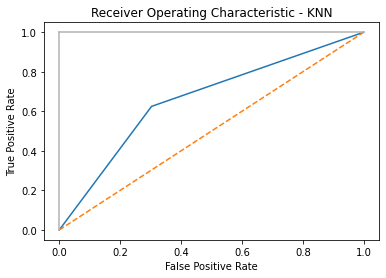

In [46]:
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
# Obtenemos el accuracy de nuestro modelo para el conjunto de test
print(classifier.score(X_test, y_test))

0.6584158415841584


In [48]:
# Importamos la función de entrenamiento y validación cruzada
from sklearn.model_selection import cross_val_score
nScores = cross_val_score(classifier, X, y, cv=10)
# Nos devuelve un array de tipo Numpy. Podemos usar el método mean para obtener la media de los valores devueltos
nScores.mean()

0.646022363430373

2.1 We check that the **y_test** and **y _train sets** are as balanced as possible, this is to avoid overfitting.



However, there is something we should take into account with respect to training. Let's imagine that by chance, when separating our dataset into training and test sets, many instances fall into the test set that are more difficult for the model to classify. What will happen is that the accuracy value that we will obtain is lower than what we would normally obtain if the training set had been another one. For this reason, performing training with only one training and test set is problematic and is generally discouraged. In the following image we can see a simplification of an unbalanced set separation.

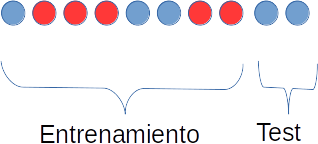


In the figure we can see that only blue instances have fallen in the test set, which may result in totally distorted accuracy values, if for some reason our classifier in good or bad classifying those instances.


There are other more convenient ways to perform machine learning training. One of the most common and robust is to use cross validation. In general, this is based on the idea of performing N different separations of training and test sets. We then perform N different training runs with each training set and N validations with each corresponding test set. In this case we will obtain N different accuracy values for each training/test set. Our final accuracy would be the average of all the accuracy values we have calculated. In this way we avoid that, for some reason, we have obtained a training/test set that gives us misleading results; and we obtain a more reliable measure of how the trained model is. In the following figure we can see an example with the dataset of the previous figure:

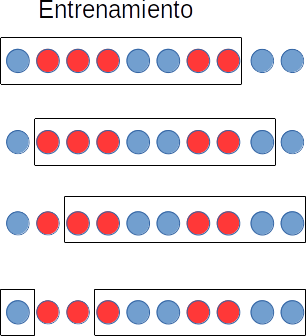

In the figure you can see how we select a different training set in each of the four different trainings we perform. Subsequently the evaluation will be performed on the evaluation set that has not been selected as the training set in that iteration. In this way we select four test sets that contain a larger variety of instance classes and that will mitigate the effects described above.

In [49]:
params_grid_ = {  
               'n_neighbors':[n for n in range(3, 150)], 
               'weights':['uniform', 'distance'],
               'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
               'leaf_size':[20, 30, 40],
               'metric': ['chebyshev', 'manhattan', 'minkowski']}
grid_ = GridSearchCV(classifier, params_grid_, refit = True, verbose = 3,n_jobs=1)
grid_.fit(X_train, y_train)

Fitting 5 folds for each of 10584 candidates, totalling 52920 fits
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=3, weights=uniform;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=3, weights=uniform;, score=0.610 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=3, weights=uniform;, score=0.591 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=3, weights=uniform;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=3, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=3, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=3, weights=distance;, score=0.610 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebys

[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=9, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=9, weights=distance;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=10, weights=uniform;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=10, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=10, weights=uniform;, score=0.619 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=10, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=10, weights=uniform;, score=0.609 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=10, weights=distance;, score=0.666 total time

[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=16, weights=uniform;, score=0.640 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=16, weights=distance;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=16, weights=distance;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=16, weights=distance;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=16, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=16, weights=distance;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=17, weights=uniform;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=17, weights=uniform;, score=0.622 total 

[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=23, weights=distance;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=24, weights=uniform;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=24, weights=uniform;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=24, weights=uniform;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=24, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=24, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=24, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=24, weights=distance;, score=0.622 total ti

[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=30, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=31, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=31, weights=uniform;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=31, weights=uniform;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=31, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=31, weights=uniform;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=31, weights=distance;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=31, weights=distance;, score=0.628 total ti

[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=37, weights=distance;, score=0.655 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.601 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.619 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=38, weights=distance;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=38, weights=distance;, score=0.613 total ti

[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=44, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=44, weights=distance;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=44, weights=distance;, score=0.632 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=44, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=44, weights=distance;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.585 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.622 total 

[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=51, weights=distance;, score=0.625 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=51, weights=distance;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=51, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=52, weights=uniform;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=52, weights=uniform;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=52, weights=uniform;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=52, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=52, weights=uniform;, score=0.615 total ti

[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=58, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=58, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=59, weights=uniform;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=59, weights=uniform;, score=0.557 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=59, weights=uniform;, score=0.625 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=59, weights=uniform;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=59, weights=uniform;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=59, weights=distance;, score=0.616 total ti

[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=65, weights=distance;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=65, weights=distance;, score=0.582 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=65, weights=distance;, score=0.616 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=65, weights=distance;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=65, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=66, weights=uniform;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=66, weights=uniform;, score=0.557 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=66, weights=uniform;, score=0.576 total 

[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=72, weights=uniform;, score=0.567 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=72, weights=uniform;, score=0.565 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=72, weights=uniform;, score=0.609 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=72, weights=distance;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=72, weights=distance;, score=0.585 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=72, weights=distance;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=72, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=72, weights=distance;, score=0.624 total 

[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=79, weights=uniform;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=79, weights=uniform;, score=0.557 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=79, weights=uniform;, score=0.559 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=79, weights=uniform;, score=0.612 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=79, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=79, weights=distance;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=79, weights=distance;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=79, weights=distance;, score=0.578 total t

[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=85, weights=distance;, score=0.601 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=85, weights=distance;, score=0.594 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=85, weights=distance;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=85, weights=distance;, score=0.618 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=86, weights=uniform;, score=0.579 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=86, weights=uniform;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=86, weights=uniform;, score=0.567 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=86, weights=uniform;, score=0.547 total t

[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=92, weights=uniform;, score=0.540 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=92, weights=uniform;, score=0.618 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=92, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=92, weights=distance;, score=0.582 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=92, weights=distance;, score=0.607 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=92, weights=distance;, score=0.568 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=92, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=93, weights=uniform;, score=0.588 total 

[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=99, weights=uniform;, score=0.585 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=99, weights=uniform;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=99, weights=uniform;, score=0.557 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=99, weights=uniform;, score=0.553 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=99, weights=uniform;, score=0.590 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=99, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=99, weights=distance;, score=0.585 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=99, weights=distance;, score=0.601 total ti

[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=106, weights=uniform;, score=0.545 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=106, weights=uniform;, score=0.568 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=106, weights=uniform;, score=0.578 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=106, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=106, weights=distance;, score=0.576 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=106, weights=distance;, score=0.563 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=106, weights=distance;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=106, weights=distance;, score=0.59

[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=113, weights=uniform;, score=0.571 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=113, weights=distance;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=113, weights=distance;, score=0.579 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=113, weights=distance;, score=0.567 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=113, weights=distance;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=113, weights=distance;, score=0.602 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=114, weights=uniform;, score=0.585 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=114, weights=uniform;, score=0.56

[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=120, weights=uniform;, score=0.562 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=120, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=120, weights=distance;, score=0.585 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=120, weights=distance;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=120, weights=distance;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=120, weights=distance;, score=0.602 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=121, weights=uniform;, score=0.582 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=121, weights=uniform;, score=0.54

[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=127, weights=uniform;, score=0.562 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=127, weights=uniform;, score=0.593 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=127, weights=distance;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=127, weights=distance;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=127, weights=distance;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=127, weights=distance;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=127, weights=distance;, score=0.612 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=128, weights=uniform;, score=0.57

[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=134, weights=uniform;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=134, weights=uniform;, score=0.575 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=134, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=134, weights=distance;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=134, weights=distance;, score=0.576 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=134, weights=distance;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=134, weights=distance;, score=0.581 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=135, weights=uniform;, score=0.56

[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=141, weights=uniform;, score=0.573 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=141, weights=uniform;, score=0.545 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=141, weights=uniform;, score=0.545 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=141, weights=uniform;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=141, weights=uniform;, score=0.562 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=141, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=141, weights=distance;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=141, weights=distance;, score=0.570 

[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=147, weights=distance;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=147, weights=distance;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=147, weights=distance;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=147, weights=distance;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=147, weights=distance;, score=0.584 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=148, weights=uniform;, score=0.579 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=148, weights=uniform;, score=0.551 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=148, weights=uniform;, score=0.55

[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=7, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=7, weights=uniform;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=7, weights=uniform;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=7, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=7, weights=distance;, score=0.693 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=7, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=7, weights=distance;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=7, weights=distance;, score=0.724 total time=   

[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=14, weights=uniform;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=14, weights=uniform;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=14, weights=uniform;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=14, weights=uniform;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=14, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=14, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=14, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=14, weights=distance;, score=0.655 total t

[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=20, weights=distance;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=20, weights=distance;, score=0.693 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=20, weights=distance;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=20, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=21, weights=uniform;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=21, weights=uniform;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=21, weights=uniform;, score=0.703 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=21, weights=uniform;, score=0.652 total t

[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=28, weights=uniform;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=28, weights=uniform;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=28, weights=uniform;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=28, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=28, weights=distance;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=28, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=28, weights=distance;, score=0.703 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=28, weights=distance;, score=0.668 total t

[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=35, weights=uniform;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=35, weights=uniform;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=35, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=35, weights=distance;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=35, weights=distance;, score=0.681 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=35, weights=distance;, score=0.703 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=35, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=35, weights=distance;, score=0.708 total 

[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=42, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=42, weights=uniform;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=42, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=42, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=42, weights=distance;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=42, weights=distance;, score=0.681 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=42, weights=distance;, score=0.706 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=42, weights=distance;, score=0.637 total t

[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=48, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=48, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=48, weights=distance;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=49, weights=uniform;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=49, weights=uniform;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=49, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=49, weights=uniform;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=49, weights=uniform;, score=0.689 total ti

[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=55, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=55, weights=uniform;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=55, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=55, weights=distance;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=55, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=55, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=55, weights=distance;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=56, weights=uniform;, score=0.650 total 

[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=62, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=62, weights=distance;, score=0.652 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=62, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=63, weights=uniform;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=63, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=63, weights=uniform;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=63, weights=uniform;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=63, weights=uniform;, score=0.696 total ti

[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=70, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=70, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=70, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=70, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=70, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=70, weights=distance;, score=0.678 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=70, weights=distance;, score=0.700 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=70, weights=distance;, score=0.652 total t

[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=77, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=77, weights=distance;, score=0.690 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=77, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=77, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=77, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=77, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=78, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=78, weights=uniform;, score=0.656 total 

[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=84, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=84, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=84, weights=distance;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=84, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=84, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=84, weights=distance;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=85, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=85, weights=uniform;, score=0.659 total 

[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=91, weights=uniform;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=91, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=91, weights=distance;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=91, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=91, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=91, weights=distance;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=92, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=92, weights=uniform;, score=0.638 total 

[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=98, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=98, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=98, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=98, weights=distance;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=98, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=98, weights=distance;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=99, weights=uniform;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=99, weights=uniform;, score=0.638 total 

[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=105, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=105, weights=uniform;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=105, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=105, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=105, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=105, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=105, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=106, weights=uniform;, score=0.66

[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=111, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=111, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.628 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=112, weights=distance;, score=0.681 

[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=119, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=119, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=119, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=119, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=119, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=119, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=119, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=119, weights=distance;, score=0.640

[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=126, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=126, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=126, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=126, weights=distance;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=126, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=126, weights=distance;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=126, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=126, weights=distance;, score=0.67

[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=133, weights=uniform;, score=0.655 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=133, weights=distance;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=133, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=133, weights=distance;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=133, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=133, weights=distance;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=134, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=134, weights=uniform;, score=0.64

[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=140, weights=distance;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=140, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=140, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=140, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=140, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=141, weights=uniform;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=141, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=141, weights=uniform;, score=0.64

[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=147, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=147, weights=distance;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=147, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=147, weights=distance;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=147, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=147, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=148, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=148, weights=uniform;, score=0.62

[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=7, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=7, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=7, weights=distance;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=7, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=7, weights=distance;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=7, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=7, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=8, weights=uniform;, score=0.638 total time=   

[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=14, weights=distance;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=14, weights=distance;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=14, weights=distance;, score=0.693 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=14, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=14, weights=distance;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=15, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=15, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=15, weights=uniform;, score=0.697 total 

[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=21, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=21, weights=uniform;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=21, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=21, weights=distance;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=21, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=21, weights=distance;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=21, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=22, weights=uniform;, score=0.666 total 

[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=28, weights=distance;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=29, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=29, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=29, weights=uniform;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=29, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=29, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=29, weights=distance;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=29, weights=distance;, score=0.659 total ti

[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=36, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=36, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=36, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=36, weights=uniform;, score=0.658 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=36, weights=distance;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=36, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=36, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=36, weights=distance;, score=0.627 total t

[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=43, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=43, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=43, weights=uniform;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=43, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=43, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=43, weights=distance;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=43, weights=distance;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=43, weights=distance;, score=0.677 total 

[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=50, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=50, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=50, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=50, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=50, weights=uniform;, score=0.655 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=50, weights=distance;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=50, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=50, weights=distance;, score=0.675 total ti

[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=56, weights=distance;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=56, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=56, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=56, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=56, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=57, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=57, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=57, weights=uniform;, score=0.650 total 

[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=63, weights=distance;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=64, weights=uniform;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=64, weights=uniform;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=64, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=64, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=64, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=64, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=64, weights=distance;, score=0.656 total ti

[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=70, weights=distance;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=70, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=71, weights=uniform;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=71, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=71, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=71, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=71, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=71, weights=distance;, score=0.644 total ti

[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=77, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=77, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=78, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=78, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=78, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=78, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=78, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=78, weights=distance;, score=0.647 total ti

[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=84, weights=distance;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=84, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=84, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=85, weights=uniform;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=85, weights=uniform;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=85, weights=uniform;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=85, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=85, weights=uniform;, score=0.677 total ti

[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=91, weights=distance;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=91, weights=distance;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=91, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=91, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=91, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=92, weights=uniform;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=92, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=92, weights=uniform;, score=0.650 total 

[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=98, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=98, weights=uniform;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=98, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=98, weights=distance;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=98, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=98, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=98, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=99, weights=uniform;, score=0.622 total 

[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=105, weights=uniform;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=105, weights=uniform;, score=0.635 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=105, weights=uniform;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=105, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=105, weights=distance;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=105, weights=distance;, score=0.632 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=105, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=105, weights=distance;, score=0.609

[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=112, weights=uniform;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=112, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=112, weights=distance;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=112, weights=distance;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=112, weights=distance;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=112, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=112, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=113, weights=uniform;, score=0.62

[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=118, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=118, weights=distance;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=119, weights=uniform;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=119, weights=uniform;, score=0.610 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=119, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=119, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=119, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=119, weights=distance;, score=0.635 

[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=126, weights=uniform;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=126, weights=uniform;, score=0.635 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=126, weights=uniform;, score=0.565 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=126, weights=uniform;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=126, weights=distance;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=126, weights=distance;, score=0.616 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=126, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=126, weights=distance;, score=0.599

[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=133, weights=uniform;, score=0.619 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=133, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=133, weights=uniform;, score=0.640 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=133, weights=distance;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=133, weights=distance;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=133, weights=distance;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=133, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=133, weights=distance;, score=0.65

[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=140, weights=uniform;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=140, weights=uniform;, score=0.613 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=140, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=140, weights=uniform;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=140, weights=distance;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=140, weights=distance;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=140, weights=distance;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=140, weights=distance;, score=0.599

[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=147, weights=uniform;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=147, weights=uniform;, score=0.616 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=147, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=147, weights=uniform;, score=0.627 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=147, weights=distance;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=147, weights=distance;, score=0.598 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=147, weights=distance;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=20, metric=minkowski, n_neighbors=147, weights=distance;, score=0.593

[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=8, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=8, weights=uniform;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=8, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=8, weights=uniform;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=8, weights=distance;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=8, weights=distance;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=8, weights=distance;, score=0.601 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=8, weights=distance;, score=0.637 total time=   0

[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=14, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=14, weights=distance;, score=0.612 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=15, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=15, weights=uniform;, score=0.616 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=15, weights=uniform;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=15, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=15, weights=uniform;, score=0.627 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=15, weights=distance;, score=0.669 total ti

[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=21, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=21, weights=distance;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=21, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=21, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=21, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=22, weights=uniform;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=22, weights=uniform;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=22, weights=uniform;, score=0.641 total 

[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=28, weights=uniform;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=28, weights=uniform;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=28, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=28, weights=uniform;, score=0.630 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=28, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=28, weights=distance;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=28, weights=distance;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=28, weights=distance;, score=0.630 total t

[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=35, weights=distance;, score=0.622 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=35, weights=distance;, score=0.632 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=35, weights=distance;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=35, weights=distance;, score=0.658 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=36, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=36, weights=uniform;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=36, weights=uniform;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=36, weights=uniform;, score=0.627 total t

[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=42, weights=distance;, score=0.594 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=42, weights=distance;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=42, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=42, weights=distance;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=43, weights=uniform;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=43, weights=uniform;, score=0.582 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=43, weights=uniform;, score=0.616 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=43, weights=uniform;, score=0.584 total t

[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=49, weights=distance;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=49, weights=distance;, score=0.601 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=49, weights=distance;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=49, weights=distance;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=49, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=50, weights=uniform;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=50, weights=uniform;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=50, weights=uniform;, score=0.628 total 

[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=56, weights=uniform;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=56, weights=uniform;, score=0.607 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=56, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=56, weights=uniform;, score=0.602 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=56, weights=distance;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=56, weights=distance;, score=0.588 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=56, weights=distance;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=56, weights=distance;, score=0.606 total t

[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=62, weights=distance;, score=0.632 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=62, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=62, weights=distance;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=63, weights=uniform;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=63, weights=uniform;, score=0.551 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=63, weights=uniform;, score=0.598 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=63, weights=uniform;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=63, weights=uniform;, score=0.615 total ti

[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=69, weights=uniform;, score=0.582 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=69, weights=uniform;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=69, weights=uniform;, score=0.602 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=69, weights=distance;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=69, weights=distance;, score=0.579 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=69, weights=distance;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=69, weights=distance;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=69, weights=distance;, score=0.624 total 

[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=76, weights=uniform;, score=0.556 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=76, weights=uniform;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=76, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=76, weights=distance;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=76, weights=distance;, score=0.607 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=76, weights=distance;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=76, weights=distance;, score=0.640 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=77, weights=uniform;, score=0.607 total 

[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=83, weights=uniform;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=83, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=83, weights=distance;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=83, weights=distance;, score=0.594 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=83, weights=distance;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=83, weights=distance;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=84, weights=uniform;, score=0.591 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=84, weights=uniform;, score=0.567 total 

[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=90, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=90, weights=distance;, score=0.582 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=90, weights=distance;, score=0.613 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=90, weights=distance;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=90, weights=distance;, score=0.630 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=91, weights=uniform;, score=0.594 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=91, weights=uniform;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=91, weights=uniform;, score=0.570 total 

[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=97, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=97, weights=distance;, score=0.585 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=97, weights=distance;, score=0.598 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=97, weights=distance;, score=0.568 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=97, weights=distance;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=98, weights=uniform;, score=0.582 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=98, weights=uniform;, score=0.551 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=98, weights=uniform;, score=0.560 total 

[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=104, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=104, weights=distance;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=104, weights=distance;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=104, weights=distance;, score=0.559 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=104, weights=distance;, score=0.609 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=105, weights=uniform;, score=0.588 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=105, weights=uniform;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=105, weights=uniform;, score=0.54

[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=111, weights=uniform;, score=0.587 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=111, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=111, weights=distance;, score=0.579 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=111, weights=distance;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=111, weights=distance;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=111, weights=distance;, score=0.615 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=112, weights=uniform;, score=0.588 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=112, weights=uniform;, score=0.56

[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=118, weights=uniform;, score=0.576 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=118, weights=uniform;, score=0.554 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=118, weights=uniform;, score=0.557 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=118, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=118, weights=uniform;, score=0.559 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=118, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=118, weights=distance;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=118, weights=distance;, score=0.585 

[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=125, weights=uniform;, score=0.551 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=125, weights=uniform;, score=0.559 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=125, weights=uniform;, score=0.575 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=125, weights=distance;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=125, weights=distance;, score=0.576 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=125, weights=distance;, score=0.563 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=125, weights=distance;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=125, weights=distance;, score=0.60

[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=132, weights=uniform;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=132, weights=uniform;, score=0.568 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=132, weights=distance;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=132, weights=distance;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=132, weights=distance;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=132, weights=distance;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=132, weights=distance;, score=0.593 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=133, weights=uniform;, score=0.57

[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=139, weights=uniform;, score=0.568 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=139, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=139, weights=distance;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=139, weights=distance;, score=0.573 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=139, weights=distance;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=139, weights=distance;, score=0.587 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=140, weights=uniform;, score=0.573 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=140, weights=uniform;, score=0.54

[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=146, weights=uniform;, score=0.565 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=146, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=146, weights=distance;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=146, weights=distance;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=146, weights=distance;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=146, weights=distance;, score=0.581 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=147, weights=uniform;, score=0.570 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=chebyshev, n_neighbors=147, weights=uniform;, score=0.55

[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, weights=uniform;, score=0.681 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, weights=distance;, score=0.697 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, weights=distance;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=6, weights=distance;, score=0.655 total time=   0

[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=13, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=13, weights=distance;, score=0.681 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=13, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=13, weights=distance;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=13, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=14, weights=uniform;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=14, weights=uniform;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=14, weights=uniform;, score=0.681 total 

[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, weights=uniform;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, weights=distance;, score=0.697 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, weights=distance;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, weights=distance;, score=0.693 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, weights=distance;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=20, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=21, weights=uniform;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=21, weights=uniform;, score=0.663 total 

[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=27, weights=uniform;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=27, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=27, weights=uniform;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=27, weights=uniform;, score=0.652 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=27, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=27, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=27, weights=distance;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=27, weights=distance;, score=0.715 total ti

[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=34, weights=distance;, score=0.706 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=34, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=34, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=35, weights=uniform;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=35, weights=uniform;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=35, weights=uniform;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=35, weights=uniform;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=35, weights=uniform;, score=0.693 total ti

[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=42, weights=uniform;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=42, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=42, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=42, weights=distance;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=42, weights=distance;, score=0.681 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=42, weights=distance;, score=0.706 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=42, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=42, weights=distance;, score=0.714 total 

[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=49, weights=distance;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=49, weights=distance;, score=0.693 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=49, weights=distance;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=49, weights=distance;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=49, weights=distance;, score=0.699 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=50, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=50, weights=uniform;, score=0.678 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=50, weights=uniform;, score=0.659 total 

[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=56, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=56, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=56, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=56, weights=distance;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=56, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=56, weights=distance;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=56, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=57, weights=uniform;, score=0.656 total 

[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=62, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=63, weights=uniform;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=63, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=63, weights=uniform;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=63, weights=uniform;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=63, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=63, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=63, weights=distance;, score=0.681 total ti

[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=69, weights=distance;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=69, weights=distance;, score=0.700 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=69, weights=distance;, score=0.655 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=69, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=70, weights=uniform;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=70, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=70, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=70, weights=uniform;, score=0.624 total t

[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=77, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=77, weights=uniform;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=77, weights=uniform;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=77, weights=uniform;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=77, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=77, weights=distance;, score=0.690 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=77, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=77, weights=distance;, score=0.690 total ti

[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=83, weights=distance;, score=0.681 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=83, weights=distance;, score=0.693 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=83, weights=distance;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=83, weights=distance;, score=0.717 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=84, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=84, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=84, weights=uniform;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=84, weights=uniform;, score=0.618 total t

[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=90, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=90, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=90, weights=distance;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=91, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=91, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=91, weights=uniform;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=91, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=91, weights=uniform;, score=0.686 total ti

[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=97, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=97, weights=distance;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=98, weights=uniform;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=98, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=98, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=98, weights=uniform;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=98, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=98, weights=distance;, score=0.681 total ti

[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=104, weights=distance;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=105, weights=uniform;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=105, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=105, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=105, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=105, weights=uniform;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=105, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=105, weights=distance;, score=0.663 

[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=111, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=111, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.628 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=112, weights=distance;, score=0.681 

[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=118, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=118, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=118, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=118, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=118, weights=distance;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=119, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=119, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=119, weights=uniform;, score=0.65

[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=125, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=125, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=125, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=125, weights=distance;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=125, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=125, weights=distance;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=126, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=126, weights=uniform;, score=0.64

[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=132, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=132, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=132, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=132, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=132, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=132, weights=distance;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=132, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=132, weights=distance;, score=0.67

[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=139, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=139, weights=distance;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=139, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=139, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=139, weights=distance;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=139, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=140, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=140, weights=uniform;, score=0.62

[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=146, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=146, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=146, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=146, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=146, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=146, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=146, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=146, weights=distance;, score=0.669 

[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=5, weights=distance;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=5, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=5, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.628 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.661 total time=   0.

[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=12, weights=distance;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=12, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=12, weights=distance;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=12, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=12, weights=distance;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=13, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=13, weights=uniform;, score=0.632 total 

[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=20, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=20, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=20, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=20, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=20, weights=distance;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=20, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=20, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=20, weights=distance;, score=0.627 total t

[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=27, weights=uniform;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=27, weights=uniform;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=27, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=27, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=27, weights=distance;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=27, weights=distance;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=27, weights=distance;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=27, weights=distance;, score=0.621 total t

[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=34, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=34, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=34, weights=uniform;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=34, weights=distance;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=34, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=34, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=34, weights=distance;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=34, weights=distance;, score=0.693 total 

[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=40, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=40, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=41, weights=uniform;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=41, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=41, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=41, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=41, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=41, weights=distance;, score=0.638 total ti

[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=47, weights=distance;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=47, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=47, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=47, weights=distance;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=47, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=48, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=48, weights=uniform;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=48, weights=uniform;, score=0.659 total 

[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=54, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=55, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=55, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=55, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=55, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=55, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=55, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=55, weights=distance;, score=0.653 total ti

[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=62, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=62, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=62, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=62, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=62, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=62, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=63, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=63, weights=uniform;, score=0.647 total 

[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=69, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=69, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=69, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=70, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=70, weights=uniform;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=70, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=70, weights=uniform;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=70, weights=uniform;, score=0.671 total ti

[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=76, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=76, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=77, weights=uniform;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=77, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=77, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=77, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=77, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=77, weights=distance;, score=0.659 total ti

[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=83, weights=distance;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=83, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=83, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=84, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=84, weights=uniform;, score=0.632 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=84, weights=uniform;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=84, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=84, weights=uniform;, score=0.671 total ti

[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=90, weights=distance;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=90, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=90, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=90, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=90, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=91, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=91, weights=uniform;, score=0.628 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=91, weights=uniform;, score=0.644 total 

[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=97, weights=uniform;, score=0.622 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=97, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=97, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=97, weights=uniform;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=97, weights=distance;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=97, weights=distance;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=97, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=97, weights=distance;, score=0.593 total t

[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=103, weights=distance;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=103, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=103, weights=distance;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=103, weights=distance;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=104, weights=uniform;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=104, weights=uniform;, score=0.622 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=104, weights=uniform;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=104, weights=uniform;, score=0.587

[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=111, weights=uniform;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=111, weights=uniform;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=111, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=111, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=111, weights=uniform;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=111, weights=distance;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=111, weights=distance;, score=0.628 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=111, weights=distance;, score=0.669 

[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=118, weights=uniform;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=118, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=118, weights=uniform;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=118, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=118, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=118, weights=distance;, score=0.632 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=118, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=118, weights=distance;, score=0.599

[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=125, weights=uniform;, score=0.632 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=125, weights=uniform;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=125, weights=uniform;, score=0.630 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=125, weights=distance;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=125, weights=distance;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=125, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=125, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=125, weights=distance;, score=0.65

[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=132, weights=uniform;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=132, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=132, weights=uniform;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=132, weights=distance;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=132, weights=distance;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=132, weights=distance;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=132, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=132, weights=distance;, score=0.65

[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=139, weights=uniform;, score=0.619 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=139, weights=uniform;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=139, weights=uniform;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=139, weights=distance;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=139, weights=distance;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=139, weights=distance;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=139, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=139, weights=distance;, score=0.64

[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=146, weights=uniform;, score=0.619 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=146, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=146, weights=uniform;, score=0.612 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=146, weights=distance;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=146, weights=distance;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=146, weights=distance;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=146, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=146, weights=distance;, score=0.64

[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=6, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=6, weights=uniform;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=6, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=6, weights=uniform;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=6, weights=distance;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=6, weights=distance;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=6, weights=distance;, score=0.591 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=6, weights=distance;, score=0.643 total time=   0

[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=13, weights=uniform;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=13, weights=uniform;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=13, weights=uniform;, score=0.612 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=13, weights=distance;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=13, weights=distance;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=13, weights=distance;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=13, weights=distance;, score=0.649 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=13, weights=distance;, score=0.624 total 

[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=19, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=19, weights=distance;, score=0.630 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=20, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=20, weights=uniform;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=20, weights=uniform;, score=0.632 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=20, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=20, weights=uniform;, score=0.640 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=20, weights=distance;, score=0.650 total ti

[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=26, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=26, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=26, weights=distance;, score=0.622 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=26, weights=distance;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=26, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=26, weights=distance;, score=0.655 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=27, weights=uniform;, score=0.591 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=27, weights=uniform;, score=0.619 total 

[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=32, weights=distance;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=33, weights=uniform;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=33, weights=uniform;, score=0.616 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=33, weights=uniform;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=33, weights=uniform;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=33, weights=uniform;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=33, weights=distance;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=33, weights=distance;, score=0.619 total ti

[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=40, weights=uniform;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=40, weights=uniform;, score=0.594 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=40, weights=uniform;, score=0.622 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=40, weights=uniform;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=40, weights=uniform;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=40, weights=distance;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=40, weights=distance;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=40, weights=distance;, score=0.644 total ti

[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=46, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=46, weights=distance;, score=0.630 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=47, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=47, weights=uniform;, score=0.588 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=47, weights=uniform;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=47, weights=uniform;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=47, weights=uniform;, score=0.630 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=47, weights=distance;, score=0.635 total ti

[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=53, weights=distance;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=53, weights=distance;, score=0.598 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=53, weights=distance;, score=0.619 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=53, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=53, weights=distance;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=54, weights=uniform;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=54, weights=uniform;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=54, weights=uniform;, score=0.607 total 

[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=60, weights=distance;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=61, weights=uniform;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=61, weights=uniform;, score=0.551 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=61, weights=uniform;, score=0.613 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=61, weights=uniform;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=61, weights=uniform;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=61, weights=distance;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=61, weights=distance;, score=0.585 total ti

[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=68, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=68, weights=uniform;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=68, weights=distance;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=68, weights=distance;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=68, weights=distance;, score=0.619 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=68, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=68, weights=distance;, score=0.640 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=69, weights=uniform;, score=0.601 total 

[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=75, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=75, weights=distance;, score=0.610 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=75, weights=distance;, score=0.607 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=75, weights=distance;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=75, weights=distance;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=76, weights=uniform;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=76, weights=uniform;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=76, weights=uniform;, score=0.563 total 

[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=82, weights=uniform;, score=0.612 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=82, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=82, weights=distance;, score=0.585 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=82, weights=distance;, score=0.594 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=82, weights=distance;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=82, weights=distance;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=83, weights=uniform;, score=0.591 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=83, weights=uniform;, score=0.560 total 

[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=89, weights=uniform;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=89, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=89, weights=distance;, score=0.594 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=89, weights=distance;, score=0.604 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=89, weights=distance;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=89, weights=distance;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=90, weights=uniform;, score=0.591 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=90, weights=uniform;, score=0.560 total 

[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=96, weights=uniform;, score=0.596 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=96, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=96, weights=distance;, score=0.576 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=96, weights=distance;, score=0.585 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=96, weights=distance;, score=0.568 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=96, weights=distance;, score=0.627 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=97, weights=uniform;, score=0.591 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=97, weights=uniform;, score=0.560 total 

[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=103, weights=uniform;, score=0.565 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=103, weights=uniform;, score=0.587 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=103, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=103, weights=distance;, score=0.579 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=103, weights=distance;, score=0.576 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=103, weights=distance;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=103, weights=distance;, score=0.618 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=104, weights=uniform;, score=0.58

[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=110, weights=uniform;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=110, weights=uniform;, score=0.557 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=110, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=110, weights=uniform;, score=0.578 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=110, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=110, weights=distance;, score=0.582 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=110, weights=distance;, score=0.573 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=110, weights=distance;, score=0.575

[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=116, weights=distance;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=116, weights=distance;, score=0.593 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=117, weights=uniform;, score=0.576 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=117, weights=uniform;, score=0.554 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=117, weights=uniform;, score=0.548 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=117, weights=uniform;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=117, weights=uniform;, score=0.562 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=117, weights=distance;, score=0.598 

[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=124, weights=uniform;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=124, weights=uniform;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=124, weights=uniform;, score=0.562 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=124, weights=uniform;, score=0.578 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=124, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=124, weights=distance;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=124, weights=distance;, score=0.576 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=124, weights=distance;, score=0.578

[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=131, weights=uniform;, score=0.578 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=131, weights=distance;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=131, weights=distance;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=131, weights=distance;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=131, weights=distance;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=131, weights=distance;, score=0.599 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=132, weights=uniform;, score=0.570 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=132, weights=uniform;, score=0.55

[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=138, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=138, weights=distance;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=138, weights=distance;, score=0.579 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=138, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=138, weights=distance;, score=0.587 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=139, weights=uniform;, score=0.576 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=139, weights=uniform;, score=0.551 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=139, weights=uniform;, score=0.55

[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=145, weights=distance;, score=0.588 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=145, weights=distance;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=145, weights=distance;, score=0.573 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=145, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=145, weights=distance;, score=0.575 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=146, weights=uniform;, score=0.579 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=146, weights=uniform;, score=0.548 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=chebyshev, n_neighbors=146, weights=uniform;, score=0.55

[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=6, weights=uniform;, score=0.681 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=6, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=6, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=6, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=6, weights=distance;, score=0.697 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=6, weights=distance;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=6, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=6, weights=distance;, score=0.655 total time=   0

[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=13, weights=uniform;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=13, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=13, weights=distance;, score=0.681 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=13, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=13, weights=distance;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=13, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=14, weights=uniform;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=14, weights=uniform;, score=0.666 total 

[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=20, weights=distance;, score=0.697 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=20, weights=distance;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=20, weights=distance;, score=0.693 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=20, weights=distance;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=20, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=21, weights=uniform;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=21, weights=uniform;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=21, weights=uniform;, score=0.703 total 

[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=27, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=27, weights=uniform;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=27, weights=uniform;, score=0.652 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=27, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=27, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=27, weights=distance;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=27, weights=distance;, score=0.715 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=27, weights=distance;, score=0.665 total t

[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=33, weights=distance;, score=0.700 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=33, weights=distance;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=33, weights=distance;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=34, weights=uniform;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=34, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=34, weights=uniform;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=34, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=34, weights=uniform;, score=0.693 total ti

[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=41, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=41, weights=uniform;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=41, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=41, weights=distance;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=41, weights=distance;, score=0.681 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=41, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=41, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=41, weights=distance;, score=0.708 total 

[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=48, weights=uniform;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=48, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=48, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=48, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=48, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=48, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=48, weights=distance;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=49, weights=uniform;, score=0.650 total 

[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=55, weights=uniform;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=55, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=55, weights=distance;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=55, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=55, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=55, weights=distance;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=56, weights=uniform;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=56, weights=uniform;, score=0.672 total 

[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=62, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=62, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=62, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=62, weights=distance;, score=0.687 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=62, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=62, weights=distance;, score=0.652 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=62, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=63, weights=uniform;, score=0.672 total 

[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=69, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=69, weights=uniform;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=69, weights=uniform;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=69, weights=uniform;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=69, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=69, weights=distance;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=69, weights=distance;, score=0.700 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=69, weights=distance;, score=0.655 total t

[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=75, weights=distance;, score=0.693 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=75, weights=distance;, score=0.649 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=75, weights=distance;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=76, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=76, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=76, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=76, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=76, weights=uniform;, score=0.683 total ti

[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=82, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=82, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=82, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=82, weights=distance;, score=0.681 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=82, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=82, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=82, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=83, weights=uniform;, score=0.663 total 

[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=89, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=89, weights=distance;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=90, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=90, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=90, weights=uniform;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=90, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=90, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=90, weights=distance;, score=0.687 total ti

[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=97, weights=uniform;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=97, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=97, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=97, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=97, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=97, weights=distance;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=97, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=97, weights=distance;, score=0.696 total 

[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=104, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=104, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=104, weights=uniform;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=104, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=104, weights=distance;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=104, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=104, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=104, weights=distance;, score=0.68

[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=111, weights=uniform;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=111, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=111, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=111, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=111, weights=distance;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=111, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=111, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.66

[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=118, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=118, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=118, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=118, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=118, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=118, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=118, weights=distance;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=119, weights=uniform;, score=0.66

[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=125, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=125, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=125, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=125, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=125, weights=distance;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=125, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=125, weights=distance;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=126, weights=uniform;, score=0.64

[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=132, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=132, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=132, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=132, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=132, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=132, weights=distance;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=132, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=132, weights=distance;, score=0.67

[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=139, weights=distance;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=139, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=139, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=139, weights=distance;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=139, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=140, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=140, weights=uniform;, score=0.628 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=140, weights=uniform;, score=0.63

[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=146, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=146, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=146, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=146, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=146, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=146, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=146, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=manhattan, n_neighbors=146, weights=distance;, score=0.669 

[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=5, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=5, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.628 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=6, weights=distance;, score=0.684 total time=   0.

[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=12, weights=distance;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=12, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=12, weights=distance;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=12, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=12, weights=distance;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=13, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=13, weights=uniform;, score=0.632 total 

[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=20, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=20, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=20, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=20, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=20, weights=distance;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=20, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=20, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=20, weights=distance;, score=0.627 total t

[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=27, weights=distance;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=27, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=27, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=28, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=28, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=28, weights=uniform;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=28, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=28, weights=uniform;, score=0.661 total ti

[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=34, weights=distance;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=34, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=34, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=34, weights=distance;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=34, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=35, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=35, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=35, weights=uniform;, score=0.681 total 

[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=41, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=41, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=41, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=41, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=41, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=41, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=41, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=41, weights=distance;, score=0.621 total t

[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=48, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=48, weights=distance;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=48, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=49, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=49, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=49, weights=uniform;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=49, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=49, weights=uniform;, score=0.661 total ti

[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=56, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=56, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=56, weights=uniform;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=56, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=56, weights=distance;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=56, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=56, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=56, weights=distance;, score=0.606 total t

[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=63, weights=uniform;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=63, weights=distance;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=63, weights=distance;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=63, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=63, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=63, weights=distance;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=64, weights=uniform;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=64, weights=uniform;, score=0.635 total 

[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=70, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=70, weights=distance;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=70, weights=distance;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=70, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=71, weights=uniform;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=71, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=71, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=71, weights=uniform;, score=0.612 total t

[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=77, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=78, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=78, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=78, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=78, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=78, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=78, weights=distance;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=78, weights=distance;, score=0.656 total ti

[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=84, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=84, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=85, weights=uniform;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=85, weights=uniform;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=85, weights=uniform;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=85, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=85, weights=uniform;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=85, weights=distance;, score=0.650 total ti

[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=91, weights=distance;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=91, weights=distance;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=91, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=91, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=91, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=92, weights=uniform;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=92, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=92, weights=uniform;, score=0.650 total 

[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=98, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=99, weights=uniform;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=99, weights=uniform;, score=0.610 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=99, weights=uniform;, score=0.635 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=99, weights=uniform;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=99, weights=uniform;, score=0.658 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=99, weights=distance;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=99, weights=distance;, score=0.632 total ti

[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=105, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=105, weights=distance;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=105, weights=distance;, score=0.632 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=105, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=105, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=105, weights=distance;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=106, weights=uniform;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=106, weights=uniform;, score=0.62

[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=112, weights=distance;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=112, weights=distance;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=112, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=112, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=113, weights=uniform;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=113, weights=uniform;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=113, weights=uniform;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=113, weights=uniform;, score=0.599

[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=119, weights=distance;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=120, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=120, weights=uniform;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=120, weights=uniform;, score=0.632 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=120, weights=uniform;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=120, weights=uniform;, score=0.640 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=120, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=120, weights=distance;, score=0.628 

[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=126, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=126, weights=distance;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=127, weights=uniform;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=127, weights=uniform;, score=0.598 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=127, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=127, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=127, weights=uniform;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=127, weights=distance;, score=0.619 

[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=133, weights=distance;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=133, weights=distance;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=133, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=133, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=134, weights=uniform;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=134, weights=uniform;, score=0.594 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=134, weights=uniform;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=134, weights=uniform;, score=0.581

[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=140, weights=uniform;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=140, weights=distance;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=140, weights=distance;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=140, weights=distance;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=140, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=140, weights=distance;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=141, weights=uniform;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=141, weights=uniform;, score=0.60

[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=147, weights=uniform;, score=0.627 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=147, weights=distance;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=147, weights=distance;, score=0.598 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=147, weights=distance;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=147, weights=distance;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=147, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=148, weights=uniform;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=40, metric=minkowski, n_neighbors=148, weights=uniform;, score=0.60

[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=6, weights=distance;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, weights=uniform;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, weights=uniform;, score=0.622 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, weights=uniform;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, weights=uniform;, score=0.655 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, weights=distance;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, weights

[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=13, weights=uniform;, score=0.615 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=13, weights=distance;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=13, weights=distance;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=13, weights=distance;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=13, weights=distance;, score=0.649 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=13, weights=distance;, score=0.627 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=14, weights=uniform;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=

[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=20, weights=distance;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=20, weights=distance;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=20, weights=distance;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=20, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=20, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=21, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=21, weights=uniform;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=

[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=27, weights=distance;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=27, weights=distance;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=27, weights=distance;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=27, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=27, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=28, weights=uniform;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=28, weights=uniform;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=

[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=34, weights=distance;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=34, weights=distance;, score=0.632 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=34, weights=distance;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=34, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=34, weights=distance;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=35, weights=uniform;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=35, weights=uniform;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=

[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=41, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=41, weights=uniform;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=41, weights=distance;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=41, weights=distance;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=41, weights=distance;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=41, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=41, weights=distance;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=

[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=47, weights=distance;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=47, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=48, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=48, weights=uniform;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=48, weights=uniform;, score=0.616 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=48, weights=uniform;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=48, weights=uniform;, score=0.618 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=48,

[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=54, weights=uniform;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=54, weights=uniform;, score=0.601 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=54, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=54, weights=uniform;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=54, weights=distance;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=54, weights=distance;, score=0.585 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=54, weights=distance;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=54

[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=61, weights=uniform;, score=0.616 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=61, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=61, weights=uniform;, score=0.612 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=61, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=61, weights=distance;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=61, weights=distance;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=61, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=6

[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=68, weights=uniform;, score=0.585 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=68, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=68, weights=uniform;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=68, weights=distance;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=68, weights=distance;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=68, weights=distance;, score=0.619 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=68, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=6

[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=75, weights=uniform;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=75, weights=uniform;, score=0.576 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=75, weights=uniform;, score=0.550 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=75, weights=uniform;, score=0.618 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=75, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=75, weights=distance;, score=0.610 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=75, weights=distance;, score=0.607 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=75

[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=81, weights=distance;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=81, weights=distance;, score=0.630 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=82, weights=uniform;, score=0.585 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=82, weights=uniform;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=82, weights=uniform;, score=0.554 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=82, weights=uniform;, score=0.559 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=82, weights=uniform;, score=0.602 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=82,

[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=88, weights=distance;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=88, weights=distance;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=88, weights=distance;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=88, weights=distance;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=88, weights=distance;, score=0.618 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=89, weights=uniform;, score=0.582 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=89, weights=uniform;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=

[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=94, weights=distance;, score=0.627 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=95, weights=uniform;, score=0.582 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=95, weights=uniform;, score=0.551 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=95, weights=uniform;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=95, weights=uniform;, score=0.534 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=95, weights=uniform;, score=0.615 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=95, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=95,

[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=101, weights=uniform;, score=0.559 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=101, weights=uniform;, score=0.593 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=101, weights=distance;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=101, weights=distance;, score=0.579 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=101, weights=distance;, score=0.598 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=101, weights=distance;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=101, weights=distance;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_nei

[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=108, weights=uniform;, score=0.557 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=108, weights=uniform;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=108, weights=uniform;, score=0.596 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=108, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=108, weights=distance;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=108, weights=distance;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=108, weights=distance;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neig

[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=114, weights=uniform;, score=0.562 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=114, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=114, weights=distance;, score=0.585 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=114, weights=distance;, score=0.576 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=114, weights=distance;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=114, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=115, weights=uniform;, score=0.585 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_nei

[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=121, weights=uniform;, score=0.554 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=121, weights=uniform;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=121, weights=uniform;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=121, weights=uniform;, score=0.562 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=121, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=121, weights=distance;, score=0.582 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=121, weights=distance;, score=0.579 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neigh

[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=128, weights=uniform;, score=0.579 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=128, weights=uniform;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=128, weights=uniform;, score=0.554 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=128, weights=uniform;, score=0.559 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=128, weights=uniform;, score=0.590 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=128, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=128, weights=distance;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighb

[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=134, weights=distance;, score=0.579 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=134, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=134, weights=distance;, score=0.587 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=135, weights=uniform;, score=0.570 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=135, weights=uniform;, score=0.554 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=135, weights=uniform;, score=0.573 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=135, weights=uniform;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neigh

[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=140, weights=distance;, score=0.590 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=141, weights=uniform;, score=0.573 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=141, weights=uniform;, score=0.548 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=141, weights=uniform;, score=0.551 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=141, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=141, weights=uniform;, score=0.562 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=141, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighb

[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=147, weights=distance;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=147, weights=distance;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=147, weights=distance;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=147, weights=distance;, score=0.590 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=148, weights=uniform;, score=0.582 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=148, weights=uniform;, score=0.551 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neighbors=148, weights=uniform;, score=0.548 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=chebyshev, n_neig

[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=8, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=8, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=8, weights=uniform;, score=0.699 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=8, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=8, weights=distance;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=8, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=8, weights=distance;, score=0.658 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=8, weigh

[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=14, weights=distance;, score=0.655 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=14, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=15, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=15, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=15, weights=uniform;, score=0.700 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=15, weights=uniform;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=15, weights=uniform;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=15,

[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=21, weights=uniform;, score=0.703 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=21, weights=uniform;, score=0.652 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=21, weights=uniform;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=21, weights=distance;, score=0.690 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=21, weights=distance;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=21, weights=distance;, score=0.706 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=21, weights=distance;, score=0.655 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=2

[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=27, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=27, weights=distance;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=27, weights=distance;, score=0.715 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=27, weights=distance;, score=0.665 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=27, weights=distance;, score=0.699 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=28, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=28, weights=uniform;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=

[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=34, weights=distance;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=34, weights=distance;, score=0.706 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=34, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=34, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=35, weights=uniform;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=35, weights=uniform;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=35, weights=uniform;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=3

[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=41, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=41, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=41, weights=distance;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=42, weights=uniform;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=42, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=42, weights=uniform;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=42, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=42

[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=48, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=48, weights=distance;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=49, weights=uniform;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=49, weights=uniform;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=49, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=49, weights=uniform;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=49, weights=uniform;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=49,

[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=55, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=55, weights=distance;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=56, weights=uniform;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=56, weights=uniform;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=56, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=56, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=56, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=56,

[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=62, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=62, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=62, weights=distance;, score=0.687 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=62, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=62, weights=distance;, score=0.652 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=62, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=63, weights=uniform;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=

[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=68, weights=distance;, score=0.661 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=68, weights=distance;, score=0.717 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=69, weights=uniform;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=69, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=69, weights=uniform;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=69, weights=uniform;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=69, weights=uniform;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=69,

[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=75, weights=uniform;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=75, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=75, weights=uniform;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=75, weights=distance;, score=0.690 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=75, weights=distance;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=75, weights=distance;, score=0.693 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=75, weights=distance;, score=0.649 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=7

[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=82, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=82, weights=distance;, score=0.681 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=82, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=82, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=82, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=83, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=83, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=

[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=89, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=89, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=89, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=89, weights=distance;, score=0.693 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=89, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=89, weights=distance;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=90, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=

[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=96, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=96, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=96, weights=distance;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=96, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=96, weights=distance;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=97, weights=uniform;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=97, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=

[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=103, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=103, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=103, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=103, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=103, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=104, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=104, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_nei

[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=110, weights=distance;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=110, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=110, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=110, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=110, weights=distance;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=111, weights=uniform;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=111, weights=uniform;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_nei

[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=117, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=117, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=117, weights=distance;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=117, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=117, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=117, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=118, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_nei

[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=124, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=124, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=124, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=124, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=124, weights=distance;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=124, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=124, weights=distance;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neigh

[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=130, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=130, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=130, weights=distance;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=130, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=130, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=130, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=130, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_nei

[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=136, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=136, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=136, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=137, weights=uniform;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=137, weights=uniform;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=137, weights=uniform;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=137, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neigh

[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=143, weights=distance;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=143, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=143, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=143, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=143, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=144, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=144, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_nei

[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=3, weights=uniform;, score=0.635 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=3, weights=uniform;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=3, weights=uniform;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=3, weights=distance;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=3, weights=distance;, score=0.678 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=3, weights=distance;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=3, weights=distance;, score=0.658 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=3, weigh

[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=10, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=11, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=11, weights=uniform;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=11, weights=uniform;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=11, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=11, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=11, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=11,

[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=17, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=17, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=17, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=18, weights=uniform;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=18, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=18, weights=uniform;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=18, weights=uniform;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=18

[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=24, weights=uniform;, score=0.658 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=24, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=24, weights=distance;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=24, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=24, weights=distance;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=24, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=25, weights=uniform;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=

[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=30, weights=distance;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=31, weights=uniform;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=31, weights=uniform;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=31, weights=uniform;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=31, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=31, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=31, weights=distance;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=31,

[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=37, weights=uniform;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=37, weights=uniform;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=37, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=37, weights=distance;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=37, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=37, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=37, weights=distance;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=3

[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=44, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=44, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=44, weights=distance;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=44, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=45, weights=uniform;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=4

[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=51, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=51, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=51, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=51, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=51, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=52, weights=uniform;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=52, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=

[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=58, weights=distance;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=58, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=58, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=58, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=58, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=59, weights=uniform;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=59, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=

[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=65, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=65, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=65, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=65, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=65, weights=distance;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=65, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=65, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=6

[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=71, weights=distance;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=71, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=72, weights=uniform;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=72, weights=uniform;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=72, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=72, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=72, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=72,

[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=78, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=78, weights=distance;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=78, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=78, weights=distance;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=78, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=78, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=79, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=

[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=84, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=85, weights=uniform;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=85, weights=uniform;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=85, weights=uniform;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=85, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=85, weights=uniform;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=85, weights=distance;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=85,

[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=91, weights=uniform;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=91, weights=distance;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=91, weights=distance;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=91, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=91, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=91, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=92, weights=uniform;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=

[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=98, weights=distance;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=98, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=98, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=98, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=99, weights=uniform;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=99, weights=uniform;, score=0.610 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=99, weights=uniform;, score=0.635 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=9

[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=105, weights=distance;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=105, weights=distance;, score=0.632 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=105, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=105, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=105, weights=distance;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=106, weights=uniform;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=106, weights=uniform;, score=0.622 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_nei

[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=112, weights=distance;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=112, weights=distance;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=112, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=112, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=113, weights=uniform;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=113, weights=uniform;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=113, weights=uniform;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neig

[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=119, weights=distance;, score=0.616 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=119, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=119, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=119, weights=distance;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=120, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=120, weights=uniform;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=120, weights=uniform;, score=0.632 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neig

[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=126, weights=distance;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=126, weights=distance;, score=0.616 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=126, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=126, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=126, weights=distance;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=127, weights=uniform;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=127, weights=uniform;, score=0.598 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_nei

[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=133, weights=distance;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=133, weights=distance;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=133, weights=distance;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=133, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=133, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=134, weights=uniform;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=134, weights=uniform;, score=0.594 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_nei

[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=140, weights=distance;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=140, weights=distance;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=140, weights=distance;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=140, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=140, weights=distance;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=141, weights=uniform;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=141, weights=uniform;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_nei

[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=147, weights=uniform;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=147, weights=uniform;, score=0.616 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=147, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=147, weights=uniform;, score=0.627 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=147, weights=distance;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=147, weights=distance;, score=0.598 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=147, weights=distance;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neigh

[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=6, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, weights=uniform;, score=0.625 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, weights=uniform;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, weights=uniform;, score=0.658 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, weights=distance;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=7, weights

[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=14, weights=uniform;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=14, weights=uniform;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=14, weights=uniform;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=14, weights=uniform;, score=0.615 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=14, weights=distance;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=14, weights=distance;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=14, weights=distance;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=14

[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=20, weights=uniform;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=20, weights=distance;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=20, weights=distance;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=20, weights=distance;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=20, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=20, weights=distance;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=21, weights=uniform;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=

[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=27, weights=uniform;, score=0.640 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=27, weights=distance;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=27, weights=distance;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=27, weights=distance;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=27, weights=distance;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=27, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=28, weights=uniform;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=

[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=34, weights=uniform;, score=0.635 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=34, weights=uniform;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=34, weights=uniform;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=34, weights=distance;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=34, weights=distance;, score=0.628 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=34, weights=distance;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=34, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=3

[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=41, weights=uniform;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=41, weights=uniform;, score=0.579 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=41, weights=uniform;, score=0.625 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=41, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=41, weights=uniform;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=41, weights=distance;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=41, weights=distance;, score=0.601 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=41,

[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=47, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=47, weights=uniform;, score=0.627 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=47, weights=distance;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=47, weights=distance;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=47, weights=distance;, score=0.622 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=47, weights=distance;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=47, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=

[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=53, weights=distance;, score=0.622 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=53, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=53, weights=distance;, score=0.630 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=54, weights=uniform;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=54, weights=uniform;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=54, weights=uniform;, score=0.607 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=54, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=54

[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=60, weights=uniform;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=60, weights=uniform;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=60, weights=uniform;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=60, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=60, weights=uniform;, score=0.618 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=60, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=60, weights=distance;, score=0.594 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=60,

[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=67, weights=uniform;, score=0.557 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=67, weights=uniform;, score=0.579 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=67, weights=uniform;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=67, weights=uniform;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=67, weights=distance;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=67, weights=distance;, score=0.582 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=67, weights=distance;, score=0.604 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=67

[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=73, weights=distance;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=73, weights=distance;, score=0.630 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=74, weights=uniform;, score=0.591 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=74, weights=uniform;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=74, weights=uniform;, score=0.563 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=74, weights=uniform;, score=0.556 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=74, weights=uniform;, score=0.609 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=74,

[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=80, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=80, weights=distance;, score=0.588 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=80, weights=distance;, score=0.598 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=80, weights=distance;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=80, weights=distance;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=81, weights=uniform;, score=0.591 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=81, weights=uniform;, score=0.557 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=

[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=87, weights=uniform;, score=0.550 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=87, weights=uniform;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=87, weights=distance;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=87, weights=distance;, score=0.594 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=87, weights=distance;, score=0.604 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=87, weights=distance;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=87, weights=distance;, score=0.615 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=

[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=93, weights=distance;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=94, weights=uniform;, score=0.594 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=94, weights=uniform;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=94, weights=uniform;, score=0.567 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=94, weights=uniform;, score=0.547 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=94, weights=uniform;, score=0.618 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=94, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=94,

[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=100, weights=uniform;, score=0.556 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=100, weights=uniform;, score=0.590 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=100, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=100, weights=distance;, score=0.576 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=100, weights=distance;, score=0.598 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=100, weights=distance;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=100, weights=distance;, score=0.615 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_nei

[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=106, weights=distance;, score=0.568 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=106, weights=distance;, score=0.602 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=107, weights=uniform;, score=0.591 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=107, weights=uniform;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=107, weights=uniform;, score=0.551 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=107, weights=uniform;, score=0.556 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=107, weights=uniform;, score=0.581 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighb

[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=113, weights=uniform;, score=0.551 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=113, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=113, weights=uniform;, score=0.568 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=113, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=113, weights=distance;, score=0.582 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=113, weights=distance;, score=0.563 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=113, weights=distance;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neig

[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=119, weights=distance;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=119, weights=distance;, score=0.582 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=119, weights=distance;, score=0.573 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=119, weights=distance;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=119, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=120, weights=uniform;, score=0.585 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=120, weights=uniform;, score=0.554 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_nei

[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=125, weights=distance;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=125, weights=distance;, score=0.609 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=126, weights=uniform;, score=0.579 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=126, weights=uniform;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=126, weights=uniform;, score=0.557 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=126, weights=uniform;, score=0.565 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=126, weights=uniform;, score=0.587 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighb

[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=132, weights=uniform;, score=0.563 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=132, weights=uniform;, score=0.554 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=132, weights=uniform;, score=0.567 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=132, weights=uniform;, score=0.565 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=132, weights=uniform;, score=0.571 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=132, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=132, weights=distance;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighb

[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=138, weights=distance;, score=0.587 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=139, weights=uniform;, score=0.576 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=139, weights=uniform;, score=0.545 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=139, weights=uniform;, score=0.567 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=139, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=139, weights=uniform;, score=0.575 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=139, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighb

[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=145, weights=uniform;, score=0.554 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=145, weights=uniform;, score=0.563 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=145, weights=uniform;, score=0.559 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=145, weights=uniform;, score=0.559 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=145, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=145, weights=distance;, score=0.576 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neighbors=145, weights=distance;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=chebyshev, n_neigh

[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=4, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=5, weights=uniform;, score=0.697 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=5, weights=uniform;, score=0.700 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=5, weights=uniform;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=5, weights=uniform;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=5, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=5, weights=distance;, score=0.700 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=5, weights

[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=12, weights=uniform;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=12, weights=uniform;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=12, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=12, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=12, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=12, weights=distance;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=12, weights=distance;, score=0.700 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=12

[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=19, weights=uniform;, score=0.715 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=19, weights=uniform;, score=0.661 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=19, weights=uniform;, score=0.717 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=19, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=19, weights=distance;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=19, weights=distance;, score=0.721 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=19, weights=distance;, score=0.668 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=1

[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=26, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=26, weights=uniform;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=26, weights=uniform;, score=0.706 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=26, weights=uniform;, score=0.649 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=26, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=26, weights=distance;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=26, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=26,

[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=32, weights=uniform;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=32, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=32, weights=distance;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=32, weights=distance;, score=0.700 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=32, weights=distance;, score=0.655 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=32, weights=distance;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=33, weights=uniform;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=

[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=38, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=38, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=38, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=39, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=39, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=39, weights=uniform;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=39, weights=uniform;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=39

[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=45, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=45, weights=uniform;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=45, weights=uniform;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=45, weights=uniform;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=45, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=45, weights=distance;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=45, weights=distance;, score=0.687 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=45,

[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=52, weights=uniform;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=52, weights=uniform;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=52, weights=uniform;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=52, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=52, weights=distance;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=52, weights=distance;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=52, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=52

[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=58, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=59, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=59, weights=uniform;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=59, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=59, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=59, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=59, weights=distance;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=59,

[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=65, weights=distance;, score=0.649 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=65, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=66, weights=uniform;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=66, weights=uniform;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=66, weights=uniform;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=66, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=66, weights=uniform;, score=0.699 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=66,

[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=72, weights=uniform;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=72, weights=uniform;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=72, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=72, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=72, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=72, weights=distance;, score=0.700 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=72, weights=distance;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=7

[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=79, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=79, weights=distance;, score=0.678 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=79, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=79, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=79, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=80, weights=uniform;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=80, weights=uniform;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=

[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=86, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=86, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=86, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=86, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=86, weights=distance;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=87, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=87, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=

[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=93, weights=uniform;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=93, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=93, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=93, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=93, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=93, weights=distance;, score=0.693 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=93, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=9

[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=99, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=99, weights=distance;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=99, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=99, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=99, weights=distance;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=100, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=100, weights=uniform;, score=0.632 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbor

[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=105, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=106, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=106, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=106, weights=uniform;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=106, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=106, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=106, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighb

[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=112, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=112, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=112, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=112, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=112, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=113, weights=uniform;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_nei

[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=119, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=119, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=119, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=119, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=119, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=119, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=119, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neig

[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=125, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=125, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=125, weights=distance;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=125, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=125, weights=distance;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=126, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=126, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_nei

[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=131, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=131, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=132, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=132, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=132, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=132, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=132, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighb

[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=138, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=138, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=138, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=138, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=138, weights=distance;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=138, weights=distance;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=138, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_nei

[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=145, weights=uniform;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=145, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=145, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=145, weights=distance;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=145, weights=distance;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=145, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=145, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neig

[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=5, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.628 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=6, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=6, weights

[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=13, weights=distance;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=13, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=13, weights=distance;, score=0.700 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=13, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=13, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=14, weights=uniform;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=14, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=

[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=20, weights=distance;, score=0.699 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=21, weights=uniform;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=21, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=21, weights=uniform;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=21, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=21, weights=uniform;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=21, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=21,

[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=27, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=28, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=28, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=28, weights=uniform;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=28, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=28, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=28, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=28,

[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=34, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=34, weights=distance;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=34, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=35, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=35, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=35, weights=uniform;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=35, weights=uniform;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=35

[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=41, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=41, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=41, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=41, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=41, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=41, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=41, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=4

[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=47, weights=distance;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=47, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=47, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=47, weights=distance;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=47, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=48, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=48, weights=uniform;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=

[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=54, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=55, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=55, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=55, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=55, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=55, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=55, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=55,

[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=62, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=62, weights=uniform;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=62, weights=uniform;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=62, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=62, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=62, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=62, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=62

[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=69, weights=uniform;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=69, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=69, weights=uniform;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=69, weights=uniform;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=69, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=69, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=69, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=69,

[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=76, weights=uniform;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=76, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=76, weights=uniform;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=76, weights=uniform;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=76, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=76, weights=distance;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=76, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=76,

[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=82, weights=distance;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=82, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=82, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=83, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=83, weights=uniform;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=83, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=83, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=83

[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=89, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=89, weights=uniform;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=89, weights=distance;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=89, weights=distance;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=89, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=89, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=89, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=

[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=95, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=95, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=96, weights=uniform;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=96, weights=uniform;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=96, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=96, weights=uniform;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=96, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=96,

[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=102, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=102, weights=uniform;, score=0.655 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=102, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=102, weights=distance;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=102, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=102, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=102, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_nei

[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=108, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=108, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=108, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=109, weights=uniform;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=109, weights=uniform;, score=0.616 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=109, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=109, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neigh

[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=115, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=115, weights=distance;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=116, weights=uniform;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=116, weights=uniform;, score=0.616 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=116, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=116, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=116, weights=uniform;, score=0.655 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighb

[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=122, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=122, weights=distance;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=122, weights=distance;, score=0.658 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=123, weights=uniform;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=123, weights=uniform;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=123, weights=uniform;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=123, weights=uniform;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neigh

[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=129, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=129, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=129, weights=distance;, score=0.655 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=130, weights=uniform;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=130, weights=uniform;, score=0.598 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=130, weights=uniform;, score=0.622 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=130, weights=uniform;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neigh

[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=136, weights=distance;, score=0.616 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=136, weights=distance;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=136, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=136, weights=distance;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=137, weights=uniform;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=137, weights=uniform;, score=0.594 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=137, weights=uniform;, score=0.616 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neig

[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=143, weights=distance;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=143, weights=distance;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=143, weights=distance;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=143, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=143, weights=distance;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=144, weights=uniform;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=144, weights=uniform;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_nei

[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=3, weights=uniform;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=3, weights=distance;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=3, weights=distance;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=3, weights=distance;, score=0.591 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=3, weights=distance;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=3, weights=distance;, score=0.655 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=4, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=4, weig

[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=10, weights=uniform;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=10, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=10, weights=uniform;, score=0.622 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=10, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=10, weights=uniform;, score=0.615 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=10, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=10, weights=distance;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=10,

[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=17, weights=uniform;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=17, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=17, weights=uniform;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=17, weights=distance;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=17, weights=distance;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=17, weights=distance;, score=0.693 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=17, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=1

[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=24, weights=uniform;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=24, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=24, weights=uniform;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=24, weights=distance;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=24, weights=distance;, score=0.622 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=24, weights=distance;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=24, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=2

[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=31, weights=uniform;, score=0.622 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=31, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=31, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=31, weights=uniform;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=31, weights=distance;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=31, weights=distance;, score=0.628 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=31, weights=distance;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=31

[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.598 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.619 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=38, weights=distance;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=38, weights=distance;, score=0.610 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=38, weights=distance;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=38

[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=44, weights=distance;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=44, weights=distance;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=44, weights=distance;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=44, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.588 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.613 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=4

[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=51, weights=uniform;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=51, weights=uniform;, score=0.576 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=51, weights=uniform;, score=0.616 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=51, weights=uniform;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=51, weights=uniform;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=51, weights=distance;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=51, weights=distance;, score=0.594 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=51,

[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=58, weights=uniform;, score=0.557 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=58, weights=uniform;, score=0.619 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=58, weights=uniform;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=58, weights=uniform;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=58, weights=distance;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=58, weights=distance;, score=0.610 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=58, weights=distance;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=58

[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=64, weights=distance;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=64, weights=distance;, score=0.576 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=64, weights=distance;, score=0.625 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=64, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=64, weights=distance;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=65, weights=uniform;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=65, weights=uniform;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=

[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=71, weights=uniform;, score=0.579 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=71, weights=uniform;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=71, weights=uniform;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=71, weights=distance;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=71, weights=distance;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=71, weights=distance;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=71, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=7

[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=78, weights=uniform;, score=0.591 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=78, weights=uniform;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=78, weights=uniform;, score=0.573 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=78, weights=uniform;, score=0.553 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=78, weights=uniform;, score=0.615 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=78, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=78, weights=distance;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=78,

[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=84, weights=distance;, score=0.598 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=84, weights=distance;, score=0.594 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=84, weights=distance;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=84, weights=distance;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=85, weights=uniform;, score=0.588 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=85, weights=uniform;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=85, weights=uniform;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=8

[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=91, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=91, weights=distance;, score=0.579 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=91, weights=distance;, score=0.591 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=91, weights=distance;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=91, weights=distance;, score=0.618 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=92, weights=uniform;, score=0.588 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=92, weights=uniform;, score=0.554 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=

[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=97, weights=distance;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=98, weights=uniform;, score=0.585 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=98, weights=uniform;, score=0.554 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=98, weights=uniform;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=98, weights=uniform;, score=0.547 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=98, weights=uniform;, score=0.587 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=98, weights=distance;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=98,

[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=104, weights=uniform;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=104, weights=uniform;, score=0.557 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=104, weights=uniform;, score=0.565 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=104, weights=uniform;, score=0.590 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=104, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=104, weights=distance;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=104, weights=distance;, score=0.563 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neigh

[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=110, weights=uniform;, score=0.568 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=110, weights=uniform;, score=0.581 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=110, weights=distance;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=110, weights=distance;, score=0.582 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=110, weights=distance;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=110, weights=distance;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=110, weights=distance;, score=0.612 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_nei

[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=116, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=116, weights=distance;, score=0.579 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=116, weights=distance;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=116, weights=distance;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=116, weights=distance;, score=0.593 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=117, weights=uniform;, score=0.576 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=117, weights=uniform;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_nei

[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=122, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=123, weights=uniform;, score=0.585 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=123, weights=uniform;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=123, weights=uniform;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=123, weights=uniform;, score=0.559 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=123, weights=uniform;, score=0.568 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=123, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighb

[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=129, weights=uniform;, score=0.554 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=129, weights=uniform;, score=0.551 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=129, weights=uniform;, score=0.562 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=129, weights=uniform;, score=0.578 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=129, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=129, weights=distance;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=129, weights=distance;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neigh

[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=135, weights=uniform;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=135, weights=uniform;, score=0.584 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=135, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=135, weights=distance;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=135, weights=distance;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=135, weights=distance;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=135, weights=distance;, score=0.587 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_nei

[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=142, weights=uniform;, score=0.567 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=142, weights=uniform;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=142, weights=uniform;, score=0.562 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=142, weights=distance;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=142, weights=distance;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=142, weights=distance;, score=0.579 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=142, weights=distance;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neig

[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=149, weights=uniform;, score=0.570 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=149, weights=uniform;, score=0.557 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=149, weights=uniform;, score=0.554 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=149, weights=uniform;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=149, weights=uniform;, score=0.550 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=149, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighbors=149, weights=distance;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=chebyshev, n_neighb

[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=8, weights=uniform;, score=0.699 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=8, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=8, weights=distance;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=8, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=8, weights=distance;, score=0.658 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=8, weights=distance;, score=0.717 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=9, weights=uniform;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=9, weig

[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=15, weights=distance;, score=0.700 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=15, weights=distance;, score=0.652 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=15, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=16, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=16, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=16, weights=uniform;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=16, weights=uniform;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=16

[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=22, weights=uniform;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=22, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=22, weights=distance;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=22, weights=distance;, score=0.721 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=22, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=22, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=23, weights=uniform;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=

[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=29, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=29, weights=uniform;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=29, weights=uniform;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=29, weights=uniform;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=29, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=29, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=29, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=29

[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=36, weights=distance;, score=0.678 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=36, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=36, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=36, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=37, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=37, weights=uniform;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=37, weights=uniform;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=3

[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=42, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=43, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=43, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=43, weights=uniform;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=43, weights=uniform;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=43, weights=uniform;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=43, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=43,

[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=50, weights=uniform;, score=0.678 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=50, weights=uniform;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=50, weights=uniform;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=50, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=50, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=50, weights=distance;, score=0.693 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=50, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=50

[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=57, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=57, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=57, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=57, weights=uniform;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=57, weights=distance;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=57, weights=distance;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=57, weights=distance;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=57

[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=64, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=64, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=64, weights=uniform;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=64, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=64, weights=distance;, score=0.678 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=64, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=64, weights=distance;, score=0.658 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=6

[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=71, weights=uniform;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=71, weights=uniform;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=71, weights=uniform;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=71, weights=uniform;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=71, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=71, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=71, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=71,

[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=77, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=77, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=77, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=77, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=78, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=78, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=78, weights=uniform;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=7

[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=84, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=84, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=84, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=84, weights=distance;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=84, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=84, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=84, weights=distance;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=

[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=90, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=90, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=90, weights=distance;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=91, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=91, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=91, weights=uniform;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=91, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=91

[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=97, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=97, weights=distance;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=98, weights=uniform;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=98, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=98, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=98, weights=uniform;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=98, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=98,

[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=104, weights=distance;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=105, weights=uniform;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=105, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=105, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=105, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=105, weights=uniform;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=105, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighb

[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=111, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.628 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=112, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighb

[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=118, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=118, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=118, weights=distance;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=119, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=119, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=119, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=119, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neigh

[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=125, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=125, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=125, weights=distance;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=125, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=125, weights=distance;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=126, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=126, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_nei

[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=132, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=132, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=132, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=132, weights=distance;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=132, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=132, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=133, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_nei

[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=139, weights=uniform;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=139, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=139, weights=distance;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=139, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=139, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=139, weights=distance;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=139, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_nei

[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=145, weights=distance;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=146, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=146, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=146, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=146, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=146, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=146, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighb

[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=5, weights=distance;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=5, weights=distance;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=5, weights=distance;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=5, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=5, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=6, weig

[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=11, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=11, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=12,

[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=19, weights=uniform;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=19, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=19, weights=uniform;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=19, weights=uniform;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=19, weights=distance;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=19, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=19, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=19

[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=26, weights=uniform;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=26, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=26, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=26, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=26, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=26, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=26, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=2

[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=32, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=33, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=33, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=33, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=33, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=33, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=33, weights=distance;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=33,

[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=39, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=39, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=39, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=39, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=39, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=40, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=40, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=

[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=46, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=46, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=46, weights=uniform;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=46, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=46, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=46, weights=distance;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=46, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=46,

[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=53, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=53, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=53, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=53, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=53, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=53, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=54, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=

[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=60, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=60, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=60, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=60, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=60, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=60, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=60, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=

[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=67, weights=uniform;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=67, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=67, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=67, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=67, weights=distance;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=67, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=67, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=6

[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=74, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=74, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=74, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=74, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=74, weights=distance;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=74, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=74, weights=distance;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=74

[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=80, weights=distance;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=80, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=80, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=81, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=81, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=81, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=81, weights=uniform;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=81

[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=87, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=87, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=87, weights=uniform;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=87, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=87, weights=distance;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=87, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=87, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=87

[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=93, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=93, weights=distance;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=93, weights=distance;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=93, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=93, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=94, weights=uniform;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=94, weights=uniform;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=

[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=100, weights=uniform;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=100, weights=uniform;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=100, weights=uniform;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=100, weights=uniform;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=100, weights=uniform;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=100, weights=distance;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=100, weights=distance;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighb

[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=106, weights=distance;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=106, weights=distance;, score=0.632 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=106, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=106, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=106, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=107, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=107, weights=uniform;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_nei

[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=112, weights=distance;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=112, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=112, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=113, weights=uniform;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=113, weights=uniform;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=113, weights=uniform;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=113, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neigh

[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=119, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=119, weights=distance;, score=0.616 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=119, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=119, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=119, weights=distance;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=120, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=120, weights=uniform;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_nei

[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=126, weights=uniform;, score=0.635 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=126, weights=uniform;, score=0.565 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=126, weights=uniform;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=126, weights=distance;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=126, weights=distance;, score=0.616 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=126, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=126, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neig

[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=133, weights=uniform;, score=0.598 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=133, weights=uniform;, score=0.619 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=133, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=133, weights=uniform;, score=0.640 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=133, weights=distance;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=133, weights=distance;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=133, weights=distance;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neigh

[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=140, weights=uniform;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=140, weights=uniform;, score=0.613 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=140, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=140, weights=uniform;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=140, weights=distance;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=140, weights=distance;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=140, weights=distance;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neigh

[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=147, weights=uniform;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=147, weights=uniform;, score=0.616 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=147, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=147, weights=uniform;, score=0.627 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=147, weights=distance;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=147, weights=distance;, score=0.598 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=147, weights=distance;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neigh

[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, weights=uniform;, score=0.635 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, weights=uniform;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, weights=uniform;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, weights=distance;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, weights=distance;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, weights=distance;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, weights=distance;, score=0.658 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=7, weights=distance;, sc

[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=14, weights=distance;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=14, weights=distance;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=14, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=14, weights=distance;, score=0.612 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=15, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=15, weights=uniform;, score=0.622 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=15, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=15, weights=unifo

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=21, weights=uniform;, score=0.630 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=21, weights=distance;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=21, weights=distance;, score=0.622 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=21, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=21, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=21, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=22, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=22, weights=unif

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=28, weights=uniform;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=28, weights=distance;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=28, weights=distance;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=28, weights=distance;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=28, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=28, weights=distance;, score=0.655 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=29, weights=uniform;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=29, weights=unif

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=35, weights=uniform;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=35, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=35, weights=distance;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=35, weights=distance;, score=0.632 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=35, weights=distance;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=35, weights=distance;, score=0.655 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=36, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=36, weights=unif

[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=42, weights=uniform;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=42, weights=uniform;, score=0.582 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=42, weights=uniform;, score=0.625 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=42, weights=uniform;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=42, weights=uniform;, score=0.640 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=42, weights=distance;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=42, weights=distance;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=42, weights=distanc

[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=48, weights=distance;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=48, weights=distance;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=48, weights=distance;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=48, weights=distance;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=48, weights=distance;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=49, weights=uniform;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=49, weights=uniform;, score=0.594 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=49, weights=unif

[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=55, weights=distance;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=55, weights=distance;, score=0.625 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=55, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=55, weights=distance;, score=0.640 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=56, weights=uniform;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=56, weights=uniform;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=56, weights=uniform;, score=0.607 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=56, weights=unifo

[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=62, weights=distance;, score=0.585 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=62, weights=distance;, score=0.632 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=62, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=62, weights=distance;, score=0.640 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=63, weights=uniform;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=63, weights=uniform;, score=0.548 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=63, weights=uniform;, score=0.598 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=63, weights=unifo

[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=69, weights=uniform;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=69, weights=uniform;, score=0.554 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=69, weights=uniform;, score=0.591 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=69, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=69, weights=uniform;, score=0.599 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=69, weights=distance;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=69, weights=distance;, score=0.576 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=69, weights=distanc

[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=76, weights=uniform;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=76, weights=uniform;, score=0.563 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=76, weights=uniform;, score=0.550 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=76, weights=uniform;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=76, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=76, weights=distance;, score=0.601 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=76, weights=distance;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=76, weights=distan

[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=82, weights=distance;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=82, weights=distance;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=83, weights=uniform;, score=0.588 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=83, weights=uniform;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=83, weights=uniform;, score=0.554 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=83, weights=uniform;, score=0.562 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=83, weights=uniform;, score=0.612 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=83, weights=distanc

[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=89, weights=uniform;, score=0.547 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=89, weights=uniform;, score=0.609 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=89, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=89, weights=distance;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=89, weights=distance;, score=0.607 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=89, weights=distance;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=89, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=90, weights=unif

[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=95, weights=distance;, score=0.565 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=95, weights=distance;, score=0.627 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=96, weights=uniform;, score=0.585 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=96, weights=uniform;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=96, weights=uniform;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=96, weights=uniform;, score=0.540 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=96, weights=uniform;, score=0.602 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=96, weights=distanc

[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=102, weights=uniform;, score=0.551 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=102, weights=uniform;, score=0.568 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=102, weights=uniform;, score=0.584 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=102, weights=distance;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=102, weights=distance;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=102, weights=distance;, score=0.579 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=102, weights=distance;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=102, weigh

[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=109, weights=uniform;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=109, weights=uniform;, score=0.587 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=109, weights=distance;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=109, weights=distance;, score=0.579 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=109, weights=distance;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=109, weights=distance;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=109, weights=distance;, score=0.612 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=110, weig

[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=115, weights=distance;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=115, weights=distance;, score=0.593 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=116, weights=uniform;, score=0.582 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=116, weights=uniform;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=116, weights=uniform;, score=0.557 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=116, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=116, weights=uniform;, score=0.571 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=116, weights

[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=122, weights=uniform;, score=0.565 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=122, weights=uniform;, score=0.559 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=122, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=122, weights=distance;, score=0.582 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=122, weights=distance;, score=0.579 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=122, weights=distance;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=122, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=123, weig

[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=129, weights=uniform;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=129, weights=uniform;, score=0.584 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=129, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=129, weights=distance;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=129, weights=distance;, score=0.567 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=129, weights=distance;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=129, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=130, weig

[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=136, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=136, weights=uniform;, score=0.571 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=136, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=136, weights=distance;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=136, weights=distance;, score=0.579 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=136, weights=distance;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=136, weights=distance;, score=0.587 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=137, weig

[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=143, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=143, weights=uniform;, score=0.553 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=143, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=143, weights=distance;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=143, weights=distance;, score=0.576 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=143, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=143, weights=distance;, score=0.571 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=144, weig

[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=149, weights=distance;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=149, weights=distance;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=chebyshev, n_neighbors=149, weights=distance;, score=0.584 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=3, weights=uniform;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=3, weights=uniform;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=3, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=3, weights=uniform;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=3, weights=uniform;

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=9, weights=distance;, score=0.717 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=10, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=10, weights=uniform;, score=0.681 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=10, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=10, weights=uniform;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=10, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=10, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=10, weights=distance

[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=17, weights=uniform;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=17, weights=uniform;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=17, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=17, weights=distance;, score=0.690 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=17, weights=distance;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=17, weights=distance;, score=0.706 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=17, weights=distance;, score=0.665 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=17, weights=dista

[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=24, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=24, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=24, weights=uniform;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=24, weights=uniform;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=24, weights=uniform;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=24, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=24, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=24, weights=distanc

[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=30, weights=distance;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=30, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=30, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=30, weights=distance;, score=0.658 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=30, weights=distance;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=31, weights=uniform;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=31, weights=uniform;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=31, weights=unif

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=36, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=37, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=37, weights=uniform;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=37, weights=uniform;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=37, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=37, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=37, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=37, weights=distanc

[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=43, weights=uniform;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=43, weights=uniform;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=43, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=43, weights=distance;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=43, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=43, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=43, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=44, weights=unif

[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=50, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=50, weights=distance;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=50, weights=distance;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=51, weights=uniform;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=51, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=51, weights=uniform;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=51, weights=uniform;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=51, weights=unifor

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=57, weights=uniform;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=57, weights=distance;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=57, weights=distance;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=57, weights=distance;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=57, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=57, weights=distance;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=58, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=58, weights=unif

[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=64, weights=distance;, score=0.658 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=64, weights=distance;, score=0.720 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=65, weights=uniform;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=65, weights=uniform;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=65, weights=uniform;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=65, weights=uniform;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=65, weights=uniform;, score=0.699 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=65, weights=distanc

[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=71, weights=uniform;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=71, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=71, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=71, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=71, weights=distance;, score=0.706 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=71, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=71, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=72, weights=unif

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=78, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=78, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=78, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=78, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=78, weights=distance;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=78, weights=distance;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=79, weights=uniform;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=79, weights=unif

[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=85, weights=uniform;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=85, weights=uniform;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=85, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=85, weights=uniform;, score=0.699 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=85, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=85, weights=distance;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=85, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=85, weights=distan

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=91, weights=distance;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=92, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=92, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=92, weights=uniform;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=92, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=92, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=92, weights=distance;, score=0.690 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=92, weights=distanc

[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=98, weights=uniform;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=98, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=98, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=98, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=98, weights=distance;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=98, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=98, weights=distance;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=99, weights=unif

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=104, weights=distance;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=105, weights=uniform;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=105, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=105, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=105, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=105, weights=uniform;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=105, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=105, weights

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=111, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.628 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=112, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=112, weights

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=118, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=118, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=118, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=118, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=118, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=118, weights=distance;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=119, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=119, weig

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=124, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=125, weights=uniform;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=125, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=125, weights=uniform;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=125, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=125, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=125, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=125, weights

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=131, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=132, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=132, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=132, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=132, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=132, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=132, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=132, weights

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=138, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=138, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=138, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=138, weights=distance;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=138, weights=distance;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=138, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=139, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=139, weig

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=145, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=145, weights=distance;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=145, weights=distance;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=145, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=145, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=145, weights=distance;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=146, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=146, weig

[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=5, weights=distance;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=5, weights=distance;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=5, weights=distance;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=5, weights=distance;, sco

[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=12, weights=distance;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=12, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=12, weights=distanc

[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=18, weights=distance;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=18, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=18, weights=distance;, score=0.693 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=18, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=18, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=19, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=19, weights=uniform;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=19, weights=unif

[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=25, weights=uniform;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=25, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=25, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=25, weights=distance;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=25, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=25, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=25, weights=distance;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=25, weights=dista

[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=32, weights=distance;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=32, weights=distance;, score=0.703 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=32, weights=distance;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=32, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=33, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=33, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=33, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=33, weights=unifo

[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=39, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=39, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=40, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=40, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=40, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=40, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=40, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=40, weights=distanc

[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=46, weights=distance;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=46, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=47, weights=uniform;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=47, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=47, weights=uniform;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=47, weights=uniform;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=47, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=47, weights=distanc

[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=53, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=53, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=53, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=53, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=53, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=54, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=54, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=54, weights=unif

[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=60, weights=uniform;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=60, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=60, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=60, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=60, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=60, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=60, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=60, weights=distanc

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=66, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=66, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=66, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=66, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=66, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=66, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=67, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=67, weights=unif

[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=73, weights=distance;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=73, weights=distance;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=73, weights=distance;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=73, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=73, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=74, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=74, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=74, weights=unif

[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=80, weights=distance;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=80, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=80, weights=distance;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=80, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=80, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=81, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=81, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=81, weights=unif

[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=87, weights=distance;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=87, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=87, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=87, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=87, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=88, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=88, weights=uniform;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=88, weights=unif

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=94, weights=uniform;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=94, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=94, weights=distance;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=94, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=94, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=94, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=95, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=95, weights=unif

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=101, weights=uniform;, score=0.658 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=101, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=101, weights=distance;, score=0.632 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=101, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=101, weights=distance;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=101, weights=distance;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=102, weights=uniform;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=102, weig

[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=108, weights=uniform;, score=0.632 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=108, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=108, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=108, weights=distance;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=108, weights=distance;, score=0.632 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=108, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=108, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=108, weigh

[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=115, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=115, weights=uniform;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=115, weights=distance;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=115, weights=distance;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=115, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=115, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=115, weights=distance;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=116, weig

[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=122, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=122, weights=uniform;, score=0.601 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=122, weights=uniform;, score=0.625 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=122, weights=uniform;, score=0.568 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=122, weights=uniform;, score=0.627 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=122, weights=distance;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=122, weights=distance;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=122, weights

[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=129, weights=uniform;, score=0.601 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=129, weights=uniform;, score=0.628 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=129, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=129, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=129, weights=distance;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=129, weights=distance;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=129, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=129, weight

[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=136, weights=uniform;, score=0.613 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=136, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=136, weights=uniform;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=136, weights=distance;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=136, weights=distance;, score=0.616 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=136, weights=distance;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=136, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=136, weigh

[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=143, weights=uniform;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=143, weights=uniform;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=143, weights=uniform;, score=0.630 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=143, weights=distance;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=143, weights=distance;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=143, weights=distance;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=143, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=143, weigh

[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=3, weights=uniform;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=3, weights=uniform;, score=0.591 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=3, weights=uniform;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=3, weights=uniform;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=3, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=3, weights=distance;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=3, weights=distance;, score=0.594 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=3, weights=distance;, sco

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=10, weights=uniform;, score=0.609 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=10, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=10, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=10, weights=distance;, score=0.616 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=10, weights=distance;, score=0.649 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=10, weights=distance;, score=0.627 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=11, weights=uniform;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=11, weights=unif

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=17, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=17, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=17, weights=distance;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=17, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=17, weights=distance;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=17, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=18, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=18, weights=unif

[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=24, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=24, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=24, weights=uniform;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=24, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=24, weights=distance;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=24, weights=distance;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=24, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=24, weights=dista

[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=30, weights=distance;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=30, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=30, weights=distance;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=31, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=31, weights=uniform;, score=0.622 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=31, weights=uniform;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=31, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=31, weights=unifor

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=37, weights=distance;, score=0.655 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.598 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.613 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=38, weights=distance;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=38, weights=distanc

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=44, weights=distance;, score=0.640 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.588 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.619 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=45, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=45, weights=distanc

[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=51, weights=distance;, score=0.601 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=51, weights=distance;, score=0.628 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=51, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=51, weights=distance;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=52, weights=uniform;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=52, weights=uniform;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=52, weights=uniform;, score=0.613 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=52, weights=unifo

[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=58, weights=uniform;, score=0.613 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=58, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=58, weights=uniform;, score=0.602 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=58, weights=distance;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=58, weights=distance;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=58, weights=distance;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=58, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=58, weights=dista

[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=64, weights=distance;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=64, weights=distance;, score=0.619 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=64, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=64, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=65, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=65, weights=uniform;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=65, weights=uniform;, score=0.598 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=65, weights=unifo

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=71, weights=distance;, score=0.612 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=72, weights=uniform;, score=0.579 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=72, weights=uniform;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=72, weights=uniform;, score=0.563 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=72, weights=uniform;, score=0.559 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=72, weights=uniform;, score=0.602 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=72, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=72, weights=distanc

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=78, weights=distance;, score=0.630 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=79, weights=uniform;, score=0.591 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=79, weights=uniform;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=79, weights=uniform;, score=0.557 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=79, weights=uniform;, score=0.559 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=79, weights=uniform;, score=0.609 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=79, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=79, weights=distanc

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=85, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=86, weights=uniform;, score=0.582 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=86, weights=uniform;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=86, weights=uniform;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=86, weights=uniform;, score=0.547 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=86, weights=uniform;, score=0.602 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=86, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=86, weights=distanc

[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=92, weights=distance;, score=0.568 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=92, weights=distance;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=93, weights=uniform;, score=0.588 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=93, weights=uniform;, score=0.557 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=93, weights=uniform;, score=0.576 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=93, weights=uniform;, score=0.547 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=93, weights=uniform;, score=0.615 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=93, weights=distanc

[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=99, weights=distance;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=99, weights=distance;, score=0.604 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=99, weights=distance;, score=0.565 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=99, weights=distance;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=100, weights=uniform;, score=0.585 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=100, weights=uniform;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=100, weights=uniform;, score=0.545 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=100, weights=u

[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=106, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=106, weights=distance;, score=0.576 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=106, weights=distance;, score=0.573 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=106, weights=distance;, score=0.568 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=106, weights=distance;, score=0.602 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=107, weights=uniform;, score=0.591 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=107, weights=uniform;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=107, weig

[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=113, weights=uniform;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=113, weights=uniform;, score=0.545 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=113, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=113, weights=uniform;, score=0.571 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=113, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=113, weights=distance;, score=0.582 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=113, weights=distance;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=113, weight

[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=119, weights=distance;, score=0.594 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=119, weights=distance;, score=0.576 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=119, weights=distance;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=119, weights=distance;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=119, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=120, weights=uniform;, score=0.579 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=120, weights=uniform;, score=0.557 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=120, weig

[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=126, weights=uniform;, score=0.563 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=126, weights=uniform;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=126, weights=uniform;, score=0.554 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=126, weights=uniform;, score=0.562 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=126, weights=uniform;, score=0.581 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=126, weights=distance;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=126, weights=distance;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=126, weights

[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=133, weights=uniform;, score=0.554 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=133, weights=uniform;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=133, weights=uniform;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=133, weights=uniform;, score=0.581 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=133, weights=distance;, score=0.594 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=133, weights=distance;, score=0.554 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=133, weights=distance;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=133, weight

[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=140, weights=uniform;, score=0.545 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=140, weights=uniform;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=140, weights=uniform;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=140, weights=uniform;, score=0.571 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=140, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=140, weights=distance;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=140, weights=distance;, score=0.576 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=140, weight

[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=147, weights=uniform;, score=0.570 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=147, weights=uniform;, score=0.551 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=147, weights=uniform;, score=0.545 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=147, weights=uniform;, score=0.568 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=147, weights=uniform;, score=0.565 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=147, weights=distance;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=147, weights=distance;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=chebyshev, n_neighbors=147, weights

[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=6, weights=distance;, score=0.655 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=6, weights=distance;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=7, weights=uniform;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=7, weights=uniform;, score=0.690 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=7, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=7, weights=uniform;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=7, weights=uniform;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=7, weights=distance;, scor

[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=13, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=13, weights=distance;, score=0.681 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=13, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=13, weights=distance;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=13, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=14, weights=uniform;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=14, weights=uniform;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=14, weights=unif

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=20, weights=uniform;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=20, weights=distance;, score=0.697 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=20, weights=distance;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=20, weights=distance;, score=0.693 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=20, weights=distance;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=20, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=21, weights=uniform;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=21, weights=unif

[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=27, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=27, weights=uniform;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=27, weights=uniform;, score=0.652 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=27, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=27, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=27, weights=distance;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=27, weights=distance;, score=0.715 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=27, weights=distan

[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=33, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=33, weights=distance;, score=0.678 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=33, weights=distance;, score=0.700 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=33, weights=distance;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=33, weights=distance;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=34, weights=uniform;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=34, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=34, weights=unif

[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=41, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=41, weights=uniform;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=41, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=41, weights=uniform;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=41, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=41, weights=distance;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=41, weights=distance;, score=0.681 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=41, weights=distanc

[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=48, weights=uniform;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=48, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=48, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=48, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=48, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=48, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=48, weights=distance;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=49, weights=unif

[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=55, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=55, weights=distance;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=55, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=55, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=55, weights=distance;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=56, weights=uniform;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=56, weights=uniform;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=56, weights=unif

[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=62, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=62, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=62, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=62, weights=distance;, score=0.687 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=62, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=62, weights=distance;, score=0.652 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=62, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=63, weights=unif

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=68, weights=distance;, score=0.717 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=69, weights=uniform;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=69, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=69, weights=uniform;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=69, weights=uniform;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=69, weights=uniform;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=69, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=69, weights=distanc

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=75, weights=uniform;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=75, weights=distance;, score=0.690 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=75, weights=distance;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=75, weights=distance;, score=0.693 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=75, weights=distance;, score=0.649 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=75, weights=distance;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=76, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=76, weights=unif

[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=81, weights=distance;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=81, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=82, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=82, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=82, weights=uniform;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=82, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=82, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=82, weights=distanc

[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=88, weights=uniform;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=88, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=88, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=88, weights=distance;, score=0.693 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=88, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=88, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=88, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=88, weights=dista

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=95, weights=uniform;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=95, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=95, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=95, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=95, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=95, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=96, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=96, weights=unif

[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=102, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=102, weights=distance;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=102, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=102, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=102, weights=distance;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=103, weights=uniform;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=103, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=103, weig

[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=109, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=109, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=109, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=109, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=109, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=110, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=110, weights=uniform;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=110, weig

[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=116, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=116, weights=distance;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=116, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=116, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=116, weights=distance;, score=0.699 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=117, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=117, weights=uniform;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=117, weig

[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=123, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=123, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=123, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=123, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=123, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=123, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=123, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=124, weig

[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=130, weights=uniform;, score=0.632 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=130, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=130, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=130, weights=distance;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=130, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=130, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=130, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=130, weigh

[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=136, weights=distance;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=136, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=136, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=136, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=136, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=137, weights=uniform;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=137, weights=uniform;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=137, weig

[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=143, weights=distance;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=143, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=143, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=143, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=143, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=144, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=144, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=144, weig

[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=3, weights=uniform;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=3, weights=uniform;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=3, weights=distance;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=3, weights=distance;, score=0.678 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=3, weights=distance;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=3, weights=distance;, score=0.658 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=3, weights=distance;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=4, weights=uniform;, sc

[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=10, weights=uniform;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=10, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=10, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=10, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=10, weights=distance;, score=0.687 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=10, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=10, weights=distance;, score=0.649 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=10, weights=dista

[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=17, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=17, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=18, weights=uniform;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=18, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=18, weights=uniform;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=18, weights=uniform;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=18, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=18, weights=distanc

[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=25, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=25, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=25, weights=distance;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=25, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=25, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=25, weights=distance;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=25, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=26, weights=unif

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=32, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=32, weights=distance;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=32, weights=distance;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=32, weights=distance;, score=0.703 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=32, weights=distance;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=32, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=33, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=33, weights=unif

[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=39, weights=uniform;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=39, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=39, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=39, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=39, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=39, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=39, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=39, weights=dista

[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=45, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=45, weights=distance;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=45, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=46, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=46, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=46, weights=uniform;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=46, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=46, weights=unifor

[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=52, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=52, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=52, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=52, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=52, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=52, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=52, weights=distance;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=52, weights=dista

[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=59, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=59, weights=distance;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=59, weights=distance;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=59, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=60, weights=uniform;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=60, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=60, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=60, weights=unifo

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=66, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=67, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=67, weights=uniform;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=67, weights=uniform;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=67, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=67, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=67, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=67, weights=distanc

[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=74, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=74, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=74, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=74, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=74, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=74, weights=distance;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=74, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=74, weights=distanc

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=80, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=81, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=81, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=81, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=81, weights=uniform;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=81, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=81, weights=distance;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=81, weights=distanc

[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=87, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=87, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=87, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=87, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=88, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=88, weights=uniform;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=88, weights=uniform;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=88, weights=unifo

[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=94, weights=uniform;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=94, weights=uniform;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=94, weights=uniform;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=94, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=94, weights=distance;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=94, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=94, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=94, weights=dista

[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=100, weights=distance;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=100, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=100, weights=distance;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=100, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=101, weights=uniform;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=101, weights=uniform;, score=0.610 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=101, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=101, weigh

[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=107, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=107, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=108, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=108, weights=uniform;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=108, weights=uniform;, score=0.632 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=108, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=108, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=108, weights

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=114, weights=distance;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=115, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=115, weights=uniform;, score=0.622 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=115, weights=uniform;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=115, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=115, weights=uniform;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=115, weights=distance;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=115, weights

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=121, weights=distance;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=122, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=122, weights=uniform;, score=0.601 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=122, weights=uniform;, score=0.625 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=122, weights=uniform;, score=0.568 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=122, weights=uniform;, score=0.627 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=122, weights=distance;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=122, weights

[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=128, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=128, weights=distance;, score=0.658 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=129, weights=uniform;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=129, weights=uniform;, score=0.601 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=129, weights=uniform;, score=0.628 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=129, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=129, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=129, weights

[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=135, weights=distance;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=135, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=135, weights=distance;, score=0.640 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=136, weights=uniform;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=136, weights=uniform;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=136, weights=uniform;, score=0.613 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=136, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=136, weight

[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=142, weights=distance;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=142, weights=distance;, score=0.610 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=142, weights=distance;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=142, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=142, weights=distance;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=143, weights=uniform;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=143, weights=uniform;, score=0.594 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=143, weig

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=149, weights=uniform;, score=0.627 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=149, weights=distance;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=149, weights=distance;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=149, weights=distance;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=149, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=minkowski, n_neighbors=149, weights=distance;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=3, weights=uniform;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=3, weights=

[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, weights=uniform;, score=0.627 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, weights=distance;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, weights=distance;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, weights=distance;, score=0.635 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, weights=distance;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=9, weights=distance;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=10, weights=uniform;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=10, weights=uniform;, 

[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=16, weights=distance;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=16, weights=distance;, score=0.628 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=16, weights=distance;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=16, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=16, weights=distance;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=17, weights=uniform;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=17, weights=uniform;, score=0.622 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=17, weights=unif

[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=23, weights=uniform;, score=0.635 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=23, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=23, weights=uniform;, score=0.630 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=23, weights=distance;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=23, weights=distance;, score=0.622 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=23, weights=distance;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=23, weights=distance;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=23, weights=dista

[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=30, weights=distance;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=30, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=30, weights=distance;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=31, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=31, weights=uniform;, score=0.622 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=31, weights=uniform;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=31, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=31, weights=unifor

[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=37, weights=distance;, score=0.655 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.598 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.613 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=38, weights=distance;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=38, weights=distanc

[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=44, weights=distance;, score=0.640 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.588 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.619 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=45, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=45, weights=distanc

[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=51, weights=distance;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=51, weights=distance;, score=0.601 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=51, weights=distance;, score=0.628 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=51, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=51, weights=distance;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=52, weights=uniform;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=52, weights=uniform;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=52, weights=unif

[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=57, weights=distance;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=58, weights=uniform;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=58, weights=uniform;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=58, weights=uniform;, score=0.613 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=58, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=58, weights=uniform;, score=0.602 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=58, weights=distance;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=58, weights=distanc

[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=64, weights=uniform;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=64, weights=distance;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=64, weights=distance;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=64, weights=distance;, score=0.619 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=64, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=64, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=65, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=65, weights=unif

[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=70, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=70, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=71, weights=uniform;, score=0.594 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=71, weights=uniform;, score=0.557 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=71, weights=uniform;, score=0.576 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=71, weights=uniform;, score=0.565 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=71, weights=uniform;, score=0.599 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=71, weights=distanc

[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=78, weights=uniform;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=78, weights=uniform;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=78, weights=uniform;, score=0.553 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=78, weights=uniform;, score=0.612 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=78, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=78, weights=distance;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=78, weights=distance;, score=0.607 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=78, weights=distan

[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=85, weights=uniform;, score=0.573 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=85, weights=uniform;, score=0.556 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=85, weights=uniform;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=85, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=85, weights=distance;, score=0.598 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=85, weights=distance;, score=0.594 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=85, weights=distance;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=85, weights=dista

[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=92, weights=uniform;, score=0.540 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=92, weights=uniform;, score=0.618 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=92, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=92, weights=distance;, score=0.582 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=92, weights=distance;, score=0.607 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=92, weights=distance;, score=0.568 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=92, weights=distance;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=93, weights=unif

[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=99, weights=uniform;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=99, weights=uniform;, score=0.556 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=99, weights=uniform;, score=0.590 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=99, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=99, weights=distance;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=99, weights=distance;, score=0.604 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=99, weights=distance;, score=0.565 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=99, weights=dista

[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=106, weights=uniform;, score=0.554 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=106, weights=uniform;, score=0.565 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=106, weights=uniform;, score=0.578 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=106, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=106, weights=distance;, score=0.576 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=106, weights=distance;, score=0.573 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=106, weights=distance;, score=0.568 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=106, weigh

[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=112, weights=distance;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=112, weights=distance;, score=0.579 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=112, weights=distance;, score=0.573 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=112, weights=distance;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=112, weights=distance;, score=0.602 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=113, weights=uniform;, score=0.582 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=113, weights=uniform;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=113, weig

[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=119, weights=uniform;, score=0.579 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=119, weights=uniform;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=119, weights=uniform;, score=0.563 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=119, weights=uniform;, score=0.565 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=119, weights=uniform;, score=0.553 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=119, weights=distance;, score=0.594 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=119, weights=distance;, score=0.576 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=119, weights

[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=126, weights=uniform;, score=0.563 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=126, weights=uniform;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=126, weights=uniform;, score=0.554 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=126, weights=uniform;, score=0.562 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=126, weights=uniform;, score=0.581 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=126, weights=distance;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=126, weights=distance;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=126, weights

[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=133, weights=uniform;, score=0.554 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=133, weights=uniform;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=133, weights=uniform;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=133, weights=uniform;, score=0.581 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=133, weights=distance;, score=0.594 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=133, weights=distance;, score=0.554 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=133, weights=distance;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=133, weight

[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=140, weights=uniform;, score=0.545 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=140, weights=uniform;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=140, weights=uniform;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=140, weights=uniform;, score=0.571 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=140, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=140, weights=distance;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=140, weights=distance;, score=0.576 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=140, weight

[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=147, weights=uniform;, score=0.551 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=147, weights=uniform;, score=0.545 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=147, weights=uniform;, score=0.568 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=147, weights=uniform;, score=0.565 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=147, weights=distance;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=147, weights=distance;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=147, weights=distance;, score=0.554 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=chebyshev, n_neighbors=147, weight

[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, weights=uniform;, score=0.690 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, weights=uniform;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, weights=uniform;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, weights=distance;, score=0.693 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=7, weights=distance;, sco

[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=14, weights=uniform;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=14, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=14, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=14, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=14, weights=distance;, score=0.655 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=14, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=15, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=15, weights=unif

[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=21, weights=uniform;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=21, weights=distance;, score=0.690 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=21, weights=distance;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=21, weights=distance;, score=0.706 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=21, weights=distance;, score=0.655 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=21, weights=distance;, score=0.717 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=22, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=22, weights=unif

[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=28, weights=uniform;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=28, weights=uniform;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=28, weights=uniform;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=28, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=28, weights=distance;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=28, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=28, weights=distance;, score=0.703 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=28, weights=distan

[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=35, weights=distance;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=35, weights=distance;, score=0.681 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=35, weights=distance;, score=0.703 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=35, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=35, weights=distance;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=36, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=36, weights=uniform;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=36, weights=unif

[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=42, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=43, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=43, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=43, weights=uniform;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=43, weights=uniform;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=43, weights=uniform;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=43, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=43, weights=distanc

[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=50, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=50, weights=uniform;, score=0.678 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=50, weights=uniform;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=50, weights=uniform;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=50, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=50, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=50, weights=distance;, score=0.693 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=50, weights=distanc

[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=57, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=57, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=57, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=57, weights=uniform;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=57, weights=distance;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=57, weights=distance;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=57, weights=distance;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=57, weights=distan

[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=64, weights=uniform;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=64, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=64, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=64, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=64, weights=uniform;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=64, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=64, weights=distance;, score=0.678 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=64, weights=distanc

[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=70, weights=distance;, score=0.678 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=70, weights=distance;, score=0.700 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=70, weights=distance;, score=0.652 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=70, weights=distance;, score=0.720 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=71, weights=uniform;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=71, weights=uniform;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=71, weights=uniform;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=71, weights=unifo

[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=77, weights=uniform;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=77, weights=uniform;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=77, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=77, weights=distance;, score=0.690 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=77, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=77, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=77, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=77, weights=dista

[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=83, weights=distance;, score=0.693 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=83, weights=distance;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=83, weights=distance;, score=0.717 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=84, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=84, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=84, weights=uniform;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=84, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=84, weights=unifor

[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=90, weights=uniform;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=90, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=90, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=90, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=90, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=90, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=90, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=90, weights=dista

[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=97, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=97, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=97, weights=distance;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=97, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=97, weights=distance;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=98, weights=uniform;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=98, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=98, weights=unif

[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=104, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=104, weights=distance;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=104, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=104, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=104, weights=distance;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=105, weights=uniform;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=105, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=105, weig

[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=111, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=111, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=111, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=111, weights=distance;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=111, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=111, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=112, weig

[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=118, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=118, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=118, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=118, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=118, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=118, weights=distance;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=119, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=119, weig

[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=125, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=125, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=125, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=125, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=125, weights=distance;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=125, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=125, weights=distance;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=126, weig

[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=132, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=132, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=132, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=132, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=132, weights=distance;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=132, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=132, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=133, weig

[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=139, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=139, weights=uniform;, score=0.632 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=139, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=139, weights=uniform;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=139, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=139, weights=distance;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=139, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=139, weights

[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=145, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=145, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=145, weights=distance;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=145, weights=distance;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=145, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=145, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=145, weights=distance;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=manhattan, n_neighbors=146, weig

[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.628 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=6, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=6, weights=distance;, score=0.678 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=6, weights=distance;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=6, weights=distance;, sco

[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=12, weights=distance;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=12, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=12, weights=distance;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=12, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=12, weights=distance;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=13, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=13, weights=uniform;, score=0.632 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=13, weights=unif

[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=20, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=20, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=20, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=20, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=20, weights=distance;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=20, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=20, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=20, weights=distan

[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=27, weights=distance;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=27, weights=distance;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=27, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=27, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=28, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=28, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=28, weights=uniform;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=28, weights=unifo

[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=34, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=34, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=34, weights=distance;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=34, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=35, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=35, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=35, weights=uniform;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=35, weights=unifo

[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=41, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=41, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=41, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=41, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=41, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=41, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=42, weights=uniform;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=42, weights=unif

[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=48, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=48, weights=uniform;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=48, weights=uniform;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=48, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=48, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=48, weights=distance;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=48, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=48, weights=distanc

[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=55, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=55, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=55, weights=distance;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=55, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=55, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=56, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=56, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=56, weights=unif

[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=63, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=63, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=63, weights=uniform;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=63, weights=uniform;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=63, weights=distance;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=63, weights=distance;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=63, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=63, weights=distan

[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=70, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=70, weights=distance;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=70, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=70, weights=distance;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=70, weights=distance;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=70, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=71, weights=uniform;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=71, weights=unif

[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=77, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=77, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=77, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=77, weights=distance;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=77, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=77, weights=distance;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=77, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=77, weights=dista

[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=83, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=84, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=84, weights=uniform;, score=0.632 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=84, weights=uniform;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=84, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=84, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=84, weights=distance;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=84, weights=distanc

[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=90, weights=distance;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=90, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=90, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=90, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=90, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=91, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=91, weights=uniform;, score=0.628 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=91, weights=unif

[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=97, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=98, weights=uniform;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=98, weights=uniform;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=98, weights=uniform;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=98, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=98, weights=uniform;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=98, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=98, weights=distanc

[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=104, weights=uniform;, score=0.655 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=104, weights=distance;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=104, weights=distance;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=104, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=104, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=104, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=105, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=105, weig

[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=110, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=110, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=111, weights=uniform;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=111, weights=uniform;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=111, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=111, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=111, weights=uniform;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=111, weights

[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=118, weights=uniform;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=118, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=118, weights=uniform;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=118, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=118, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=118, weights=distance;, score=0.632 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=118, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=118, weight

[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=125, weights=uniform;, score=0.632 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=125, weights=uniform;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=125, weights=uniform;, score=0.630 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=125, weights=distance;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=125, weights=distance;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=125, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=125, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=125, weigh

[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=131, weights=distance;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=131, weights=distance;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=131, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=131, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=131, weights=distance;, score=0.658 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=132, weights=uniform;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=132, weights=uniform;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=132, weig

[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=138, weights=uniform;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=138, weights=distance;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=138, weights=distance;, score=0.622 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=138, weights=distance;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=138, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=138, weights=distance;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=139, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=139, weig

[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=145, weights=uniform;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=145, weights=uniform;, score=0.618 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=145, weights=distance;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=145, weights=distance;, score=0.598 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=145, weights=distance;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=145, weights=distance;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=145, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=146, weig

[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=5, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=5, weights=uniform;, score=0.604 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=5, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=5, weights=uniform;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=5, weights=distance;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=5, weights=distance;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=5, weights=distance;, score=0.607 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=5, weights=distance;, score=0.634 total t

[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=13, weights=uniform;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=13, weights=uniform;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=13, weights=uniform;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=13, weights=distance;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=13, weights=distance;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=13, weights=distance;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=13, weights=distance;, score=0.652 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=13, weights=distance;, score=0.63

[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=20, weights=distance;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=20, weights=distance;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=20, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=20, weights=distance;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=21, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=21, weights=uniform;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=21, weights=uniform;, score=0.635 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=21, weights=uniform;, score=0.615

[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=28, weights=uniform;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=28, weights=uniform;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=28, weights=uniform;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=28, weights=uniform;, score=0.630 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=28, weights=distance;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=28, weights=distance;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=28, weights=distance;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=28, weights=distance;, score=0.627

[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=35, weights=uniform;, score=0.655 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=35, weights=distance;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=35, weights=distance;, score=0.622 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=35, weights=distance;, score=0.628 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=35, weights=distance;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=35, weights=distance;, score=0.658 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=36, weights=uniform;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=36, weights=uniform;, score=0.61

[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=42, weights=distance;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=42, weights=distance;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=42, weights=distance;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=43, weights=uniform;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=43, weights=uniform;, score=0.585 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=43, weights=uniform;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=43, weights=uniform;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=43, weights=uniform;, score=0.627 

[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=50, weights=uniform;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=50, weights=uniform;, score=0.622 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=50, weights=uniform;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=50, weights=uniform;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=50, weights=distance;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=50, weights=distance;, score=0.598 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=50, weights=distance;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=50, weights=distance;, score=0.599

[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=57, weights=uniform;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=57, weights=uniform;, score=0.618 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=57, weights=distance;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=57, weights=distance;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=57, weights=distance;, score=0.625 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=57, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=57, weights=distance;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=58, weights=uniform;, score=0.60

[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=64, weights=distance;, score=0.576 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=64, weights=distance;, score=0.622 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=64, weights=distance;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=64, weights=distance;, score=0.640 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=65, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=65, weights=uniform;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=65, weights=uniform;, score=0.588 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=65, weights=uniform;, score=0.575

[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=71, weights=distance;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=71, weights=distance;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=71, weights=distance;, score=0.607 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=71, weights=distance;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=71, weights=distance;, score=0.612 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=72, weights=uniform;, score=0.585 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=72, weights=uniform;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=72, weights=uniform;, score=0.56

[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=78, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=78, weights=distance;, score=0.588 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=78, weights=distance;, score=0.604 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=78, weights=distance;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=78, weights=distance;, score=0.630 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=79, weights=uniform;, score=0.585 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=79, weights=uniform;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=79, weights=uniform;, score=0.56

[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=85, weights=uniform;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=85, weights=uniform;, score=0.556 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=85, weights=uniform;, score=0.602 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=85, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=85, weights=distance;, score=0.598 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=85, weights=distance;, score=0.591 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=85, weights=distance;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=85, weights=distance;, score=0.61

[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=92, weights=uniform;, score=0.585 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=92, weights=uniform;, score=0.554 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=92, weights=uniform;, score=0.567 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=92, weights=uniform;, score=0.540 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=92, weights=uniform;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=92, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=92, weights=distance;, score=0.594 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=92, weights=distance;, score=0.601 

[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=98, weights=distance;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=98, weights=distance;, score=0.588 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=98, weights=distance;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=98, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=99, weights=uniform;, score=0.588 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=99, weights=uniform;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=99, weights=uniform;, score=0.554 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=99, weights=uniform;, score=0.556

[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=105, weights=uniform;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=105, weights=uniform;, score=0.545 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=105, weights=uniform;, score=0.556 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=105, weights=uniform;, score=0.578 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=105, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=105, weights=distance;, score=0.576 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=105, weights=distance;, score=0.573 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=105, weights=distance;, sco

[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=111, weights=distance;, score=0.579 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=111, weights=distance;, score=0.573 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=111, weights=distance;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=111, weights=distance;, score=0.618 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=112, weights=uniform;, score=0.594 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=112, weights=uniform;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=112, weights=uniform;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=112, weights=uniform;, sco

[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=118, weights=uniform;, score=0.557 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=118, weights=uniform;, score=0.557 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=118, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=118, weights=uniform;, score=0.559 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=118, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=118, weights=distance;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=118, weights=distance;, score=0.579 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=118, weights=distance;, sco

[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=125, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=125, weights=distance;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=125, weights=distance;, score=0.567 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=125, weights=distance;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=125, weights=distance;, score=0.609 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=126, weights=uniform;, score=0.573 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=126, weights=uniform;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=126, weights=uniform;, sc

[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=132, weights=distance;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=132, weights=distance;, score=0.590 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=133, weights=uniform;, score=0.576 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=133, weights=uniform;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=133, weights=uniform;, score=0.567 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=133, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=133, weights=uniform;, score=0.581 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=133, weights=distance;, scor

[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=140, weights=uniform;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=140, weights=uniform;, score=0.565 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=140, weights=distance;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=140, weights=distance;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=140, weights=distance;, score=0.576 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=140, weights=distance;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=140, weights=distance;, score=0.587 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=141, weights=uniform;, sc

[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=147, weights=distance;, score=0.557 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=147, weights=distance;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=147, weights=distance;, score=0.581 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=148, weights=uniform;, score=0.582 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=148, weights=uniform;, score=0.548 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=148, weights=uniform;, score=0.554 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=148, weights=uniform;, score=0.562 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=148, weights=uniform;, scor

[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=7, weights=distance;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=7, weights=distance;, score=0.724 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=8, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=8, weights=uniform;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=8, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=8, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=8, weights=uniform;, score=0.699 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=8, weights=distance;, score=0.678 total ti

[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=15, weights=uniform;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=15, weights=uniform;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=15, weights=distance;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=15, weights=distance;, score=0.687 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=15, weights=distance;, score=0.700 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=15, weights=distance;, score=0.652 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=15, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=16, weights=uniform;, score=0.65

[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=22, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=22, weights=distance;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=22, weights=distance;, score=0.721 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=22, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=22, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=23, weights=uniform;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=23, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=23, weights=uniform;, score=0.72

[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=29, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=29, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=29, weights=distance;, score=0.655 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=29, weights=distance;, score=0.699 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=30, weights=uniform;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=30, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=30, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=30, weights=uniform;, score=0.643

[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=36, weights=distance;, score=0.678 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=36, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=36, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=36, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=37, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=37, weights=uniform;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=37, weights=uniform;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=37, weights=uniform;, score=0.630

[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=43, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=43, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=43, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=44, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=44, weights=uniform;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=44, weights=uniform;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=44, weights=uniform;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=44, weights=uniform;, score=0.693 

[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=50, weights=distance;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=51, weights=uniform;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=51, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=51, weights=uniform;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=51, weights=uniform;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=51, weights=uniform;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=51, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=51, weights=distance;, score=0.687 

[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=57, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=57, weights=distance;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=58, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=58, weights=uniform;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=58, weights=uniform;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=58, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=58, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=58, weights=distance;, score=0.663 

[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=64, weights=uniform;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=64, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=64, weights=distance;, score=0.678 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=64, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=64, weights=distance;, score=0.658 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=64, weights=distance;, score=0.720 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=65, weights=uniform;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=65, weights=uniform;, score=0.66

[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=71, weights=uniform;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=71, weights=uniform;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=71, weights=uniform;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=71, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=71, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=71, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=71, weights=distance;, score=0.706 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=71, weights=distance;, score=0.640

[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=78, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=78, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=78, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=78, weights=distance;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=78, weights=distance;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=79, weights=uniform;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=79, weights=uniform;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=79, weights=uniform;, score=0.67

[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=85, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=85, weights=uniform;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=85, weights=uniform;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=85, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=85, weights=uniform;, score=0.699 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=85, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=85, weights=distance;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=85, weights=distance;, score=0.690 

[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=92, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=92, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=92, weights=distance;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=93, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=93, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=93, weights=uniform;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=93, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=93, weights=uniform;, score=0.680 

[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=99, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=99, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=99, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=99, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=99, weights=distance;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=99, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=99, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=99, weights=distance;, score=0.68

[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=105, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=105, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=105, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=106, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=106, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=106, weights=uniform;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=106, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=106, weights=uniform;, scor

[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=112, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=112, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=112, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=112, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=112, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=112, weights=distance;, sc

[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=119, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=119, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=119, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=119, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=120, weights=uniform;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=120, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=120, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=120, weights=uniform;, sco

[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=126, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=126, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=127, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=127, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=127, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=127, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=127, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=127, weights=distance;, scor

[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=134, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=134, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=134, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=134, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=134, weights=distance;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=134, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=134, weights=distance;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=134, weights=distance;, sco

[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=141, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=141, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=141, weights=distance;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=141, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=141, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=141, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=141, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=142, weights=uniform;, sc

[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=148, weights=distance;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=148, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=148, weights=distance;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=148, weights=distance;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=148, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=149, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=149, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=149, weights=uniform;, sc

[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=8, weights=distance;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=9, weights=uniform;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=9, weights=uniform;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=9, weights=uniform;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=9, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=9, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=9, weights=distance;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=9, weights=distance;, score=0.672 total ti

[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=16, weights=distance;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=16, weights=distance;, score=0.693 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=16, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=16, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=17, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=17, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=17, weights=uniform;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=17, weights=uniform;, score=0.624

[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=24, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=24, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=24, weights=uniform;, score=0.658 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=24, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=24, weights=distance;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=24, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=24, weights=distance;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=24, weights=distance;, score=0.67

[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=31, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=31, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=32, weights=uniform;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=32, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=32, weights=uniform;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=32, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=32, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=32, weights=distance;, score=0.647 

[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=39, weights=uniform;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=39, weights=uniform;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=39, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=39, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=39, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=39, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=39, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=39, weights=distance;, score=0.627

[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=46, weights=uniform;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=46, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=46, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=46, weights=distance;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=46, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=46, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=46, weights=distance;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=46, weights=distance;, score=0.69

[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=53, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=53, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=53, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=53, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=53, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=53, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=53, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=53, weights=distance;, score=0.69

[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=60, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=60, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=60, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=60, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=60, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=60, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=60, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=61, weights=uniform;, score=0.63

[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=67, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=67, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=67, weights=distance;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=67, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=67, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=67, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=68, weights=uniform;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=68, weights=uniform;, score=0.64

[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=74, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=74, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=74, weights=distance;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=74, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=74, weights=distance;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=74, weights=distance;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=74, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=75, weights=uniform;, score=0.65

[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=81, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=81, weights=uniform;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=81, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=81, weights=distance;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=81, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=81, weights=distance;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=81, weights=distance;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=81, weights=distance;, score=0.68

[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=87, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=88, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=88, weights=uniform;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=88, weights=uniform;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=88, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=88, weights=uniform;, score=0.658 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=88, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=88, weights=distance;, score=0.656 

[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=94, weights=uniform;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=94, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=94, weights=distance;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=94, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=94, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=94, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=95, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=95, weights=uniform;, score=0.61

[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=101, weights=uniform;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=101, weights=uniform;, score=0.610 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=101, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=101, weights=uniform;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=101, weights=uniform;, score=0.658 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=101, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=101, weights=distance;, score=0.632 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=101, weights=distance;, scor

[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=107, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=107, weights=distance;, score=0.628 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=107, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=107, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=107, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=108, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=108, weights=uniform;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=108, weights=uniform;, sc

[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=113, weights=distance;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=114, weights=uniform;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=114, weights=uniform;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=114, weights=uniform;, score=0.628 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=114, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=114, weights=uniform;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=114, weights=distance;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=114, weights=distance;, scor

[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=121, weights=uniform;, score=0.610 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=121, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=121, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=121, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=121, weights=distance;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=121, weights=distance;, score=0.616 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=121, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=121, weights=distance;, sco

[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=128, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=128, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=128, weights=distance;, score=0.658 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=129, weights=uniform;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=129, weights=uniform;, score=0.601 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=129, weights=uniform;, score=0.628 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=129, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=129, weights=uniform;, scor

[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=135, weights=uniform;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=135, weights=uniform;, score=0.616 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=135, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=135, weights=uniform;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=135, weights=distance;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=135, weights=distance;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=135, weights=distance;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=135, weights=distance;, sco

[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=142, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=142, weights=uniform;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=142, weights=distance;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=142, weights=distance;, score=0.610 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=142, weights=distance;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=142, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=142, weights=distance;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=143, weights=uniform;, sc

[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=149, weights=distance;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=149, weights=distance;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=149, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=149, weights=distance;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=3, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=3, weights=uniform;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=3, weights=uniform;, score=0.588 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=3, weights=uniform;, score=0.630

[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=10, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=10, weights=uniform;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=10, weights=distance;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=10, weights=distance;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=10, weights=distance;, score=0.613 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=10, weights=distance;, score=0.652 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=10, weights=distance;, score=0.630 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=11, weights=uniform;, score=0.65

[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=18, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=18, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=18, weights=uniform;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=18, weights=distance;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=18, weights=distance;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=18, weights=distance;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=18, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=18, weights=distance;, score=0.65

[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=25, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=25, weights=distance;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=26, weights=uniform;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=26, weights=uniform;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=26, weights=uniform;, score=0.632 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=26, weights=uniform;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=26, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=26, weights=distance;, score=0.635 

[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=33, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=33, weights=uniform;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=33, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=33, weights=distance;, score=0.616 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=33, weights=distance;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=33, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=33, weights=distance;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=34, weights=uniform;, score=0.62

[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=40, weights=uniform;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=40, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=40, weights=distance;, score=0.616 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=40, weights=distance;, score=0.635 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=40, weights=distance;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=40, weights=distance;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=41, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=41, weights=uniform;, score=0.58

[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=47, weights=distance;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=47, weights=distance;, score=0.598 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=47, weights=distance;, score=0.628 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=47, weights=distance;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=47, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=48, weights=uniform;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=48, weights=uniform;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=48, weights=uniform;, score=0.61

[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=54, weights=distance;, score=0.635 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=54, weights=distance;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=54, weights=distance;, score=0.640 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=55, weights=uniform;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=55, weights=uniform;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=55, weights=uniform;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=55, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=55, weights=uniform;, score=0.615 

[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=61, weights=distance;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=62, weights=uniform;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=62, weights=uniform;, score=0.554 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=62, weights=uniform;, score=0.598 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=62, weights=uniform;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=62, weights=uniform;, score=0.612 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=62, weights=distance;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=62, weights=distance;, score=0.591 

[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=68, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=69, weights=uniform;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=69, weights=uniform;, score=0.548 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=69, weights=uniform;, score=0.588 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=69, weights=uniform;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=69, weights=uniform;, score=0.602 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=69, weights=distance;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=69, weights=distance;, score=0.573 

[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=75, weights=distance;, score=0.604 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=75, weights=distance;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=75, weights=distance;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=76, weights=uniform;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=76, weights=uniform;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=76, weights=uniform;, score=0.563 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=76, weights=uniform;, score=0.547 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=76, weights=uniform;, score=0.606 

[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=82, weights=uniform;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=82, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=82, weights=distance;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=82, weights=distance;, score=0.604 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=82, weights=distance;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=82, weights=distance;, score=0.627 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=83, weights=uniform;, score=0.588 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=83, weights=uniform;, score=0.56

[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=89, weights=uniform;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=89, weights=uniform;, score=0.553 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=89, weights=uniform;, score=0.602 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=89, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=89, weights=distance;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=89, weights=distance;, score=0.594 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=89, weights=distance;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=89, weights=distance;, score=0.62

[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=95, weights=distance;, score=0.615 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=96, weights=uniform;, score=0.588 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=96, weights=uniform;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=96, weights=uniform;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=96, weights=uniform;, score=0.543 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=96, weights=uniform;, score=0.596 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=96, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=96, weights=distance;, score=0.582 

[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=102, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=102, weights=distance;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=102, weights=distance;, score=0.582 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=102, weights=distance;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=102, weights=distance;, score=0.615 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=103, weights=uniform;, score=0.588 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=103, weights=uniform;, score=0.557 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=103, weights=uniform;, sc

[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=109, weights=uniform;, score=0.588 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=109, weights=uniform;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=109, weights=uniform;, score=0.554 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=109, weights=uniform;, score=0.568 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=109, weights=uniform;, score=0.590 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=109, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=109, weights=distance;, score=0.579 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=109, weights=distance;, scor

[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=115, weights=uniform;, score=0.575 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=115, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=115, weights=distance;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=115, weights=distance;, score=0.563 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=115, weights=distance;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=115, weights=distance;, score=0.590 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=116, weights=uniform;, score=0.588 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=116, weights=uniform;, sc

[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=122, weights=uniform;, score=0.591 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=122, weights=uniform;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=122, weights=uniform;, score=0.548 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=122, weights=uniform;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=122, weights=uniform;, score=0.562 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=122, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=122, weights=distance;, score=0.582 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=122, weights=distance;, scor

[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=128, weights=uniform;, score=0.587 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=128, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=128, weights=distance;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=128, weights=distance;, score=0.567 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=128, weights=distance;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=128, weights=distance;, score=0.618 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=129, weights=uniform;, score=0.576 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=129, weights=uniform;, sc

[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=134, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=134, weights=distance;, score=0.590 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=135, weights=uniform;, score=0.563 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=135, weights=uniform;, score=0.548 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=135, weights=uniform;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=135, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=135, weights=uniform;, score=0.581 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=135, weights=distance;, scor

[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=142, weights=uniform;, score=0.542 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=142, weights=uniform;, score=0.567 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=142, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=142, weights=uniform;, score=0.556 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=142, weights=distance;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=142, weights=distance;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=142, weights=distance;, score=0.579 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=142, weights=distance;, sco

[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=149, weights=uniform;, score=0.551 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=149, weights=uniform;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=149, weights=uniform;, score=0.550 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=149, weights=distance;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=149, weights=distance;, score=0.557 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=149, weights=distance;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=149, weights=distance;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=chebyshev, n_neighbors=149, weights=distance;, sc

[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=9, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=9, weights=distance;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=9, weights=distance;, score=0.658 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=9, weights=distance;, score=0.717 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=10, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=10, weights=uniform;, score=0.681 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=10, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=10, weights=uniform;, score=0.627 tot

[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=17, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=17, weights=uniform;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=17, weights=uniform;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=17, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=17, weights=distance;, score=0.690 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=17, weights=distance;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=17, weights=distance;, score=0.706 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=17, weights=distance;, score=0.665

[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=24, weights=uniform;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=24, weights=uniform;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=24, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=24, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=24, weights=distance;, score=0.718 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=24, weights=distance;, score=0.655 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=24, weights=distance;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=25, weights=uniform;, score=0.65

[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=31, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=31, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=31, weights=distance;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=31, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=31, weights=distance;, score=0.652 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=31, weights=distance;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=32, weights=uniform;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=32, weights=uniform;, score=0.67

[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=38, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=38, weights=distance;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=38, weights=distance;, score=0.678 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=38, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=38, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=38, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=39, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=39, weights=uniform;, score=0.66

[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=45, weights=uniform;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=45, weights=uniform;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=45, weights=uniform;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=45, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=45, weights=distance;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=45, weights=distance;, score=0.687 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=45, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=45, weights=distance;, score=0.637

[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=51, weights=distance;, score=0.649 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=51, weights=distance;, score=0.717 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=52, weights=uniform;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=52, weights=uniform;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=52, weights=uniform;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=52, weights=uniform;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=52, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=52, weights=distance;, score=0.659 

[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=58, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=58, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=58, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=59, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=59, weights=uniform;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=59, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=59, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=59, weights=uniform;, score=0.693 

[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=65, weights=uniform;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=65, weights=uniform;, score=0.699 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=65, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=65, weights=distance;, score=0.678 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=65, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=65, weights=distance;, score=0.649 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=65, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=66, weights=uniform;, score=0.66

[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=71, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=72, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=72, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=72, weights=uniform;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=72, weights=uniform;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=72, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=72, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=72, weights=distance;, score=0.666 

[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=79, weights=uniform;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=79, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=79, weights=distance;, score=0.678 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=79, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=79, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=79, weights=distance;, score=0.714 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=80, weights=uniform;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=80, weights=uniform;, score=0.66

[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=86, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=86, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=86, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=86, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=86, weights=distance;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=87, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=87, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=87, weights=uniform;, score=0.67

[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=93, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=93, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=93, weights=distance;, score=0.693 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=93, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=93, weights=distance;, score=0.699 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=94, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=94, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=94, weights=uniform;, score=0.66

[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=100, weights=distance;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=101, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=101, weights=uniform;, score=0.628 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=101, weights=uniform;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=101, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=101, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=101, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=101, weights=distance;, scor

[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=108, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=108, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=108, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=108, weights=distance;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=108, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=108, weights=distance;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=109, weights=uniform;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=109, weights=uniform;, sc

[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=115, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=115, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=116, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=116, weights=uniform;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=116, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=116, weights=uniform;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=116, weights=uniform;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=116, weights=distance;, scor

[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=122, weights=distance;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=122, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=123, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=123, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=123, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=123, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=123, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=123, weights=distance;, scor

[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=129, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=129, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=130, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=130, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=130, weights=uniform;, score=0.632 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=130, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=130, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=130, weights=distance;, scor

[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=136, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=137, weights=uniform;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=137, weights=uniform;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=137, weights=uniform;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=137, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=137, weights=uniform;, score=0.658 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=137, weights=distance;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=137, weights=distance;, scor

[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=143, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=143, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=144, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=144, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=144, weights=uniform;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=144, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=144, weights=uniform;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=manhattan, n_neighbors=144, weights=distance;, scor

[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=4, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=4, weights=uniform;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=4, weights=distance;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=4, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=4, weights=distance;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=4, weights=distance;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=4, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.666 total 

[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=11, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=12, weights=distance;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=12, weights=distance;, score=0.666 

[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=19, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=19, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=19, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=19, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=20, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=20, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=20, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=20, weights=uniform;, score=0.599

[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=26, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=27, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=27, weights=uniform;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=27, weights=uniform;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=27, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=27, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=27, weights=distance;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=27, weights=distance;, score=0.647 

[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=34, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=34, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=34, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=34, weights=uniform;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=34, weights=distance;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=34, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=34, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=34, weights=distance;, score=0.624

[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=41, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=41, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=41, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=41, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=41, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=41, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=41, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=41, weights=distance;, score=0.68

[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=48, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=48, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=48, weights=distance;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=48, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=48, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=48, weights=distance;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=48, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=49, weights=uniform;, score=0.63

[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=55, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=55, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=55, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=55, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=55, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=55, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=55, weights=distance;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=55, weights=distance;, score=0.596

[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=62, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=62, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=62, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=62, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=62, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=62, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=63, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=63, weights=uniform;, score=0.64

[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=69, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=69, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=69, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=69, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=69, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=70, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=70, weights=uniform;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=70, weights=uniform;, score=0.65

[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=76, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=76, weights=distance;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=76, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=76, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=77, weights=uniform;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=77, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=77, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=77, weights=uniform;, score=0.590

[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=83, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=83, weights=distance;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=83, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=83, weights=distance;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=84, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=84, weights=uniform;, score=0.632 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=84, weights=uniform;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=84, weights=uniform;, score=0.606

[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=91, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=91, weights=uniform;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=91, weights=distance;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=91, weights=distance;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=91, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=91, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=91, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=92, weights=uniform;, score=0.62

[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=97, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=98, weights=uniform;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=98, weights=uniform;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=98, weights=uniform;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=98, weights=uniform;, score=0.581 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=98, weights=uniform;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=98, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=98, weights=distance;, score=0.635 

[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=104, weights=uniform;, score=0.655 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=104, weights=distance;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=104, weights=distance;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=104, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=104, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=104, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=105, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=105, weights=uniform;, sc

[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=111, weights=distance;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=112, weights=uniform;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=112, weights=uniform;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=112, weights=uniform;, score=0.625 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=112, weights=uniform;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=112, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=112, weights=distance;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=112, weights=distance;, scor

[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=118, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=118, weights=distance;, score=0.632 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=118, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=118, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=118, weights=distance;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=119, weights=uniform;, score=0.628 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=119, weights=uniform;, score=0.610 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=119, weights=uniform;, sc

[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=125, weights=distance;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=125, weights=distance;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=125, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=125, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=125, weights=distance;, score=0.655 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=126, weights=uniform;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=126, weights=uniform;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=126, weights=uniform;, sc

[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=132, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=132, weights=uniform;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=132, weights=distance;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=132, weights=distance;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=132, weights=distance;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=132, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=132, weights=distance;, score=0.655 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=133, weights=uniform;, sc

[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=139, weights=uniform;, score=0.619 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=139, weights=uniform;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=139, weights=uniform;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=139, weights=distance;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=139, weights=distance;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=139, weights=distance;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=139, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=139, weights=distance;, sc

[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=146, weights=uniform;, score=0.612 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=146, weights=distance;, score=0.622 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=146, weights=distance;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=146, weights=distance;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=146, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=146, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=147, weights=uniform;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=147, weights=uniform;, sc

[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=6, weights=uniform;, score=0.607 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=6, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=6, weights=uniform;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=6, weights=distance;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=6, weights=distance;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=6, weights=distance;, score=0.598 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=6, weights=distance;, score=0.649 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=6, weights=distance;, score=0.640 total 

[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=14, weights=uniform;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=14, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=14, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=14, weights=uniform;, score=0.630 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=14, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=14, weights=distance;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=14, weights=distance;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=14, weights=distance;, score=0.643

[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=22, weights=uniform;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=22, weights=uniform;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=22, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=22, weights=uniform;, score=0.627 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=22, weights=distance;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=22, weights=distance;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=22, weights=distance;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=22, weights=distance;, score=0.646

[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=29, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=29, weights=distance;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=30, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=30, weights=uniform;, score=0.628 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=30, weights=uniform;, score=0.638 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=30, weights=uniform;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=30, weights=uniform;, score=0.634 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=30, weights=distance;, score=0.638 

[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=37, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=37, weights=uniform;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=37, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=37, weights=distance;, score=0.622 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=37, weights=distance;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=37, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=37, weights=distance;, score=0.655 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=38, weights=uniform;, score=0.61

[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=44, weights=distance;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=44, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.588 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.613 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=45, weights=uniform;, score=0.637 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=45, weights=distance;, score=0.638 

[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=52, weights=uniform;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=52, weights=uniform;, score=0.576 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=52, weights=uniform;, score=0.604 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=52, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=52, weights=uniform;, score=0.618 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=52, weights=distance;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=52, weights=distance;, score=0.591 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=52, weights=distance;, score=0.638 

[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=58, weights=distance;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=59, weights=uniform;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=59, weights=uniform;, score=0.560 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=59, weights=uniform;, score=0.619 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=59, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=59, weights=uniform;, score=0.609 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=59, weights=distance;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=59, weights=distance;, score=0.607 

[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=65, weights=distance;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=65, weights=distance;, score=0.576 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=65, weights=distance;, score=0.616 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=65, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=65, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=66, weights=uniform;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=66, weights=uniform;, score=0.554 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=66, weights=uniform;, score=0.57

[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=72, weights=uniform;, score=0.562 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=72, weights=uniform;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=72, weights=distance;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=72, weights=distance;, score=0.588 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=72, weights=distance;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=72, weights=distance;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=72, weights=distance;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=73, weights=uniform;, score=0.59

[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=78, weights=distance;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=78, weights=distance;, score=0.630 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=79, weights=uniform;, score=0.585 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=79, weights=uniform;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=79, weights=uniform;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=79, weights=uniform;, score=0.556 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=79, weights=uniform;, score=0.609 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=79, weights=distance;, score=0.604 

[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=86, weights=uniform;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=86, weights=uniform;, score=0.547 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=86, weights=uniform;, score=0.599 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=86, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=86, weights=distance;, score=0.579 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=86, weights=distance;, score=0.601 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=86, weights=distance;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=86, weights=distance;, score=0.62

[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=93, weights=uniform;, score=0.615 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=93, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=93, weights=distance;, score=0.588 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=93, weights=distance;, score=0.598 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=93, weights=distance;, score=0.568 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=93, weights=distance;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=94, weights=uniform;, score=0.591 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=94, weights=uniform;, score=0.56

[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=101, weights=uniform;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=101, weights=uniform;, score=0.570 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=101, weights=uniform;, score=0.562 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=101, weights=uniform;, score=0.584 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=101, weights=distance;, score=0.607 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=101, weights=distance;, score=0.582 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=101, weights=distance;, score=0.601 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=101, weights=distance;, sco

[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=108, weights=distance;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=108, weights=distance;, score=0.551 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=108, weights=distance;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=108, weights=distance;, score=0.615 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=109, weights=uniform;, score=0.588 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=109, weights=uniform;, score=0.567 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=109, weights=uniform;, score=0.554 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=109, weights=uniform;, sco

[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=116, weights=uniform;, score=0.588 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=116, weights=uniform;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=116, weights=uniform;, score=0.557 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=116, weights=uniform;, score=0.571 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=116, weights=uniform;, score=0.575 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=116, weights=distance;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=116, weights=distance;, score=0.579 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=116, weights=distance;, scor

[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=123, weights=distance;, score=0.576 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=123, weights=distance;, score=0.560 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=123, weights=distance;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=123, weights=distance;, score=0.618 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=124, weights=uniform;, score=0.576 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=124, weights=uniform;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=124, weights=uniform;, score=0.554 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=124, weights=uniform;, sco

[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=130, weights=uniform;, score=0.573 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=130, weights=uniform;, score=0.548 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=130, weights=uniform;, score=0.567 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=130, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=130, weights=uniform;, score=0.578 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=130, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=130, weights=distance;, score=0.563 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=130, weights=distance;, scor

[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=136, weights=distance;, score=0.570 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=136, weights=distance;, score=0.582 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=136, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=136, weights=distance;, score=0.590 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=137, weights=uniform;, score=0.579 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=137, weights=uniform;, score=0.548 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=137, weights=uniform;, score=0.573 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=137, weights=uniform;, sco

[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=143, weights=uniform;, score=0.548 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=143, weights=uniform;, score=0.567 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=143, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=143, weights=uniform;, score=0.547 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=143, weights=distance;, score=0.604 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=143, weights=distance;, score=0.573 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=143, weights=distance;, score=0.576 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=chebyshev, n_neighbors=143, weights=distance;, sco

[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=3, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=3, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=3, weights=distance;, score=0.681 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=3, weights=distance;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=3, weights=distance;, score=0.649 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=3, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=4, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=4, weights=uniform;, score=0.669 total 

[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=10, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=10, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=10, weights=distance;, score=0.687 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=10, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=10, weights=distance;, score=0.649 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=10, weights=distance;, score=0.733 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=11, weights=uniform;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=11, weights=uniform;, score=0.68

[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=17, weights=distance;, score=0.690 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=17, weights=distance;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=17, weights=distance;, score=0.706 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=17, weights=distance;, score=0.665 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=17, weights=distance;, score=0.699 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=18, weights=uniform;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=18, weights=uniform;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=18, weights=uniform;, score=0.69

[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=24, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=24, weights=distance;, score=0.718 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=24, weights=distance;, score=0.655 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=24, weights=distance;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=25, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=25, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=25, weights=uniform;, score=0.706 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=25, weights=uniform;, score=0.658

[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=31, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=31, weights=distance;, score=0.652 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=31, weights=distance;, score=0.705 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=32, weights=uniform;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=32, weights=uniform;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=32, weights=uniform;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=32, weights=uniform;, score=0.643 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=32, weights=uniform;, score=0.677 

[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=39, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=39, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=39, weights=uniform;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=39, weights=uniform;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=39, weights=uniform;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=39, weights=distance;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=39, weights=distance;, score=0.678 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=39, weights=distance;, score=0.678 

[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=45, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=45, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=45, weights=distance;, score=0.724 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=46, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=46, weights=uniform;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=46, weights=uniform;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=46, weights=uniform;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=46, weights=uniform;, score=0.683 

[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=52, weights=distance;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=52, weights=distance;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=52, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=52, weights=distance;, score=0.652 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=52, weights=distance;, score=0.717 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=53, weights=uniform;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=53, weights=uniform;, score=0.681 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=53, weights=uniform;, score=0.67

[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=59, weights=distance;, score=0.708 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=60, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=60, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=60, weights=uniform;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=60, weights=uniform;, score=0.615 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=60, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=60, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=60, weights=distance;, score=0.684 

[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=67, weights=distance;, score=0.684 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=67, weights=distance;, score=0.669 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=67, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=67, weights=distance;, score=0.649 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=67, weights=distance;, score=0.720 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=68, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=68, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=68, weights=uniform;, score=0.66

[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=74, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=74, weights=uniform;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=74, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=74, weights=uniform;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=74, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=74, weights=distance;, score=0.693 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=74, weights=distance;, score=0.675 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=74, weights=distance;, score=0.687 

[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=81, weights=distance;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=81, weights=distance;, score=0.711 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=82, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=82, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=82, weights=uniform;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=82, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=82, weights=uniform;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=82, weights=distance;, score=0.687 

[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=89, weights=uniform;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=89, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=89, weights=distance;, score=0.663 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=89, weights=distance;, score=0.693 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=89, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=89, weights=distance;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=90, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=90, weights=uniform;, score=0.65

[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=96, weights=distance;, score=0.681 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=96, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=96, weights=distance;, score=0.696 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=97, weights=uniform;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=97, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=97, weights=uniform;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=97, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=97, weights=uniform;, score=0.671 

[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=103, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=104, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=104, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=104, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=104, weights=uniform;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=104, weights=uniform;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=104, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=104, weights=distance;, scor

[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=110, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=110, weights=distance;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=111, weights=uniform;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=111, weights=uniform;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=111, weights=uniform;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=111, weights=uniform;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=111, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=111, weights=distance;, scor

[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=117, weights=distance;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=117, weights=distance;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=117, weights=distance;, score=0.675 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=117, weights=distance;, score=0.634 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=117, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=118, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=118, weights=uniform;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=118, weights=uniform;, sc

[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=124, weights=uniform;, score=0.647 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=124, weights=uniform;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=124, weights=uniform;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=124, weights=distance;, score=0.672 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=124, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=124, weights=distance;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=124, weights=distance;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=124, weights=distance;, sc

[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=130, weights=distance;, score=0.637 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=130, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=131, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=131, weights=uniform;, score=0.650 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=131, weights=uniform;, score=0.635 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=131, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=131, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=131, weights=distance;, scor

[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=137, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=137, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=138, weights=uniform;, score=0.656 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=138, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=138, weights=uniform;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=138, weights=uniform;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=138, weights=uniform;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=138, weights=distance;, scor

[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=144, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=144, weights=distance;, score=0.630 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=144, weights=distance;, score=0.671 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=145, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=145, weights=uniform;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=145, weights=uniform;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=145, weights=uniform;, score=0.618 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=manhattan, n_neighbors=145, weights=uniform;, scor

[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=4, weights=distance;, score=0.669 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=4, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=4, weights=distance;, score=0.641 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=4, weights=distance;, score=0.646 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=4, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.666 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.672 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.656 total 

[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=11, weights=distance;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=11, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=11, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.644 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.661 

[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=19, weights=uniform;, score=0.659 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=19, weights=uniform;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=19, weights=uniform;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=19, weights=uniform;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=19, weights=uniform;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=19, weights=distance;, score=0.653 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=19, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=19, weights=distance;, score=0.678 

[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=26, weights=uniform;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=26, weights=uniform;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=26, weights=uniform;, score=0.624 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=26, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=26, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=26, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=26, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=26, weights=distance;, score=0.634

[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=33, weights=uniform;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=33, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=33, weights=distance;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=33, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=33, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=33, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=33, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=34, weights=uniform;, score=0.65

[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=40, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=40, weights=distance;, score=0.656 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=40, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=40, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=40, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=41, weights=uniform;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=41, weights=uniform;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=41, weights=uniform;, score=0.66

[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=48, weights=uniform;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=48, weights=uniform;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=48, weights=uniform;, score=0.659 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=48, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=48, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=48, weights=distance;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=48, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=48, weights=distance;, score=0.678 

[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=55, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=55, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=55, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=55, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=55, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=55, weights=distance;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=55, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=55, weights=distance;, score=0.68

[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=62, weights=uniform;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=62, weights=uniform;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=62, weights=uniform;, score=0.674 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=62, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=62, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=62, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=62, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=62, weights=distance;, score=0.67

[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=69, weights=uniform;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=69, weights=uniform;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=69, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=69, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=69, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=69, weights=distance;, score=0.621 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=69, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=70, weights=uniform;, score=0.63

[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=76, weights=uniform;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=76, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=76, weights=distance;, score=0.650 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=76, weights=distance;, score=0.653 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=76, weights=distance;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=76, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=76, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=77, weights=uniform;, score=0.64

[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=83, weights=uniform;, score=0.641 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=83, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=83, weights=uniform;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=83, weights=uniform;, score=0.668 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=83, weights=distance;, score=0.647 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=83, weights=distance;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=83, weights=distance;, score=0.663 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=83, weights=distance;, score=0.609

[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=89, weights=distance;, score=0.612 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=89, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=90, weights=uniform;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=90, weights=uniform;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=90, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=90, weights=uniform;, score=0.584 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=90, weights=uniform;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=90, weights=distance;, score=0.641 

[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=96, weights=distance;, score=0.638 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=96, weights=distance;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=96, weights=distance;, score=0.672 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=96, weights=distance;, score=0.609 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=96, weights=distance;, score=0.680 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=97, weights=uniform;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=97, weights=uniform;, score=0.622 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=97, weights=uniform;, score=0.65

[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=103, weights=uniform;, score=0.650 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=103, weights=uniform;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=103, weights=uniform;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=103, weights=distance;, score=0.635 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=103, weights=distance;, score=0.635 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=103, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=103, weights=distance;, score=0.602 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=103, weights=distance;, sc

[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=109, weights=distance;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=109, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=109, weights=distance;, score=0.599 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=109, weights=distance;, score=0.677 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=110, weights=uniform;, score=0.613 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=110, weights=uniform;, score=0.622 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=110, weights=uniform;, score=0.622 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=110, weights=uniform;, sco

[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=117, weights=uniform;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=117, weights=uniform;, score=0.635 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=117, weights=uniform;, score=0.587 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=117, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=117, weights=distance;, score=0.632 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=117, weights=distance;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=117, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=117, weights=distance;, sco

[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=124, weights=uniform;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=124, weights=distance;, score=0.625 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=124, weights=distance;, score=0.628 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=124, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=124, weights=distance;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=124, weights=distance;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=125, weights=uniform;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=125, weights=uniform;, sc

[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=131, weights=distance;, score=0.606 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=131, weights=distance;, score=0.658 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=132, weights=uniform;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=132, weights=uniform;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=132, weights=uniform;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=132, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=132, weights=uniform;, score=0.643 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=132, weights=distance;, scor

[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=139, weights=uniform;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=139, weights=uniform;, score=0.619 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=139, weights=uniform;, score=0.578 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=139, weights=uniform;, score=0.624 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=139, weights=distance;, score=0.619 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=139, weights=distance;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=139, weights=distance;, score=0.653 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=139, weights=distance;, sco

[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=145, weights=distance;, score=0.616 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=145, weights=distance;, score=0.598 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=145, weights=distance;, score=0.644 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=145, weights=distance;, score=0.593 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=145, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=146, weights=uniform;, score=0.610 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=146, weights=uniform;, score=0.601 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=40, metric=minkowski, n_neighbors=146, weights=uniform;, sc

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40],
                         'metric': ['chebyshev', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [50]:
grid_.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'manhattan',
 'n_neighbors': 19,
 'weights': 'distance'}

In [51]:
best_classifier = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='auto', leaf_size=20, p=1)
best_classifier.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=7, p=1, weights='distance')

In [52]:
y_pred_grid = best_classifier.predict(X_test)

In [53]:
pred_values_grid = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_grid})
pred_values_grid.head(100)

Actual value  Predicted value
0              1                1
1              0                0
2              0                0
3              1                0
4              1                1
..           ...              ...
95             0                0
96             1                1
97             1                0
98             1                0
99             0                1

[100 rows x 2 columns]

In [54]:
print(best_classifier.score(X_test, y_test))

0.7277227722772277


**Exactitud**

La exactitud de la clasificación es la relación entre las predicciones correctas y el número total de predicciones. O más simplemente, con qué frecuencia es correcto el clasificador.

**Precisión**

La precisión es la relación entre las predicciones correctas y el número total de predicciones correctas previstas. Esto mide la precisión del clasificador a la hora de predecir casos positivos.

**Sensibilidad**

La sensibilidad también es llamada en inglés recall, es la relación entre las predicciones positivas correctas y el número total de predicciones positivas. O más simplemente, cuán sensible es el clasificador para detectar instancias positivas. Esto también se conoce como la tasa verdadera positiva.

**Puntaje de F1**

El puntaje F1 es la medida armónica de la memoria y la precisión, con una puntuación más alta como mejor modelo.


In [55]:
exactitud = round(accuracy_score(y_test, y_pred_grid), 4)
precision = round(precision_score(y_test, y_pred_grid), 4)
sensibilidad = round(recall_score(y_test, y_pred_grid), 4)
puntaje = round(f1_score(y_test, y_pred_grid), 4)

print(f'Exactitud: {exactitud}\nPrecision: {precision}\nSensibilidad: {sensibilidad}\nF1 score: {puntaje}')

Exactitud: 0.7277
Precision: 0.8155
Sensibilidad: 0.6343
F1 score: 0.7135


## Confusion matrix

In [56]:
cf_matrix = confusion_matrix(y_test, y_pred_grid)
print(cf_matrix)

[[157  31]
 [ 79 137]]


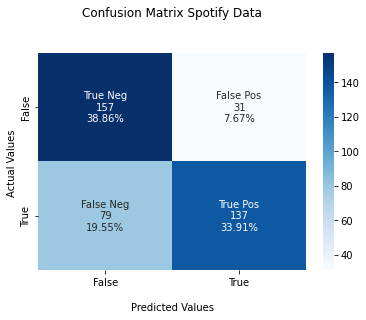

In [57]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix Spotify Data\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## ROC curve - ROC AUC score

In [100]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_grid)
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_pred_grid))

roc_auc_score for KNN:  0.7346828211189914


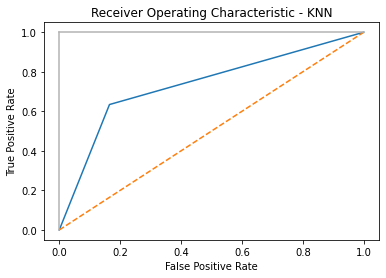

In [101]:
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 3. Support Vector Machine (SVM)

* Effective in high dimensional spaces.

* Still effective in cases where number of dimensions is greater than the number of samples.

* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

**The disadvantages of support vector machines include:**

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

* The support vector machines in scikit-learn support both dense (numpy.ndarray and convertible to that by numpy.asarray) and sparse (any scipy.sparse) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered numpy.ndarray (dense) or scipy.sparse.csr_matrix (sparse) with dtype=float64.

In [102]:
clf = SVC(random_state=21)

In [103]:
clf.fit(X_train, y_train)

SVC(random_state=21)

In [104]:
y_pred_svm = clf.predict(X_test)

In [105]:
pred_values = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_svm})
pred_values.head(100)

Actual value  Predicted value
0              1                1
1              0                0
2              0                0
3              1                0
4              1                1
..           ...              ...
95             0                0
96             1                1
97             1                1
98             1                0
99             0                0

[100 rows x 2 columns]

In [106]:
exactitud_svm = round(accuracy_score(y_test, y_pred_svm), 4)
precision_svm = round(precision_score(y_test, y_pred_svm), 4)
sensibilidad_svm = round(recall_score(y_test, y_pred_svm), 4)
puntaje_svm = round(f1_score(y_test, y_pred_svm), 4)

print(f'exactitud: {exactitud_svm}\nprecision: {precision_svm}\nsensibilidad: {sensibilidad_svm}\nf1 score: {puntaje_svm}')

exactitud: 0.7475
precision: 0.8314
sensibilidad: 0.662
f1 score: 0.7371


In [107]:
cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(cf_matrix_svm)

[[159  29]
 [ 73 143]]


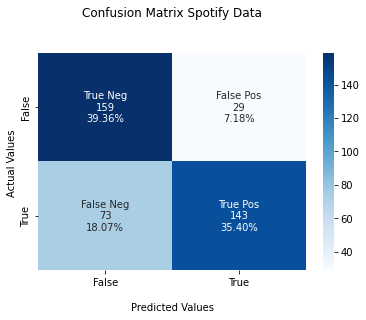

In [108]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_svm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_svm.flatten()/np.sum(cf_matrix_svm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_svm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix Spotify Data\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## ROC curve - ROC AUC score

In [119]:
false_positive_rate_svm, true_positive_rate_svm, threshold_svm = roc_curve(y_test, y_pred_svm)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_pred_svm))

roc_auc_score for SVM:  0.7538908589440505


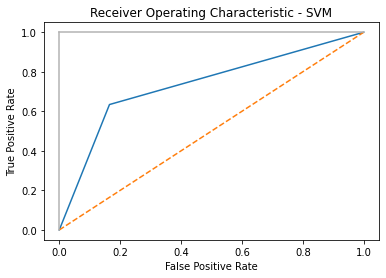

In [122]:
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Find the hyperparameters**

In [109]:
params_grid_svm = {  
               'kernel':['linear','rbf', 'poly', 'sigmoid'], #'linear', 'rbf' 'poly', 
               'degree':[1, 2, 3],
               'gamma':['scale', 'auto'],
               'coef0':[0.0, 0.25, 0.50, 0.75],
               'tol':[1e-3, 1e-4, 1e-5],
               'C':[0.25, 0.5, 0.75, 1.0]}
grid_svm = GridSearchCV(clf, params_grid_svm, refit = True, verbose = 3,n_jobs=1)
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[CV 1/5] END C=0.25, coef0=0.0, degree=1, gamma=scale, kernel=linear, tol=0.001;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.0, degree=1, gamma=scale, kernel=linear, tol=0.001;, score=0.656 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.0, degree=1, gamma=scale, kernel=linear, tol=0.001;, score=0.653 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.0, degree=1, gamma=scale, kernel=linear, tol=0.001;, score=0.621 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.0, degree=1, gamma=scale, kernel=linear, tol=0.001;, score=0.652 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.0, degree=1, gamma=scale, kernel=linear, tol=0.0001;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.0, degree=1, gamma=scale, kernel=linear, tol=0.0001;, score=0.656 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.0, degree=1, gamma=scale, kernel=linear, tol=0.0001;, score=0.653 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0

[CV 2/5] END C=0.25, coef0=0.0, degree=1, gamma=auto, kernel=rbf, tol=0.001;, score=0.610 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.0, degree=1, gamma=auto, kernel=rbf, tol=0.001;, score=0.616 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.0, degree=1, gamma=auto, kernel=rbf, tol=0.001;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.0, degree=1, gamma=auto, kernel=rbf, tol=0.001;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.0, degree=1, gamma=auto, kernel=rbf, tol=0.0001;, score=0.616 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.0, degree=1, gamma=auto, kernel=rbf, tol=0.0001;, score=0.610 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.0, degree=1, gamma=auto, kernel=rbf, tol=0.0001;, score=0.616 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.0, degree=1, gamma=auto, kernel=rbf, tol=0.0001;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.0, degree=1, gamma=auto, kernel=rbf, tol=0.0001;, score=0.643 total time=   0.0s
[CV 1/5] END C

[CV 1/5] END C=0.25, coef0=0.0, degree=2, gamma=scale, kernel=poly, tol=0.001;, score=0.706 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.0, degree=2, gamma=scale, kernel=poly, tol=0.001;, score=0.681 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.0, degree=2, gamma=scale, kernel=poly, tol=0.001;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.0, degree=2, gamma=scale, kernel=poly, tol=0.001;, score=0.680 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.0, degree=2, gamma=scale, kernel=poly, tol=0.001;, score=0.671 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.0, degree=2, gamma=scale, kernel=poly, tol=0.0001;, score=0.706 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.0, degree=2, gamma=scale, kernel=poly, tol=0.0001;, score=0.681 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.0, degree=2, gamma=scale, kernel=poly, tol=0.0001;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.0, degree=2, gamma=scale, kernel=poly, tol=0.0001;, score=0.680 total time=   0.

[CV 3/5] END C=0.25, coef0=0.0, degree=2, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.573 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.0, degree=2, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.599 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.0, degree=2, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.602 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.0, degree=2, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.607 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.0, degree=2, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.576 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.0, degree=2, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.573 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.0, degree=2, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.599 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.0, degree=2, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.602 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.0, degree=2, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.6

[CV 1/5] END C=0.25, coef0=0.0, degree=3, gamma=auto, kernel=linear, tol=0.0001;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.0, degree=3, gamma=auto, kernel=linear, tol=0.0001;, score=0.656 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.0, degree=3, gamma=auto, kernel=linear, tol=0.0001;, score=0.653 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.0, degree=3, gamma=auto, kernel=linear, tol=0.0001;, score=0.621 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.0, degree=3, gamma=auto, kernel=linear, tol=0.0001;, score=0.652 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.0, degree=3, gamma=auto, kernel=linear, tol=1e-05;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.0, degree=3, gamma=auto, kernel=linear, tol=1e-05;, score=0.656 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.0, degree=3, gamma=auto, kernel=linear, tol=1e-05;, score=0.653 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.0, degree=3, gamma=auto, kernel=linear, tol=1e-05;, score=0.621 total 

[CV 5/5] END C=0.25, coef0=0.25, degree=1, gamma=scale, kernel=rbf, tol=0.001;, score=0.677 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.25, degree=1, gamma=scale, kernel=rbf, tol=0.0001;, score=0.659 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.25, degree=1, gamma=scale, kernel=rbf, tol=0.0001;, score=0.703 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.25, degree=1, gamma=scale, kernel=rbf, tol=0.0001;, score=0.684 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.25, degree=1, gamma=scale, kernel=rbf, tol=0.0001;, score=0.640 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.25, degree=1, gamma=scale, kernel=rbf, tol=0.0001;, score=0.677 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.25, degree=1, gamma=scale, kernel=rbf, tol=1e-05;, score=0.659 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.25, degree=1, gamma=scale, kernel=rbf, tol=1e-05;, score=0.703 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.25, degree=1, gamma=scale, kernel=rbf, tol=1e-05;, score=0.684 total time=   0

[CV 1/5] END C=0.25, coef0=0.25, degree=1, gamma=auto, kernel=poly, tol=0.0001;, score=0.616 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.25, degree=1, gamma=auto, kernel=poly, tol=0.0001;, score=0.591 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.25, degree=1, gamma=auto, kernel=poly, tol=0.0001;, score=0.579 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.25, degree=1, gamma=auto, kernel=poly, tol=0.0001;, score=0.602 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.25, degree=1, gamma=auto, kernel=poly, tol=0.0001;, score=0.621 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.25, degree=1, gamma=auto, kernel=poly, tol=1e-05;, score=0.616 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.25, degree=1, gamma=auto, kernel=poly, tol=1e-05;, score=0.591 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.25, degree=1, gamma=auto, kernel=poly, tol=1e-05;, score=0.579 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.25, degree=1, gamma=auto, kernel=poly, tol=1e-05;, score=0.602 total time=   0

[CV 5/5] END C=0.25, coef0=0.25, degree=2, gamma=scale, kernel=sigmoid, tol=0.001;, score=0.593 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.25, degree=2, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.557 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.25, degree=2, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.548 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.25, degree=2, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.533 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.25, degree=2, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.559 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.25, degree=2, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.593 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.25, degree=2, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.557 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.25, degree=2, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.548 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.25, degree=2, gamma=scale, kernel=sigmoid, tol

[CV 1/5] END C=0.25, coef0=0.25, degree=3, gamma=scale, kernel=linear, tol=0.0001;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.25, degree=3, gamma=scale, kernel=linear, tol=0.0001;, score=0.656 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.25, degree=3, gamma=scale, kernel=linear, tol=0.0001;, score=0.653 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.25, degree=3, gamma=scale, kernel=linear, tol=0.0001;, score=0.621 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.25, degree=3, gamma=scale, kernel=linear, tol=0.0001;, score=0.652 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.25, degree=3, gamma=scale, kernel=linear, tol=1e-05;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.25, degree=3, gamma=scale, kernel=linear, tol=1e-05;, score=0.656 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.25, degree=3, gamma=scale, kernel=linear, tol=1e-05;, score=0.653 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.25, degree=3, gamma=scale, kernel=linear, tol=1e-05;, 

[CV 5/5] END C=0.25, coef0=0.25, degree=3, gamma=auto, kernel=rbf, tol=0.001;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.25, degree=3, gamma=auto, kernel=rbf, tol=0.0001;, score=0.616 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.25, degree=3, gamma=auto, kernel=rbf, tol=0.0001;, score=0.610 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.25, degree=3, gamma=auto, kernel=rbf, tol=0.0001;, score=0.616 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.25, degree=3, gamma=auto, kernel=rbf, tol=0.0001;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.25, degree=3, gamma=auto, kernel=rbf, tol=0.0001;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.25, degree=3, gamma=auto, kernel=rbf, tol=1e-05;, score=0.616 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.25, degree=3, gamma=auto, kernel=rbf, tol=1e-05;, score=0.610 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.25, degree=3, gamma=auto, kernel=rbf, tol=1e-05;, score=0.616 total time=   0.0s
[CV 4

[CV 1/5] END C=0.25, coef0=0.5, degree=1, gamma=scale, kernel=poly, tol=0.0001;, score=0.650 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.5, degree=1, gamma=scale, kernel=poly, tol=0.0001;, score=0.644 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.5, degree=1, gamma=scale, kernel=poly, tol=0.0001;, score=0.653 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.5, degree=1, gamma=scale, kernel=poly, tol=0.0001;, score=0.621 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.5, degree=1, gamma=scale, kernel=poly, tol=0.0001;, score=0.637 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.5, degree=1, gamma=scale, kernel=poly, tol=1e-05;, score=0.650 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.5, degree=1, gamma=scale, kernel=poly, tol=1e-05;, score=0.644 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.5, degree=1, gamma=scale, kernel=poly, tol=1e-05;, score=0.653 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.5, degree=1, gamma=scale, kernel=poly, tol=1e-05;, score=0.621 total time=   0

[CV 5/5] END C=0.25, coef0=0.5, degree=1, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.578 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.5, degree=1, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.579 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.5, degree=1, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.567 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.5, degree=1, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.554 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.5, degree=1, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.590 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.5, degree=1, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.578 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.5, degree=1, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.579 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.5, degree=1, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.567 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.5, degree=1, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.5

[CV 5/5] END C=0.25, coef0=0.5, degree=2, gamma=auto, kernel=linear, tol=0.001;, score=0.652 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.5, degree=2, gamma=auto, kernel=linear, tol=0.0001;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.5, degree=2, gamma=auto, kernel=linear, tol=0.0001;, score=0.656 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.5, degree=2, gamma=auto, kernel=linear, tol=0.0001;, score=0.653 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.5, degree=2, gamma=auto, kernel=linear, tol=0.0001;, score=0.621 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.5, degree=2, gamma=auto, kernel=linear, tol=0.0001;, score=0.652 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.5, degree=2, gamma=auto, kernel=linear, tol=1e-05;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.5, degree=2, gamma=auto, kernel=linear, tol=1e-05;, score=0.656 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.5, degree=2, gamma=auto, kernel=linear, tol=1e-05;, score=0.653 total 

[CV 1/5] END C=0.25, coef0=0.5, degree=3, gamma=scale, kernel=rbf, tol=0.0001;, score=0.659 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.5, degree=3, gamma=scale, kernel=rbf, tol=0.0001;, score=0.703 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.5, degree=3, gamma=scale, kernel=rbf, tol=0.0001;, score=0.684 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.5, degree=3, gamma=scale, kernel=rbf, tol=0.0001;, score=0.640 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.5, degree=3, gamma=scale, kernel=rbf, tol=0.0001;, score=0.677 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.5, degree=3, gamma=scale, kernel=rbf, tol=1e-05;, score=0.659 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.5, degree=3, gamma=scale, kernel=rbf, tol=1e-05;, score=0.703 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.5, degree=3, gamma=scale, kernel=rbf, tol=1e-05;, score=0.684 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.5, degree=3, gamma=scale, kernel=rbf, tol=1e-05;, score=0.640 total time=   0.0s
[CV 5

[CV 1/5] END C=0.25, coef0=0.5, degree=3, gamma=auto, kernel=poly, tol=0.0001;, score=0.635 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.5, degree=3, gamma=auto, kernel=poly, tol=0.0001;, score=0.622 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.5, degree=3, gamma=auto, kernel=poly, tol=0.0001;, score=0.616 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.5, degree=3, gamma=auto, kernel=poly, tol=0.0001;, score=0.618 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.5, degree=3, gamma=auto, kernel=poly, tol=0.0001;, score=0.637 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.5, degree=3, gamma=auto, kernel=poly, tol=1e-05;, score=0.635 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.5, degree=3, gamma=auto, kernel=poly, tol=1e-05;, score=0.622 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.5, degree=3, gamma=auto, kernel=poly, tol=1e-05;, score=0.616 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.5, degree=3, gamma=auto, kernel=poly, tol=1e-05;, score=0.618 total time=   0.0s
[CV 5

[CV 1/5] END C=0.25, coef0=0.75, degree=1, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.502 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.75, degree=1, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.502 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.75, degree=1, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.502 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.75, degree=1, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.503 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.75, degree=1, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.497 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.75, degree=1, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.502 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.75, degree=1, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.502 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.75, degree=1, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.502 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.75, degree=1, gamma=scale, kernel=sigmoid, tol

[CV 3/5] END C=0.25, coef0=0.75, degree=2, gamma=scale, kernel=linear, tol=0.0001;, score=0.653 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.75, degree=2, gamma=scale, kernel=linear, tol=0.0001;, score=0.621 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.75, degree=2, gamma=scale, kernel=linear, tol=0.0001;, score=0.652 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.75, degree=2, gamma=scale, kernel=linear, tol=1e-05;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.75, degree=2, gamma=scale, kernel=linear, tol=1e-05;, score=0.656 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.75, degree=2, gamma=scale, kernel=linear, tol=1e-05;, score=0.653 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.75, degree=2, gamma=scale, kernel=linear, tol=1e-05;, score=0.621 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.75, degree=2, gamma=scale, kernel=linear, tol=1e-05;, score=0.652 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.75, degree=2, gamma=scale, kernel=rbf, tol=0.001;, score

[CV 2/5] END C=0.25, coef0=0.75, degree=2, gamma=auto, kernel=rbf, tol=0.0001;, score=0.610 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.75, degree=2, gamma=auto, kernel=rbf, tol=0.0001;, score=0.616 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.75, degree=2, gamma=auto, kernel=rbf, tol=0.0001;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.75, degree=2, gamma=auto, kernel=rbf, tol=0.0001;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.75, degree=2, gamma=auto, kernel=rbf, tol=1e-05;, score=0.616 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.75, degree=2, gamma=auto, kernel=rbf, tol=1e-05;, score=0.610 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.75, degree=2, gamma=auto, kernel=rbf, tol=1e-05;, score=0.616 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.75, degree=2, gamma=auto, kernel=rbf, tol=1e-05;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.75, degree=2, gamma=auto, kernel=rbf, tol=1e-05;, score=0.643 total time=   0.0s
[CV 1/

[CV 5/5] END C=0.25, coef0=0.75, degree=3, gamma=scale, kernel=poly, tol=0.001;, score=0.736 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.75, degree=3, gamma=scale, kernel=poly, tol=0.0001;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.75, degree=3, gamma=scale, kernel=poly, tol=0.0001;, score=0.731 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.75, degree=3, gamma=scale, kernel=poly, tol=0.0001;, score=0.731 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.75, degree=3, gamma=scale, kernel=poly, tol=0.0001;, score=0.683 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.75, degree=3, gamma=scale, kernel=poly, tol=0.0001;, score=0.736 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.75, degree=3, gamma=scale, kernel=poly, tol=1e-05;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.75, degree=3, gamma=scale, kernel=poly, tol=1e-05;, score=0.731 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.75, degree=3, gamma=scale, kernel=poly, tol=1e-05;, score=0.731 total 

[CV 3/5] END C=0.25, coef0=0.75, degree=3, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.567 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.75, degree=3, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.571 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.75, degree=3, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.559 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.75, degree=3, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.536 total time=   0.0s
[CV 2/5] END C=0.25, coef0=0.75, degree=3, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.567 total time=   0.0s
[CV 3/5] END C=0.25, coef0=0.75, degree=3, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.567 total time=   0.0s
[CV 4/5] END C=0.25, coef0=0.75, degree=3, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.571 total time=   0.0s
[CV 5/5] END C=0.25, coef0=0.75, degree=3, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.559 total time=   0.0s
[CV 1/5] END C=0.25, coef0=0.75, degree=3, gamma=auto, kernel=sigmoid, tol=1e-05;, 

[CV 2/5] END C=0.5, coef0=0.0, degree=1, gamma=auto, kernel=linear, tol=0.0001;, score=0.644 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.0, degree=1, gamma=auto, kernel=linear, tol=0.0001;, score=0.650 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.0, degree=1, gamma=auto, kernel=linear, tol=0.0001;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.0, degree=1, gamma=auto, kernel=linear, tol=0.0001;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.0, degree=1, gamma=auto, kernel=linear, tol=1e-05;, score=0.659 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.0, degree=1, gamma=auto, kernel=linear, tol=1e-05;, score=0.644 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.0, degree=1, gamma=auto, kernel=linear, tol=1e-05;, score=0.650 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.0, degree=1, gamma=auto, kernel=linear, tol=1e-05;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.0, degree=1, gamma=auto, kernel=linear, tol=1e-05;, score=0.643 total time=   0.

[CV 2/5] END C=0.5, coef0=0.0, degree=2, gamma=scale, kernel=rbf, tol=0.0001;, score=0.697 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.0, degree=2, gamma=scale, kernel=rbf, tol=0.0001;, score=0.703 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.0, degree=2, gamma=scale, kernel=rbf, tol=0.0001;, score=0.689 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.0, degree=2, gamma=scale, kernel=rbf, tol=0.0001;, score=0.680 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.0, degree=2, gamma=scale, kernel=rbf, tol=1e-05;, score=0.681 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.0, degree=2, gamma=scale, kernel=rbf, tol=1e-05;, score=0.697 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.0, degree=2, gamma=scale, kernel=rbf, tol=1e-05;, score=0.703 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.0, degree=2, gamma=scale, kernel=rbf, tol=1e-05;, score=0.689 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.0, degree=2, gamma=scale, kernel=rbf, tol=1e-05;, score=0.680 total time=   0.0s
[CV 1/5] END C=

[CV 3/5] END C=0.5, coef0=0.0, degree=2, gamma=auto, kernel=poly, tol=0.0001;, score=0.591 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.0, degree=2, gamma=auto, kernel=poly, tol=0.0001;, score=0.609 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.0, degree=2, gamma=auto, kernel=poly, tol=0.0001;, score=0.599 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.0, degree=2, gamma=auto, kernel=poly, tol=1e-05;, score=0.598 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.0, degree=2, gamma=auto, kernel=poly, tol=1e-05;, score=0.635 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.0, degree=2, gamma=auto, kernel=poly, tol=1e-05;, score=0.591 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.0, degree=2, gamma=auto, kernel=poly, tol=1e-05;, score=0.609 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.0, degree=2, gamma=auto, kernel=poly, tol=1e-05;, score=0.599 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.0, degree=2, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.625 total time=   0.0s
[CV 2/5] END 

[CV 4/5] END C=0.5, coef0=0.0, degree=3, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.519 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.0, degree=3, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.519 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.0, degree=3, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.471 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.0, degree=3, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.511 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.0, degree=3, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.520 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.0, degree=3, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.519 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.0, degree=3, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.519 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.0, degree=3, gamma=auto, kernel=linear, tol=0.001;, score=0.659 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.0, degree=3, gamma=auto, kernel=linear, tol=0.001;, score=0.644 tota

[CV 5/5] END C=0.5, coef0=0.25, degree=1, gamma=scale, kernel=linear, tol=0.0001;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.25, degree=1, gamma=scale, kernel=linear, tol=1e-05;, score=0.659 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.25, degree=1, gamma=scale, kernel=linear, tol=1e-05;, score=0.644 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.25, degree=1, gamma=scale, kernel=linear, tol=1e-05;, score=0.650 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.25, degree=1, gamma=scale, kernel=linear, tol=1e-05;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.25, degree=1, gamma=scale, kernel=linear, tol=1e-05;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.25, degree=1, gamma=scale, kernel=rbf, tol=0.001;, score=0.681 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.25, degree=1, gamma=scale, kernel=rbf, tol=0.001;, score=0.697 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.25, degree=1, gamma=scale, kernel=rbf, tol=0.001;, score=0.703 total time

[CV 5/5] END C=0.5, coef0=0.25, degree=1, gamma=auto, kernel=rbf, tol=0.0001;, score=0.646 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.25, degree=1, gamma=auto, kernel=rbf, tol=1e-05;, score=0.653 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.25, degree=1, gamma=auto, kernel=rbf, tol=1e-05;, score=0.632 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.25, degree=1, gamma=auto, kernel=rbf, tol=1e-05;, score=0.656 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.25, degree=1, gamma=auto, kernel=rbf, tol=1e-05;, score=0.630 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.25, degree=1, gamma=auto, kernel=rbf, tol=1e-05;, score=0.646 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.25, degree=1, gamma=auto, kernel=poly, tol=0.001;, score=0.625 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.25, degree=1, gamma=auto, kernel=poly, tol=0.001;, score=0.619 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.25, degree=1, gamma=auto, kernel=poly, tol=0.001;, score=0.616 total time=   0.0s
[CV 4/5] END C=

[CV 1/5] END C=0.5, coef0=0.25, degree=2, gamma=scale, kernel=poly, tol=1e-05;, score=0.706 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.25, degree=2, gamma=scale, kernel=poly, tol=1e-05;, score=0.706 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.25, degree=2, gamma=scale, kernel=poly, tol=1e-05;, score=0.715 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.25, degree=2, gamma=scale, kernel=poly, tol=1e-05;, score=0.661 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.25, degree=2, gamma=scale, kernel=poly, tol=1e-05;, score=0.711 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.25, degree=2, gamma=scale, kernel=sigmoid, tol=0.001;, score=0.502 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.25, degree=2, gamma=scale, kernel=sigmoid, tol=0.001;, score=0.502 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.25, degree=2, gamma=scale, kernel=sigmoid, tol=0.001;, score=0.520 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.25, degree=2, gamma=scale, kernel=sigmoid, tol=0.001;, score=0.556 total ti

[CV 5/5] END C=0.5, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.649 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.622 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.594 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.607 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.615 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.649 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.25, degree=3, gamma=scale, kernel=linear, tol=0.001;, score=0.659 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.25, degree=3, gamma=scale, kernel=linear, tol=0.001;, score=0.644 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.25, degree=3, gamma=scale, kernel=linear, tol=0.001;, score=0.650 t

[CV 2/5] END C=0.5, coef0=0.25, degree=3, gamma=auto, kernel=linear, tol=1e-05;, score=0.644 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.25, degree=3, gamma=auto, kernel=linear, tol=1e-05;, score=0.650 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.25, degree=3, gamma=auto, kernel=linear, tol=1e-05;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.25, degree=3, gamma=auto, kernel=linear, tol=1e-05;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.25, degree=3, gamma=auto, kernel=rbf, tol=0.001;, score=0.653 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.25, degree=3, gamma=auto, kernel=rbf, tol=0.001;, score=0.632 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.25, degree=3, gamma=auto, kernel=rbf, tol=0.001;, score=0.653 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.25, degree=3, gamma=auto, kernel=rbf, tol=0.001;, score=0.630 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.25, degree=3, gamma=auto, kernel=rbf, tol=0.001;, score=0.646 total time=   0.0s
[CV 1/5

[CV 1/5] END C=0.5, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=1e-05;, score=0.681 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=1e-05;, score=0.697 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=1e-05;, score=0.703 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=1e-05;, score=0.689 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=1e-05;, score=0.680 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.5, degree=1, gamma=scale, kernel=poly, tol=0.001;, score=0.663 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.5, degree=1, gamma=scale, kernel=poly, tol=0.001;, score=0.653 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.5, degree=1, gamma=scale, kernel=poly, tol=0.001;, score=0.653 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.5, degree=1, gamma=scale, kernel=poly, tol=0.001;, score=0.621 total time=   0.0s
[CV 5/5] END C=

[CV 1/5] END C=0.5, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=1e-05;, score=0.625 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=1e-05;, score=0.619 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=1e-05;, score=0.616 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=1e-05;, score=0.624 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=1e-05;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.5, degree=1, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.622 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.5, degree=1, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.585 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.5, degree=1, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.576 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.5, degree=1, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.609 total time=   0.0s
[CV 5/5

[CV 1/5] END C=0.5, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.514 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.523 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.533 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.559 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.553 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.5, degree=2, gamma=auto, kernel=linear, tol=0.001;, score=0.659 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.5, degree=2, gamma=auto, kernel=linear, tol=0.001;, score=0.644 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.5, degree=2, gamma=auto, kernel=linear, tol=0.001;, score=0.650 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.5, degree=2, gamma=auto, kernel=linear, tol=0.001;, score=0.627 total time

[CV 3/5] END C=0.5, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=1e-05;, score=0.650 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=1e-05;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=1e-05;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.5, degree=3, gamma=scale, kernel=rbf, tol=0.001;, score=0.681 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.5, degree=3, gamma=scale, kernel=rbf, tol=0.001;, score=0.697 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.5, degree=3, gamma=scale, kernel=rbf, tol=0.001;, score=0.703 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.5, degree=3, gamma=scale, kernel=rbf, tol=0.001;, score=0.689 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.5, degree=3, gamma=scale, kernel=rbf, tol=0.001;, score=0.680 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.5, degree=3, gamma=scale, kernel=rbf, tol=0.0001;, score=0.681 total time=   0.0s
[CV 2/5] 

[CV 4/5] END C=0.5, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=1e-05;, score=0.630 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=1e-05;, score=0.646 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.5, degree=3, gamma=auto, kernel=poly, tol=0.001;, score=0.638 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.5, degree=3, gamma=auto, kernel=poly, tol=0.001;, score=0.635 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.5, degree=3, gamma=auto, kernel=poly, tol=0.001;, score=0.647 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.5, degree=3, gamma=auto, kernel=poly, tol=0.001;, score=0.637 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.5, degree=3, gamma=auto, kernel=poly, tol=0.001;, score=0.637 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.5, degree=3, gamma=auto, kernel=poly, tol=0.0001;, score=0.638 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.5, degree=3, gamma=auto, kernel=poly, tol=0.0001;, score=0.635 total time=   0.0s
[CV 3/5] END C=0.5,

[CV 3/5] END C=0.5, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=1e-05;, score=0.653 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=1e-05;, score=0.621 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=1e-05;, score=0.655 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.75, degree=1, gamma=scale, kernel=sigmoid, tol=0.001;, score=0.542 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.75, degree=1, gamma=scale, kernel=sigmoid, tol=0.001;, score=0.533 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.75, degree=1, gamma=scale, kernel=sigmoid, tol=0.001;, score=0.529 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.75, degree=1, gamma=scale, kernel=sigmoid, tol=0.001;, score=0.571 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.75, degree=1, gamma=scale, kernel=sigmoid, tol=0.001;, score=0.540 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.75, degree=1, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.542 t

[CV 3/5] END C=0.5, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.551 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.593 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.584 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.75, degree=2, gamma=scale, kernel=linear, tol=0.001;, score=0.659 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.75, degree=2, gamma=scale, kernel=linear, tol=0.001;, score=0.644 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.75, degree=2, gamma=scale, kernel=linear, tol=0.001;, score=0.650 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.75, degree=2, gamma=scale, kernel=linear, tol=0.001;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.75, degree=2, gamma=scale, kernel=linear, tol=0.001;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.75, degree=2, gamma=scale, kernel=linear, tol=0.0001;, score=0.659 t

[CV 4/5] END C=0.5, coef0=0.75, degree=2, gamma=auto, kernel=linear, tol=1e-05;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.75, degree=2, gamma=auto, kernel=linear, tol=1e-05;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.75, degree=2, gamma=auto, kernel=rbf, tol=0.001;, score=0.653 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.75, degree=2, gamma=auto, kernel=rbf, tol=0.001;, score=0.632 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.75, degree=2, gamma=auto, kernel=rbf, tol=0.001;, score=0.653 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.75, degree=2, gamma=auto, kernel=rbf, tol=0.001;, score=0.630 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.75, degree=2, gamma=auto, kernel=rbf, tol=0.001;, score=0.646 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.75, degree=2, gamma=auto, kernel=rbf, tol=0.0001;, score=0.653 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.75, degree=2, gamma=auto, kernel=rbf, tol=0.0001;, score=0.632 total time=   0.0s
[CV 3/5] EN

[CV 4/5] END C=0.5, coef0=0.75, degree=3, gamma=scale, kernel=rbf, tol=1e-05;, score=0.689 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.75, degree=3, gamma=scale, kernel=rbf, tol=1e-05;, score=0.680 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.75, degree=3, gamma=scale, kernel=poly, tol=0.001;, score=0.743 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.75, degree=3, gamma=scale, kernel=poly, tol=0.001;, score=0.734 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.75, degree=3, gamma=scale, kernel=poly, tol=0.001;, score=0.749 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.75, degree=3, gamma=scale, kernel=poly, tol=0.001;, score=0.708 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.75, degree=3, gamma=scale, kernel=poly, tol=0.001;, score=0.736 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.75, degree=3, gamma=scale, kernel=poly, tol=0.0001;, score=0.743 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.75, degree=3, gamma=scale, kernel=poly, tol=0.0001;, score=0.734 total time=   0.0s
[

[CV 1/5] END C=0.5, coef0=0.75, degree=3, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.598 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.75, degree=3, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.567 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.75, degree=3, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.551 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.75, degree=3, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.593 total time=   0.0s
[CV 5/5] END C=0.5, coef0=0.75, degree=3, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.584 total time=   0.0s
[CV 1/5] END C=0.5, coef0=0.75, degree=3, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.598 total time=   0.0s
[CV 2/5] END C=0.5, coef0=0.75, degree=3, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.567 total time=   0.0s
[CV 3/5] END C=0.5, coef0=0.75, degree=3, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.551 total time=   0.0s
[CV 4/5] END C=0.5, coef0=0.75, degree=3, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.59

[CV 5/5] END C=0.75, coef0=0.0, degree=1, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.472 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.0, degree=1, gamma=auto, kernel=linear, tol=0.001;, score=0.666 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.0, degree=1, gamma=auto, kernel=linear, tol=0.001;, score=0.641 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.0, degree=1, gamma=auto, kernel=linear, tol=0.001;, score=0.647 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.0, degree=1, gamma=auto, kernel=linear, tol=0.001;, score=0.630 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.0, degree=1, gamma=auto, kernel=linear, tol=0.001;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.0, degree=1, gamma=auto, kernel=linear, tol=0.0001;, score=0.666 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.0, degree=1, gamma=auto, kernel=linear, tol=0.0001;, score=0.641 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.0, degree=1, gamma=auto, kernel=linear, tol=0.0001;, score=0.647 total 

[CV 2/5] END C=0.75, coef0=0.0, degree=2, gamma=scale, kernel=rbf, tol=0.001;, score=0.709 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.0, degree=2, gamma=scale, kernel=rbf, tol=0.001;, score=0.700 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.0, degree=2, gamma=scale, kernel=rbf, tol=0.001;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.0, degree=2, gamma=scale, kernel=rbf, tol=0.001;, score=0.699 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.0, degree=2, gamma=scale, kernel=rbf, tol=0.0001;, score=0.700 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.0, degree=2, gamma=scale, kernel=rbf, tol=0.0001;, score=0.709 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.0, degree=2, gamma=scale, kernel=rbf, tol=0.0001;, score=0.700 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.0, degree=2, gamma=scale, kernel=rbf, tol=0.0001;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.0, degree=2, gamma=scale, kernel=rbf, tol=0.0001;, score=0.699 total time=   0.0s
[CV 1

[CV 5/5] END C=0.75, coef0=0.0, degree=2, gamma=auto, kernel=poly, tol=0.001;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.0, degree=2, gamma=auto, kernel=poly, tol=0.0001;, score=0.635 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.0, degree=2, gamma=auto, kernel=poly, tol=0.0001;, score=0.632 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.0, degree=2, gamma=auto, kernel=poly, tol=0.0001;, score=0.613 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.0, degree=2, gamma=auto, kernel=poly, tol=0.0001;, score=0.624 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.0, degree=2, gamma=auto, kernel=poly, tol=0.0001;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.0, degree=2, gamma=auto, kernel=poly, tol=1e-05;, score=0.635 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.0, degree=2, gamma=auto, kernel=poly, tol=1e-05;, score=0.632 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.0, degree=2, gamma=auto, kernel=poly, tol=1e-05;, score=0.613 total time=   0.0s
[CV 4

[CV 4/5] END C=0.75, coef0=0.0, degree=3, gamma=scale, kernel=sigmoid, tol=0.001;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.0, degree=3, gamma=scale, kernel=sigmoid, tol=0.001;, score=0.472 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.0, degree=3, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.480 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.0, degree=3, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.483 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.0, degree=3, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.523 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.0, degree=3, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.0, degree=3, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.472 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.0, degree=3, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.480 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.0, degree=3, gamma=scale, kernel=sigmoid, tol=1e-05;, 

[CV 3/5] END C=0.75, coef0=0.25, degree=1, gamma=scale, kernel=linear, tol=0.0001;, score=0.647 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.25, degree=1, gamma=scale, kernel=linear, tol=0.0001;, score=0.630 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.25, degree=1, gamma=scale, kernel=linear, tol=0.0001;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.25, degree=1, gamma=scale, kernel=linear, tol=1e-05;, score=0.666 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.25, degree=1, gamma=scale, kernel=linear, tol=1e-05;, score=0.641 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.25, degree=1, gamma=scale, kernel=linear, tol=1e-05;, score=0.647 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.25, degree=1, gamma=scale, kernel=linear, tol=1e-05;, score=0.630 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.25, degree=1, gamma=scale, kernel=linear, tol=1e-05;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.25, degree=1, gamma=scale, kernel=rbf, tol=0.001;, score

[CV 1/5] END C=0.75, coef0=0.25, degree=1, gamma=auto, kernel=rbf, tol=0.0001;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.25, degree=1, gamma=auto, kernel=rbf, tol=0.0001;, score=0.647 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.25, degree=1, gamma=auto, kernel=rbf, tol=0.0001;, score=0.653 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.25, degree=1, gamma=auto, kernel=rbf, tol=0.0001;, score=0.637 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.25, degree=1, gamma=auto, kernel=rbf, tol=0.0001;, score=0.640 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.25, degree=1, gamma=auto, kernel=rbf, tol=1e-05;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.25, degree=1, gamma=auto, kernel=rbf, tol=1e-05;, score=0.647 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.25, degree=1, gamma=auto, kernel=rbf, tol=1e-05;, score=0.653 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.25, degree=1, gamma=auto, kernel=rbf, tol=1e-05;, score=0.637 total time=   0.0s
[CV 5

[CV 2/5] END C=0.75, coef0=0.25, degree=2, gamma=scale, kernel=poly, tol=0.0001;, score=0.724 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.25, degree=2, gamma=scale, kernel=poly, tol=0.0001;, score=0.715 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.25, degree=2, gamma=scale, kernel=poly, tol=0.0001;, score=0.668 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.25, degree=2, gamma=scale, kernel=poly, tol=0.0001;, score=0.711 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.25, degree=2, gamma=scale, kernel=poly, tol=1e-05;, score=0.721 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.25, degree=2, gamma=scale, kernel=poly, tol=1e-05;, score=0.724 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.25, degree=2, gamma=scale, kernel=poly, tol=1e-05;, score=0.715 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.25, degree=2, gamma=scale, kernel=poly, tol=1e-05;, score=0.668 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.25, degree=2, gamma=scale, kernel=poly, tol=1e-05;, score=0.711 total t

[CV 1/5] END C=0.75, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.632 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.616 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.622 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.630 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.646 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.632 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.616 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.622 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=1e-05;, 

[CV 3/5] END C=0.75, coef0=0.25, degree=3, gamma=auto, kernel=linear, tol=0.0001;, score=0.647 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.25, degree=3, gamma=auto, kernel=linear, tol=0.0001;, score=0.630 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.25, degree=3, gamma=auto, kernel=linear, tol=0.0001;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.25, degree=3, gamma=auto, kernel=linear, tol=1e-05;, score=0.666 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.25, degree=3, gamma=auto, kernel=linear, tol=1e-05;, score=0.641 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.25, degree=3, gamma=auto, kernel=linear, tol=1e-05;, score=0.647 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.25, degree=3, gamma=auto, kernel=linear, tol=1e-05;, score=0.630 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.25, degree=3, gamma=auto, kernel=linear, tol=1e-05;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.25, degree=3, gamma=auto, kernel=rbf, tol=0.001;, score=0.656 to

[CV 2/5] END C=0.75, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=0.0001;, score=0.709 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=0.0001;, score=0.700 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=0.0001;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=0.0001;, score=0.699 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=1e-05;, score=0.700 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=1e-05;, score=0.709 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=1e-05;, score=0.700 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=1e-05;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=1e-05;, score=0.699 total time=   0.0s
[CV 1/

[CV 1/5] END C=0.75, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=0.0001;, score=0.632 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=0.0001;, score=0.628 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=0.0001;, score=0.635 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=0.0001;, score=0.634 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=0.0001;, score=0.655 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=1e-05;, score=0.632 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=1e-05;, score=0.628 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=1e-05;, score=0.635 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=1e-05;, score=0.634 total time=   0.0s
[CV 5

[CV 5/5] END C=0.75, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=0.001;, score=0.537 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.508 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.502 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.526 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.556 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.537 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.508 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.502 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=1e-05;, 

[CV 4/5] END C=0.75, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=0.001;, score=0.630 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=0.001;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=0.0001;, score=0.666 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=0.0001;, score=0.641 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=0.0001;, score=0.647 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=0.0001;, score=0.630 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=0.0001;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=1e-05;, score=0.666 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=1e-05;, score=0.6

[CV 4/5] END C=0.75, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=0.001;, score=0.637 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=0.001;, score=0.640 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=0.0001;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=0.0001;, score=0.647 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=0.0001;, score=0.653 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=0.0001;, score=0.637 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=0.0001;, score=0.640 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=1e-05;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=1e-05;, score=0.647 total time=   0.0s
[CV 3/5] END C

[CV 1/5] END C=0.75, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=0.0001;, score=0.659 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=0.0001;, score=0.641 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=0.0001;, score=0.644 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=0.0001;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=0.0001;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=1e-05;, score=0.659 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=1e-05;, score=0.641 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=1e-05;, score=0.644 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=1e-05;, score=0.627 total 

[CV 1/5] END C=0.75, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.622 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.588 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.573 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.612 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.621 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.622 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.588 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.573 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=1e-05;, 

[CV 4/5] END C=0.75, coef0=0.75, degree=2, gamma=auto, kernel=linear, tol=0.0001;, score=0.630 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.75, degree=2, gamma=auto, kernel=linear, tol=0.0001;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.75, degree=2, gamma=auto, kernel=linear, tol=1e-05;, score=0.666 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.75, degree=2, gamma=auto, kernel=linear, tol=1e-05;, score=0.641 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.75, degree=2, gamma=auto, kernel=linear, tol=1e-05;, score=0.647 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.75, degree=2, gamma=auto, kernel=linear, tol=1e-05;, score=0.630 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.75, degree=2, gamma=auto, kernel=linear, tol=1e-05;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.75, degree=2, gamma=auto, kernel=rbf, tol=0.001;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.75, degree=2, gamma=auto, kernel=rbf, tol=0.001;, score=0.647 total 

[CV 4/5] END C=0.75, coef0=0.75, degree=3, gamma=scale, kernel=rbf, tol=0.0001;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.75, degree=3, gamma=scale, kernel=rbf, tol=0.0001;, score=0.699 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.75, degree=3, gamma=scale, kernel=rbf, tol=1e-05;, score=0.700 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.75, degree=3, gamma=scale, kernel=rbf, tol=1e-05;, score=0.709 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.75, degree=3, gamma=scale, kernel=rbf, tol=1e-05;, score=0.700 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.75, degree=3, gamma=scale, kernel=rbf, tol=1e-05;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.75, degree=3, gamma=scale, kernel=rbf, tol=1e-05;, score=0.699 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.75, degree=3, gamma=scale, kernel=poly, tol=0.001;, score=0.737 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.75, degree=3, gamma=scale, kernel=poly, tol=0.001;, score=0.731 total time=   0.

[CV 3/5] END C=0.75, coef0=0.75, degree=3, gamma=auto, kernel=poly, tol=0.0001;, score=0.663 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.75, degree=3, gamma=auto, kernel=poly, tol=0.0001;, score=0.649 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.75, degree=3, gamma=auto, kernel=poly, tol=0.0001;, score=0.655 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.75, degree=3, gamma=auto, kernel=poly, tol=1e-05;, score=0.675 total time=   0.0s
[CV 2/5] END C=0.75, coef0=0.75, degree=3, gamma=auto, kernel=poly, tol=1e-05;, score=0.653 total time=   0.0s
[CV 3/5] END C=0.75, coef0=0.75, degree=3, gamma=auto, kernel=poly, tol=1e-05;, score=0.663 total time=   0.0s
[CV 4/5] END C=0.75, coef0=0.75, degree=3, gamma=auto, kernel=poly, tol=1e-05;, score=0.649 total time=   0.0s
[CV 5/5] END C=0.75, coef0=0.75, degree=3, gamma=auto, kernel=poly, tol=1e-05;, score=0.655 total time=   0.0s
[CV 1/5] END C=0.75, coef0=0.75, degree=3, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.622 total time=   

[CV 4/5] END C=1.0, coef0=0.0, degree=1, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.481 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.0, degree=1, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.453 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.0, degree=1, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.461 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.0, degree=1, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.489 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.0, degree=1, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.529 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.0, degree=1, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.481 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.0, degree=1, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.453 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.0, degree=1, gamma=auto, kernel=linear, tol=0.001;, score=0.669 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.0, degree=1, gamma=auto, kernel=linear, tol=0.001;, score=0.644 tota

[CV 3/5] END C=1.0, coef0=0.0, degree=2, gamma=scale, kernel=linear, tol=0.0001;, score=0.644 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.0, degree=2, gamma=scale, kernel=linear, tol=0.0001;, score=0.637 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.0, degree=2, gamma=scale, kernel=linear, tol=0.0001;, score=0.658 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.0, degree=2, gamma=scale, kernel=linear, tol=1e-05;, score=0.669 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.0, degree=2, gamma=scale, kernel=linear, tol=1e-05;, score=0.644 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.0, degree=2, gamma=scale, kernel=linear, tol=1e-05;, score=0.644 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.0, degree=2, gamma=scale, kernel=linear, tol=1e-05;, score=0.637 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.0, degree=2, gamma=scale, kernel=linear, tol=1e-05;, score=0.658 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.0, degree=2, gamma=scale, kernel=rbf, tol=0.001;, score=0.703 total time=

[CV 3/5] END C=1.0, coef0=0.0, degree=2, gamma=auto, kernel=rbf, tol=0.0001;, score=0.656 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.0, degree=2, gamma=auto, kernel=rbf, tol=0.0001;, score=0.652 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.0, degree=2, gamma=auto, kernel=rbf, tol=0.0001;, score=0.643 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.0, degree=2, gamma=auto, kernel=rbf, tol=1e-05;, score=0.666 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.0, degree=2, gamma=auto, kernel=rbf, tol=1e-05;, score=0.650 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.0, degree=2, gamma=auto, kernel=rbf, tol=1e-05;, score=0.656 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.0, degree=2, gamma=auto, kernel=rbf, tol=1e-05;, score=0.652 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.0, degree=2, gamma=auto, kernel=rbf, tol=1e-05;, score=0.643 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.0, degree=2, gamma=auto, kernel=poly, tol=0.001;, score=0.632 total time=   0.0s
[CV 2/5] END C=1.0, coef

[CV 4/5] END C=1.0, coef0=0.0, degree=3, gamma=scale, kernel=poly, tol=0.0001;, score=0.689 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.0, degree=3, gamma=scale, kernel=poly, tol=0.0001;, score=0.742 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.0, degree=3, gamma=scale, kernel=poly, tol=1e-05;, score=0.731 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.0, degree=3, gamma=scale, kernel=poly, tol=1e-05;, score=0.724 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.0, degree=3, gamma=scale, kernel=poly, tol=1e-05;, score=0.759 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.0, degree=3, gamma=scale, kernel=poly, tol=1e-05;, score=0.689 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.0, degree=3, gamma=scale, kernel=poly, tol=1e-05;, score=0.742 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.0, degree=3, gamma=scale, kernel=sigmoid, tol=0.001;, score=0.461 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.0, degree=3, gamma=scale, kernel=sigmoid, tol=0.001;, score=0.489 total time=   0.0s
[C

[CV 1/5] END C=1.0, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.635 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.625 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.628 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.615 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.0, degree=3, gamma=auto, kernel=sigmoid, tol=1e-05;, score=0.643 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.25, degree=1, gamma=scale, kernel=linear, tol=0.001;, score=0.669 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.25, degree=1, gamma=scale, kernel=linear, tol=0.001;, score=0.644 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.25, degree=1, gamma=scale, kernel=linear, tol=0.001;, score=0.644 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.25, degree=1, gamma=scale, kernel=linear, tol=0.001;, score=0.634 total t

[CV 5/5] END C=1.0, coef0=0.25, degree=1, gamma=auto, kernel=linear, tol=0.0001;, score=0.658 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.25, degree=1, gamma=auto, kernel=linear, tol=1e-05;, score=0.669 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.25, degree=1, gamma=auto, kernel=linear, tol=1e-05;, score=0.644 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.25, degree=1, gamma=auto, kernel=linear, tol=1e-05;, score=0.644 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.25, degree=1, gamma=auto, kernel=linear, tol=1e-05;, score=0.637 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.25, degree=1, gamma=auto, kernel=linear, tol=1e-05;, score=0.658 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.25, degree=1, gamma=auto, kernel=rbf, tol=0.001;, score=0.666 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.25, degree=1, gamma=auto, kernel=rbf, tol=0.001;, score=0.650 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.25, degree=1, gamma=auto, kernel=rbf, tol=0.001;, score=0.656 total time=   0.0s


[CV 5/5] END C=1.0, coef0=0.25, degree=2, gamma=scale, kernel=rbf, tol=0.0001;, score=0.714 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.25, degree=2, gamma=scale, kernel=rbf, tol=1e-05;, score=0.703 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.25, degree=2, gamma=scale, kernel=rbf, tol=1e-05;, score=0.724 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.25, degree=2, gamma=scale, kernel=rbf, tol=1e-05;, score=0.709 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.25, degree=2, gamma=scale, kernel=rbf, tol=1e-05;, score=0.683 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.25, degree=2, gamma=scale, kernel=rbf, tol=1e-05;, score=0.714 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.25, degree=2, gamma=scale, kernel=poly, tol=0.001;, score=0.721 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.25, degree=2, gamma=scale, kernel=poly, tol=0.001;, score=0.724 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.25, degree=2, gamma=scale, kernel=poly, tol=0.001;, score=0.724 total time=   0.0s
[CV 4/

[CV 3/5] END C=1.0, coef0=0.25, degree=2, gamma=auto, kernel=poly, tol=1e-05;, score=0.653 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.25, degree=2, gamma=auto, kernel=poly, tol=1e-05;, score=0.634 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.25, degree=2, gamma=auto, kernel=poly, tol=1e-05;, score=0.634 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.632 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.619 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.625 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.627 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.643 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.25, degree=2, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.632 total time

[CV 3/5] END C=1.0, coef0=0.25, degree=3, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.526 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.25, degree=3, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.506 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.25, degree=3, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.484 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.25, degree=3, gamma=auto, kernel=linear, tol=0.001;, score=0.669 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.25, degree=3, gamma=auto, kernel=linear, tol=0.001;, score=0.644 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.25, degree=3, gamma=auto, kernel=linear, tol=0.001;, score=0.644 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.25, degree=3, gamma=auto, kernel=linear, tol=0.001;, score=0.634 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.25, degree=3, gamma=auto, kernel=linear, tol=0.001;, score=0.658 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.25, degree=3, gamma=auto, kernel=linear, tol=0.0001;, score=0.669 tota

[CV 4/5] END C=1.0, coef0=0.5, degree=1, gamma=scale, kernel=linear, tol=1e-05;, score=0.637 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.5, degree=1, gamma=scale, kernel=linear, tol=1e-05;, score=0.658 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=0.001;, score=0.703 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=0.001;, score=0.724 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=0.001;, score=0.709 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=0.001;, score=0.683 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=0.001;, score=0.714 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=0.0001;, score=0.703 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.5, degree=1, gamma=scale, kernel=rbf, tol=0.0001;, score=0.724 total time=   0.0s
[CV 3/5] EN

[CV 4/5] END C=1.0, coef0=0.5, degree=1, gamma=auto, kernel=rbf, tol=1e-05;, score=0.652 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.5, degree=1, gamma=auto, kernel=rbf, tol=1e-05;, score=0.643 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=0.001;, score=0.628 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=0.001;, score=0.628 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=0.001;, score=0.628 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=0.001;, score=0.609 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=0.001;, score=0.643 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=0.0001;, score=0.628 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.5, degree=1, gamma=auto, kernel=poly, tol=0.0001;, score=0.628 total time=   0.0s
[CV 3/5] END C=1.0,

[CV 2/5] END C=1.0, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=0.001;, score=0.508 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=0.001;, score=0.520 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=0.001;, score=0.512 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=0.001;, score=0.525 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.483 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.508 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.520 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.512 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid, tol=0.0001;, score=0.5

[CV 2/5] END C=1.0, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=0.001;, score=0.644 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=0.001;, score=0.644 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=0.001;, score=0.634 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=0.001;, score=0.658 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=0.0001;, score=0.669 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=0.0001;, score=0.644 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=0.0001;, score=0.644 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=0.0001;, score=0.637 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.5, degree=3, gamma=scale, kernel=linear, tol=0.0001;, score=0.658 total 

[CV 2/5] END C=1.0, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=0.001;, score=0.650 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=0.001;, score=0.656 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=0.001;, score=0.652 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=0.001;, score=0.643 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=0.0001;, score=0.666 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=0.0001;, score=0.650 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=0.0001;, score=0.656 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=0.0001;, score=0.652 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.5, degree=3, gamma=auto, kernel=rbf, tol=0.0001;, score=0.643 total time=   0.0s
[CV 1/5] END C=1.0, coe

[CV 1/5] END C=1.0, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=0.001;, score=0.669 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=0.001;, score=0.641 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=0.001;, score=0.641 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=0.001;, score=0.627 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=0.001;, score=0.640 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=0.0001;, score=0.669 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=0.0001;, score=0.641 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=0.0001;, score=0.641 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.75, degree=1, gamma=scale, kernel=poly, tol=0.0001;, score=0.627 total time=   0.

[CV 5/5] END C=1.0, coef0=0.75, degree=1, gamma=auto, kernel=poly, tol=1e-05;, score=0.643 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.625 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.598 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.607 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.630 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=0.001;, score=0.637 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.625 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.598 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.75, degree=1, gamma=auto, kernel=sigmoid, tol=0.0001;, score=0.607 to

[CV 4/5] END C=1.0, coef0=0.75, degree=2, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.556 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.75, degree=2, gamma=scale, kernel=sigmoid, tol=1e-05;, score=0.543 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.75, degree=2, gamma=auto, kernel=linear, tol=0.001;, score=0.669 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.75, degree=2, gamma=auto, kernel=linear, tol=0.001;, score=0.644 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.75, degree=2, gamma=auto, kernel=linear, tol=0.001;, score=0.644 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.75, degree=2, gamma=auto, kernel=linear, tol=0.001;, score=0.634 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.75, degree=2, gamma=auto, kernel=linear, tol=0.001;, score=0.658 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.75, degree=2, gamma=auto, kernel=linear, tol=0.0001;, score=0.669 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.75, degree=2, gamma=auto, kernel=linear, tol=0.0001;, score=0.644 total

[CV 1/5] END C=1.0, coef0=0.75, degree=3, gamma=scale, kernel=rbf, tol=0.001;, score=0.703 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.75, degree=3, gamma=scale, kernel=rbf, tol=0.001;, score=0.724 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.75, degree=3, gamma=scale, kernel=rbf, tol=0.001;, score=0.709 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.75, degree=3, gamma=scale, kernel=rbf, tol=0.001;, score=0.683 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.75, degree=3, gamma=scale, kernel=rbf, tol=0.001;, score=0.714 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.75, degree=3, gamma=scale, kernel=rbf, tol=0.0001;, score=0.703 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.75, degree=3, gamma=scale, kernel=rbf, tol=0.0001;, score=0.724 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.75, degree=3, gamma=scale, kernel=rbf, tol=0.0001;, score=0.709 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.75, degree=3, gamma=scale, kernel=rbf, tol=0.0001;, score=0.683 total time=   0.0s
[CV 5/

[CV 3/5] END C=1.0, coef0=0.75, degree=3, gamma=auto, kernel=poly, tol=0.001;, score=0.656 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.75, degree=3, gamma=auto, kernel=poly, tol=0.001;, score=0.655 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.75, degree=3, gamma=auto, kernel=poly, tol=0.001;, score=0.668 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.75, degree=3, gamma=auto, kernel=poly, tol=0.0001;, score=0.678 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.75, degree=3, gamma=auto, kernel=poly, tol=0.0001;, score=0.663 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.75, degree=3, gamma=auto, kernel=poly, tol=0.0001;, score=0.656 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.75, degree=3, gamma=auto, kernel=poly, tol=0.0001;, score=0.655 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0.75, degree=3, gamma=auto, kernel=poly, tol=0.0001;, score=0.668 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.75, degree=3, gamma=auto, kernel=poly, tol=1e-05;, score=0.678 total time=   0.0s
[CV 2

GridSearchCV(estimator=SVC(random_state=21), n_jobs=1,
             param_grid={'C': [0.25, 0.5, 0.75, 1.0],
                         'coef0': [0.0, 0.25, 0.5, 0.75], 'degree': [1, 2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'tol': [0.001, 0.0001, 1e-05]},
             verbose=3)

In [110]:
grid_svm.best_params_

{'C': 0.75,
 'coef0': 0.25,
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'tol': 0.001}

In [111]:
clf_grid = SVC(random_state=21, C=0.75, coef0=0.25, degree=3, gamma='scale', kernel='poly', tol=0.001)

In [112]:
clf_grid.fit(X_train, y_train)

SVC(C=0.75, coef0=0.25, kernel='poly', random_state=21)

In [113]:
y_pred_grid = clf_grid.predict(X_test)

In [114]:
pred_val = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_grid})
pred_val.head(100)

Actual value  Predicted value
0              1                1
1              0                1
2              0                0
3              1                0
4              1                1
..           ...              ...
95             0                0
96             1                1
97             1                1
98             1                0
99             0                0

[100 rows x 2 columns]

In [115]:
cf_matrix_grid = confusion_matrix(y_test, y_pred_grid)
print(cf_matrix_grid)

[[153  35]
 [ 72 144]]


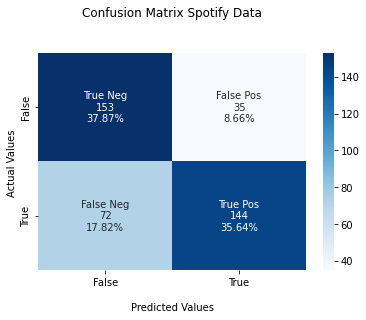

In [116]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_grid.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_grid.flatten()/np.sum(cf_matrix_grid)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_grid, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix Spotify Data\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [117]:
exactitud_grid = round(accuracy_score(y_test, y_pred_grid), 4)
precision_grid = round(precision_score(y_test, y_pred_grid), 4)
sensibilidad_grid = round(recall_score(y_test, y_pred_grid), 4)
puntaje_grid = round(f1_score(y_test, y_pred_grid), 4)

print(f'exactitud: {exactitud_grid}\nprecision: {precision_grid}\nsensibilidad: {sensibilidad_grid}\nf1 score: {puntaje_grid}')

exactitud: 0.7351
precision: 0.8045
sensibilidad: 0.6667
f1 score: 0.7291


# 4. Decision tree Classifier

In [244]:
clf_tree = DecisionTreeClassifier(random_state=21)

In [245]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=21)

In [246]:
y_pred_tree = clf_tree.predict(X_test)

In [247]:
pred_values_tree = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_tree})
pred_values_tree.head(100)

Actual value  Predicted value
0              1                0
1              0                1
2              0                0
3              1                1
4              1                1
..           ...              ...
95             0                0
96             1                1
97             1                0
98             1                1
99             0                0

[100 rows x 2 columns]

In [248]:
cf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(cf_matrix_tree)

[[136  52]
 [ 67 149]]


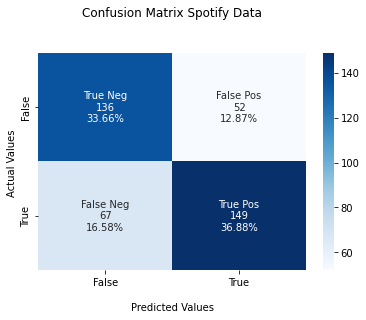

In [261]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_tree.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_tree.flatten()/np.sum(cf_matrix_tree)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_tree, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix Spotify Data\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [262]:
exactitud_tree = round(accuracy_score(y_test, y_pred_tree), 4)
precision_tree = round(precision_score(y_test, y_pred_tree), 4)
sensibilidad_tree = round(recall_score(y_test, y_pred_tree), 4)
puntaje_tree = round(f1_score(y_test, y_pred_tree), 4)

print(f'exactitud: {exactitud_tree}\nprecision: {precision_tree}\nsensibilidad: {sensibilidad_tree}\nf1 score: {puntaje_tree}')

exactitud: 0.7054
precision: 0.7413
sensibilidad: 0.6898
f1 score: 0.7146


**Find the hyperparameters**

In [255]:
params_grid_tree = {  
               'criterion':['gini', 'entropy'], #'linear', 'rbf' 'poly', 
               'splitter':['best', 'random'],
               'max_depth':[1, 2, 3],
               'min_samples_split':[2],
               'max_features':['sqrt', 'log2'],
               'min_impurity_decrease':[0.01, 0.02]}
grid_tree = GridSearchCV(clf_tree, params_grid_tree, refit = True, verbose = 3,n_jobs=1)
grid_tree.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.01, min_samples_split=2, splitter=best;, score=0.526 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.01, min_samples_split=2, splitter=best;, score=0.514 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.01, min_samples_split=2, splitter=best;, score=0.533 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.01, min_samples_split=2, splitter=best;, score=0.528 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.01, min_samples_split=2, splitter=best;, score=0.543 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.01, min_samples_split=2, splitter=random;, score=0.502 total time=  

[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_impurity_decrease=0.01, min_samples_split=2, splitter=random;, score=0.503 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_impurity_decrease=0.01, min_samples_split=2, splitter=random;, score=0.500 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_impurity_decrease=0.02, min_samples_split=2, splitter=best;, score=0.502 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_impurity_decrease=0.02, min_samples_split=2, splitter=best;, score=0.502 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_impurity_decrease=0.02, min_samples_split=2, splitter=best;, score=0.502 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_impurity_decrease=0.02, min_samples_split=2, splitter=best;, score=0.503 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features

[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_impurity_decrease=0.01, min_samples_split=2, splitter=best;, score=0.498 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, min_impurity_decrease=0.01, min_samples_split=2, splitter=best;, score=0.528 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_impurity_decrease=0.01, min_samples_split=2, splitter=best;, score=0.543 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_impurity_decrease=0.01, min_samples_split=2, splitter=random;, score=0.502 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_impurity_decrease=0.01, min_samples_split=2, splitter=random;, score=0.502 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_impurity_decrease=0.01, min_samples_split=2, splitter=random;, score=0.502 total time=   0.0s
[CV 4/5] END criterion=entropy, ma

GridSearchCV(estimator=DecisionTreeClassifier(random_state=21), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['sqrt', 'log2'],
                         'min_impurity_decrease': [0.01, 0.02],
                         'min_samples_split': [2],
                         'splitter': ['best', 'random']},
             verbose=3)

In [256]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 1,
 'max_features': 'sqrt',
 'min_impurity_decrease': 0.01,
 'min_samples_split': 2,
 'splitter': 'best'}

In [257]:
clf_grid_tree = DecisionTreeClassifier(criterion='entropy', max_depth=1, max_features='sqrt', 
                                       min_impurity_decrease=0.01, min_samples_split=2, splitter='best', random_state=21)

In [258]:
clf_grid_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, max_features='sqrt',
                       min_impurity_decrease=0.01, random_state=21)

In [259]:
y_pr = clf_grid_tree.predict(X_test)

In [260]:
pred_values_grid = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pr})
pred_values_grid.head(100)

Actual value  Predicted value
0              1                1
1              0                1
2              0                1
3              1                1
4              1                1
..           ...              ...
95             0                1
96             1                1
97             1                1
98             1                1
99             0                1

[100 rows x 2 columns]

In [263]:
cf_matrix_tg = confusion_matrix(y_test, y_pr)
print(cf_matrix_tg)

[[ 15 173]
 [  0 216]]


**TP** = True Positive, es el caso cuando el dato actual es 1 y el predicho es 1 ejm: actual = 1, dato predicho = 1

**TN** = son los casos en los que los datos actuales con 0 (Falso) y el predicho tambien es 0 (Falso)

**FP** = son los casos en los que los datos actuales indican 0 (Falso) y la prediccion indica que es 1 (verdadero), es decir la prediccion es erronea.

**FN** = son los casos en que los dato actual indica que es 1 (verdadero) y predicho es 0 (Falso), determinando asi que la prediccion ha sido incorrecta.

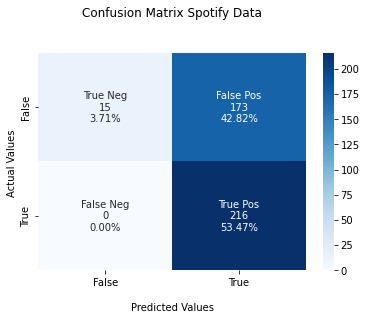

In [264]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_tg.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_tg.flatten()/np.sum(cf_matrix_tg)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_tg, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix Spotify Data\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [265]:
exactitud_tg = round(accuracy_score(y_test, y_pr), 4)
precision_tg = round(precision_score(y_test, y_pr), 4)
sensibilidad_tg = round(recall_score(y_test, y_pr), 4)
puntaje_tg = round(f1_score(y_test, y_pr), 4)

print(f'exactitud: {exactitud_tg}\nprecision: {precision_tg}\nsensibilidad: {sensibilidad_tg}\nf1 score: {puntaje_tg}')

exactitud: 0.5718
precision: 0.5553
sensibilidad: 1.0
f1 score: 0.714
